# <center>Preventive Analysis of Car Accident Severity </center>

# Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Problem Statement <a name="introduction"></a>

In this project,we will try to develope a system for **purpose of preventing Accidents** and Other Traffic related disasters.Specifically,this report will target people who commute or travel more often in order to make commute safer for everyone.

Normally when we commute or travel for work or other activites,we are usually not aware of situation that one could encounter.One could face a disaster on his way or could face a severe accident.

  This would allow user to **plan journey in order to make travel more feasible and safe**.This would be dependent upon several different variables.e.g, weather,humidity and so on.
  
  We will use our dataset to study the relationship between various variable in accordance with accident severity.We will use various statistical tests such as **pearsonr,z test,t test** etc in order to study correlation between accident severity and Accident severity.



# Data <a name="data"></a>

 Based upon our problem statement the factors having an impact on our decision are,
 - Junction Type i.e Intersection,Highway etc
 - Weather will play a huge role
 - ROAD CONDITION indicates wether road is slippery or not.Bad Road Condition leads to greater risk of accident
 - LIGHT CONDITION implies the visibility.If visibility is hampered we wont be able to respond well to events. 
 
Above mentioned are some obvious factors invovled in accidents.In order to determine the relationship between other variables with respect to data we will perform multiple tests to calculate correlation. 

Following data sources will be needed to generate the required information.
- **Seatle SPD** Dataset that is open sourced.This Dataset is from 2004 till peresent.
- [Link to the Dataset](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv)

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

In [36]:
data=pd.read_csv('DataSet/Data-Collisions.csv')
data.columns

/home/rufus/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [23]:
data.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

In [128]:
#data['INCDATE']=pd.to_datetime(data['INCDATE'],format='Y/m/d')
data['INCDATE']=data['INCDATE'].str.

2013/03/27 00:00:00+00
2006/12/20 00:00:00+00
2004/11/18 00:00:00+00
2013/03/29 00:00:00+00
2004/01/28 00:00:00+00
2019/04/20 00:00:00+00
2008/12/09 00:00:00+00
2020/04/15 00:00:00+00
2006/06/15 00:00:00+00
2006/03/20 00:00:00+00
2006/05/25 00:00:00+00
2005/08/11 00:00:00+00
2006/05/17 00:00:00+00
2005/12/22 00:00:00+00
2013/03/31 00:00:00+00
2020/04/20 00:00:00+00
2005/07/01 00:00:00+00
2004/01/16 00:00:00+00
2020/04/17 00:00:00+00
2009/06/01 00:00:00+00
2013/03/27 00:00:00+00
2013/03/28 00:00:00+00
2008/07/18 00:00:00+00
2004/09/12 00:00:00+00
2013/03/31 00:00:00+00
2019/04/25 00:00:00+00
2010/11/13 00:00:00+00
2007/07/23 00:00:00+00
2013/03/25 00:00:00+00
2006/11/16 00:00:00+00
2005/11/05 00:00:00+00
2004/07/21 00:00:00+00
2004/06/17 00:00:00+00
2007/02/22 00:00:00+00
2004/03/25 00:00:00+00
2019/04/27 00:00:00+00
2020/03/13 00:00:00+00
2006/08/11 00:00:00+00
2013/03/25 00:00:00+00
2006/08/19 00:00:00+00
2006/08/05 00:00:00+00
2005/11/23 00:00:00+00
2013/04/02 00:00:00+00
2006/09/13 

2013/03/25 00:00:00+00
2005/12/18 00:00:00+00
2013/03/26 00:00:00+00
2004/06/10 00:00:00+00
2009/03/12 00:00:00+00
2020/04/25 00:00:00+00
2006/02/03 00:00:00+00
2013/03/26 00:00:00+00
2006/09/18 00:00:00+00
2020/04/20 00:00:00+00
2006/07/14 00:00:00+00
2005/01/26 00:00:00+00
2013/04/03 00:00:00+00
2004/03/21 00:00:00+00
2012/12/28 00:00:00+00
2020/04/16 00:00:00+00
2005/12/14 00:00:00+00
2013/03/30 00:00:00+00
2004/02/24 00:00:00+00
2020/04/16 00:00:00+00
2009/04/24 00:00:00+00
2004/12/08 00:00:00+00
2006/06/11 00:00:00+00
2013/03/28 00:00:00+00
2005/06/14 00:00:00+00
2004/06/13 00:00:00+00
2013/03/26 00:00:00+00
2004/02/12 00:00:00+00
2019/07/05 00:00:00+00
2009/09/22 00:00:00+00
2019/05/08 00:00:00+00
2013/03/31 00:00:00+00
2004/06/16 00:00:00+00
2020/04/15 00:00:00+00
2007/05/24 00:00:00+00
2013/04/05 00:00:00+00
2006/08/28 00:00:00+00
2013/04/01 00:00:00+00
2016/05/16 00:00:00+00
2005/11/23 00:00:00+00
2013/03/29 00:00:00+00
2013/04/01 00:00:00+00
2019/07/05 00:00:00+00
2019/07/05 

2015/05/05 00:00:00+00
2010/04/19 00:00:00+00
2016/10/16 00:00:00+00
2009/01/16 00:00:00+00
2014/02/16 00:00:00+00
2010/11/19 00:00:00+00
2009/03/05 00:00:00+00
2013/08/20 00:00:00+00
2011/09/24 00:00:00+00
2016/10/28 00:00:00+00
2010/01/19 00:00:00+00
2018/05/11 00:00:00+00
2014/09/04 00:00:00+00
2016/06/09 00:00:00+00
2014/10/23 00:00:00+00
2014/02/01 00:00:00+00
2015/04/04 00:00:00+00
2008/10/21 00:00:00+00
2014/04/26 00:00:00+00
2009/09/21 00:00:00+00
2017/08/27 00:00:00+00
2010/10/26 00:00:00+00
2014/11/26 00:00:00+00
2007/02/22 00:00:00+00
2007/10/02 00:00:00+00
2017/07/18 00:00:00+00
2012/01/03 00:00:00+00
2013/05/15 00:00:00+00
2017/12/28 00:00:00+00
2014/11/05 00:00:00+00
2016/04/12 00:00:00+00
2014/03/31 00:00:00+00
2007/02/09 00:00:00+00
2017/07/24 00:00:00+00
2012/04/19 00:00:00+00
2011/10/15 00:00:00+00
2018/02/14 00:00:00+00
2013/08/07 00:00:00+00
2010/09/01 00:00:00+00
2013/05/08 00:00:00+00
2007/09/17 00:00:00+00
2016/10/18 00:00:00+00
2007/04/27 00:00:00+00
2018/05/07 

2004/02/13 00:00:00+00
2013/04/06 00:00:00+00
2004/02/01 00:00:00+00
2013/04/12 00:00:00+00
2013/04/09 00:00:00+00
2004/03/11 00:00:00+00
2013/04/05 00:00:00+00
2013/04/12 00:00:00+00
2004/11/29 00:00:00+00
2004/03/27 00:00:00+00
2013/04/04 00:00:00+00
2018/08/13 00:00:00+00
2013/03/27 00:00:00+00
2004/11/18 00:00:00+00
2013/04/04 00:00:00+00
2004/11/29 00:00:00+00
2004/10/08 00:00:00+00
2004/01/14 00:00:00+00
2013/04/11 00:00:00+00
2004/09/26 00:00:00+00
2017/12/14 00:00:00+00
2004/11/28 00:00:00+00
2013/04/13 00:00:00+00
2013/04/06 00:00:00+00
2004/04/13 00:00:00+00
2013/04/06 00:00:00+00
2013/04/08 00:00:00+00
2018/12/10 00:00:00+00
2016/11/26 00:00:00+00
2004/10/13 00:00:00+00
2013/04/06 00:00:00+00
2004/09/25 00:00:00+00
2004/08/23 00:00:00+00
2004/06/17 00:00:00+00
2013/04/08 00:00:00+00
2004/10/22 00:00:00+00
2017/02/24 00:00:00+00
2013/04/13 00:00:00+00
2004/10/15 00:00:00+00
2004/03/17 00:00:00+00
2018/09/04 00:00:00+00
2013/04/10 00:00:00+00
2019/11/21 00:00:00+00
2004/10/17 

2004/03/10 00:00:00+00
2004/03/22 00:00:00+00
2004/10/18 00:00:00+00
2016/02/25 00:00:00+00
2004/11/05 00:00:00+00
2017/03/06 00:00:00+00
2004/06/23 00:00:00+00
2013/04/11 00:00:00+00
2004/02/04 00:00:00+00
2004/11/17 00:00:00+00
2013/04/07 00:00:00+00
2018/12/22 00:00:00+00
2013/04/14 00:00:00+00
2004/08/28 00:00:00+00
2017/11/04 00:00:00+00
2004/01/19 00:00:00+00
2015/06/15 00:00:00+00
2004/03/26 00:00:00+00
2004/01/23 00:00:00+00
2004/06/11 00:00:00+00
2013/04/06 00:00:00+00
2004/08/24 00:00:00+00
2013/04/11 00:00:00+00
2004/04/18 00:00:00+00
2004/06/17 00:00:00+00
2013/04/07 00:00:00+00
2004/09/12 00:00:00+00
2013/04/09 00:00:00+00
2004/02/10 00:00:00+00
2013/04/09 00:00:00+00
2004/01/13 00:00:00+00
2017/01/08 00:00:00+00
2004/03/25 00:00:00+00
2018/11/04 00:00:00+00
2013/04/15 00:00:00+00
2004/09/18 00:00:00+00
2004/12/11 00:00:00+00
2004/04/21 00:00:00+00
2004/09/30 00:00:00+00
2013/04/11 00:00:00+00
2004/06/09 00:00:00+00
2019/11/27 00:00:00+00
2004/10/14 00:00:00+00
2004/06/03 

2004/05/28 00:00:00+00
2004/02/26 00:00:00+00
2004/11/09 00:00:00+00
2004/01/18 00:00:00+00
2004/05/12 00:00:00+00
2004/10/13 00:00:00+00
2004/05/04 00:00:00+00
2004/09/04 00:00:00+00
2004/02/27 00:00:00+00
2004/10/19 00:00:00+00
2004/06/22 00:00:00+00
2004/05/27 00:00:00+00
2004/11/12 00:00:00+00
2004/06/05 00:00:00+00
2004/01/27 00:00:00+00
2004/10/19 00:00:00+00
2004/06/30 00:00:00+00
2004/03/31 00:00:00+00
2004/07/15 00:00:00+00
2004/05/20 00:00:00+00
2004/11/24 00:00:00+00
2004/06/30 00:00:00+00
2004/03/18 00:00:00+00
2004/06/11 00:00:00+00
2004/01/31 00:00:00+00
2004/08/03 00:00:00+00
2004/01/10 00:00:00+00
2004/03/16 00:00:00+00
2004/10/20 00:00:00+00
2004/04/05 00:00:00+00
2004/02/13 00:00:00+00
2004/06/20 00:00:00+00
2004/01/12 00:00:00+00
2004/01/09 00:00:00+00
2004/07/18 00:00:00+00
2004/05/22 00:00:00+00
2004/04/21 00:00:00+00
2004/10/10 00:00:00+00
2004/07/10 00:00:00+00
2004/09/27 00:00:00+00
2004/09/21 00:00:00+00
2004/04/14 00:00:00+00
2004/09/26 00:00:00+00
2004/04/28 

2004/10/27 00:00:00+00
2004/10/14 00:00:00+00
2004/12/03 00:00:00+00
2004/06/16 00:00:00+00
2004/09/05 00:00:00+00
2004/04/12 00:00:00+00
2004/02/19 00:00:00+00
2004/02/08 00:00:00+00
2004/08/08 00:00:00+00
2004/12/05 00:00:00+00
2004/09/12 00:00:00+00
2004/12/17 00:00:00+00
2004/08/16 00:00:00+00
2004/04/09 00:00:00+00
2004/10/10 00:00:00+00
2004/09/01 00:00:00+00
2004/03/23 00:00:00+00
2004/02/06 00:00:00+00
2004/06/20 00:00:00+00
2004/07/14 00:00:00+00
2004/07/16 00:00:00+00
2004/02/15 00:00:00+00
2004/06/29 00:00:00+00
2004/01/14 00:00:00+00
2004/12/03 00:00:00+00
2004/02/06 00:00:00+00
2004/10/31 00:00:00+00
2004/04/20 00:00:00+00
2004/04/03 00:00:00+00
2004/11/05 00:00:00+00
2004/03/01 00:00:00+00
2004/01/14 00:00:00+00
2004/04/29 00:00:00+00
2004/08/14 00:00:00+00
2004/09/16 00:00:00+00
2004/09/07 00:00:00+00
2004/04/01 00:00:00+00
2004/01/14 00:00:00+00
2004/06/01 00:00:00+00
2004/05/26 00:00:00+00
2004/08/03 00:00:00+00
2004/04/01 00:00:00+00
2004/12/16 00:00:00+00
2004/02/10 

2004/09/08 00:00:00+00
2004/07/28 00:00:00+00
2004/02/26 00:00:00+00
2004/05/24 00:00:00+00
2004/08/17 00:00:00+00
2004/09/25 00:00:00+00
2004/05/06 00:00:00+00
2004/02/17 00:00:00+00
2004/06/30 00:00:00+00
2004/05/22 00:00:00+00
2004/10/09 00:00:00+00
2004/11/21 00:00:00+00
2004/01/11 00:00:00+00
2004/04/17 00:00:00+00
2004/04/29 00:00:00+00
2004/02/29 00:00:00+00
2004/11/26 00:00:00+00
2004/05/25 00:00:00+00
2004/08/19 00:00:00+00
2004/10/27 00:00:00+00
2004/07/10 00:00:00+00
2004/10/29 00:00:00+00
2004/01/01 00:00:00+00
2004/06/18 00:00:00+00
2004/05/18 00:00:00+00
2004/09/13 00:00:00+00
2004/05/05 00:00:00+00
2004/02/16 00:00:00+00
2004/09/03 00:00:00+00
2004/01/22 00:00:00+00
2004/03/18 00:00:00+00
2004/06/01 00:00:00+00
2004/02/19 00:00:00+00
2004/12/07 00:00:00+00
2004/10/05 00:00:00+00
2004/07/29 00:00:00+00
2004/03/09 00:00:00+00
2004/04/13 00:00:00+00
2004/05/07 00:00:00+00
2004/06/30 00:00:00+00
2004/07/24 00:00:00+00
2004/08/04 00:00:00+00
2004/12/21 00:00:00+00
2004/07/10 

2004/03/27 00:00:00+00
2004/01/19 00:00:00+00
2004/08/25 00:00:00+00
2004/04/16 00:00:00+00
2004/02/20 00:00:00+00
2004/08/18 00:00:00+00
2004/02/11 00:00:00+00
2004/02/06 00:00:00+00
2004/03/02 00:00:00+00
2004/11/19 00:00:00+00
2004/03/25 00:00:00+00
2004/05/13 00:00:00+00
2004/02/25 00:00:00+00
2004/01/24 00:00:00+00
2004/07/06 00:00:00+00
2004/03/13 00:00:00+00
2004/06/18 00:00:00+00
2004/03/18 00:00:00+00
2004/08/30 00:00:00+00
2004/03/10 00:00:00+00
2004/04/21 00:00:00+00
2004/04/15 00:00:00+00
2004/08/31 00:00:00+00
2004/02/21 00:00:00+00
2004/03/09 00:00:00+00
2004/11/17 00:00:00+00
2004/11/24 00:00:00+00
2004/10/15 00:00:00+00
2004/12/11 00:00:00+00
2004/06/12 00:00:00+00
2004/04/16 00:00:00+00
2004/01/15 00:00:00+00
2004/08/21 00:00:00+00
2004/04/16 00:00:00+00
2004/08/06 00:00:00+00
2004/08/09 00:00:00+00
2004/06/17 00:00:00+00
2004/10/14 00:00:00+00
2004/04/28 00:00:00+00
2004/03/31 00:00:00+00
2004/09/29 00:00:00+00
2004/07/18 00:00:00+00
2004/11/03 00:00:00+00
2004/09/13 

2004/03/25 00:00:00+00
2004/03/31 00:00:00+00
2004/06/25 00:00:00+00
2004/08/13 00:00:00+00
2004/09/01 00:00:00+00
2004/01/23 00:00:00+00
2004/02/04 00:00:00+00
2004/07/31 00:00:00+00
2004/06/28 00:00:00+00
2004/07/21 00:00:00+00
2004/04/30 00:00:00+00
2004/12/30 00:00:00+00
2004/11/22 00:00:00+00
2004/02/18 00:00:00+00
2004/12/22 00:00:00+00
2004/01/23 00:00:00+00
2004/09/21 00:00:00+00
2004/07/14 00:00:00+00
2004/01/31 00:00:00+00
2004/12/11 00:00:00+00
2004/06/26 00:00:00+00
2004/12/02 00:00:00+00
2004/09/21 00:00:00+00
2004/05/05 00:00:00+00
2004/11/22 00:00:00+00
2004/11/13 00:00:00+00
2004/10/16 00:00:00+00
2004/03/04 00:00:00+00
2004/08/02 00:00:00+00
2004/07/30 00:00:00+00
2004/11/12 00:00:00+00
2004/07/24 00:00:00+00
2004/09/15 00:00:00+00
2004/03/14 00:00:00+00
2004/08/09 00:00:00+00
2004/03/11 00:00:00+00
2004/04/30 00:00:00+00
2004/05/13 00:00:00+00
2004/07/15 00:00:00+00
2004/07/13 00:00:00+00
2004/01/29 00:00:00+00
2004/06/11 00:00:00+00
2004/11/25 00:00:00+00
2004/10/06 

2004/08/05 00:00:00+00
2004/05/05 00:00:00+00
2004/10/03 00:00:00+00
2004/10/28 00:00:00+00
2004/07/21 00:00:00+00
2004/04/18 00:00:00+00
2004/12/30 00:00:00+00
2004/11/18 00:00:00+00
2004/09/23 00:00:00+00
2004/04/19 00:00:00+00
2004/05/28 00:00:00+00
2004/08/17 00:00:00+00
2004/09/07 00:00:00+00
2004/02/06 00:00:00+00
2004/09/30 00:00:00+00
2004/01/28 00:00:00+00
2004/10/19 00:00:00+00
2004/07/20 00:00:00+00
2004/03/30 00:00:00+00
2004/08/13 00:00:00+00
2004/09/25 00:00:00+00
2004/09/13 00:00:00+00
2004/03/09 00:00:00+00
2004/03/14 00:00:00+00
2004/01/09 00:00:00+00
2004/02/04 00:00:00+00
2004/03/10 00:00:00+00
2004/04/27 00:00:00+00
2004/01/22 00:00:00+00
2004/05/05 00:00:00+00
2004/07/11 00:00:00+00
2004/11/02 00:00:00+00
2004/01/17 00:00:00+00
2004/12/17 00:00:00+00
2004/01/14 00:00:00+00
2004/06/17 00:00:00+00
2004/02/20 00:00:00+00
2004/09/25 00:00:00+00
2004/10/16 00:00:00+00
2004/07/17 00:00:00+00
2004/11/20 00:00:00+00
2004/06/04 00:00:00+00
2004/08/11 00:00:00+00
2004/08/26 

2004/01/29 00:00:00+00
2004/03/18 00:00:00+00
2004/08/03 00:00:00+00
2004/01/28 00:00:00+00
2004/06/27 00:00:00+00
2004/02/29 00:00:00+00
2004/09/16 00:00:00+00
2004/08/20 00:00:00+00
2004/06/06 00:00:00+00
2004/10/12 00:00:00+00
2004/04/09 00:00:00+00
2004/05/07 00:00:00+00
2004/11/11 00:00:00+00
2004/09/11 00:00:00+00
2004/09/19 00:00:00+00
2004/05/08 00:00:00+00
2004/05/04 00:00:00+00
2004/10/18 00:00:00+00
2004/01/07 00:00:00+00
2004/08/06 00:00:00+00
2004/04/25 00:00:00+00
2004/04/28 00:00:00+00
2004/07/22 00:00:00+00
2004/03/08 00:00:00+00
2004/12/29 00:00:00+00
2004/05/26 00:00:00+00
2004/02/08 00:00:00+00
2004/08/24 00:00:00+00
2004/09/10 00:00:00+00
2004/04/21 00:00:00+00
2004/04/01 00:00:00+00
2004/04/17 00:00:00+00
2004/03/09 00:00:00+00
2004/06/12 00:00:00+00
2004/06/01 00:00:00+00
2004/07/11 00:00:00+00
2004/06/15 00:00:00+00
2004/02/16 00:00:00+00
2004/04/02 00:00:00+00
2004/08/13 00:00:00+00
2004/02/04 00:00:00+00
2004/07/30 00:00:00+00
2004/03/27 00:00:00+00
2004/05/04 

2004/12/07 00:00:00+00
2004/09/07 00:00:00+00
2004/12/04 00:00:00+00
2004/06/12 00:00:00+00
2004/10/19 00:00:00+00
2004/10/29 00:00:00+00
2004/10/31 00:00:00+00
2004/01/21 00:00:00+00
2004/09/27 00:00:00+00
2004/04/03 00:00:00+00
2004/05/07 00:00:00+00
2004/04/03 00:00:00+00
2004/11/20 00:00:00+00
2004/01/29 00:00:00+00
2004/12/18 00:00:00+00
2004/11/20 00:00:00+00
2004/04/18 00:00:00+00
2004/07/27 00:00:00+00
2004/05/31 00:00:00+00
2004/11/20 00:00:00+00
2004/02/24 00:00:00+00
2004/02/20 00:00:00+00
2004/05/11 00:00:00+00
2004/08/21 00:00:00+00
2004/02/27 00:00:00+00
2004/10/09 00:00:00+00
2004/03/04 00:00:00+00
2004/09/05 00:00:00+00
2004/11/19 00:00:00+00
2004/03/20 00:00:00+00
2004/02/27 00:00:00+00
2004/07/03 00:00:00+00
2004/11/11 00:00:00+00
2004/05/02 00:00:00+00
2004/05/25 00:00:00+00
2004/09/14 00:00:00+00
2004/10/17 00:00:00+00
2004/03/30 00:00:00+00
2004/08/26 00:00:00+00
2004/07/08 00:00:00+00
2004/03/09 00:00:00+00
2004/10/23 00:00:00+00
2004/08/03 00:00:00+00
2004/09/11 

2004/03/09 00:00:00+00
2004/08/07 00:00:00+00
2004/07/09 00:00:00+00
2004/03/23 00:00:00+00
2004/10/16 00:00:00+00
2004/07/04 00:00:00+00
2004/05/07 00:00:00+00
2004/08/23 00:00:00+00
2004/09/24 00:00:00+00
2004/08/25 00:00:00+00
2004/02/28 00:00:00+00
2004/01/30 00:00:00+00
2004/04/30 00:00:00+00
2004/06/29 00:00:00+00
2004/03/08 00:00:00+00
2004/04/25 00:00:00+00
2004/05/21 00:00:00+00
2004/07/31 00:00:00+00
2004/08/07 00:00:00+00
2004/01/31 00:00:00+00
2004/07/21 00:00:00+00
2004/09/03 00:00:00+00
2004/02/05 00:00:00+00
2004/09/24 00:00:00+00
2004/12/04 00:00:00+00
2004/05/27 00:00:00+00
2004/03/12 00:00:00+00
2004/10/15 00:00:00+00
2004/03/06 00:00:00+00
2004/11/01 00:00:00+00
2004/03/27 00:00:00+00
2004/07/16 00:00:00+00
2004/08/16 00:00:00+00
2004/06/15 00:00:00+00
2004/06/17 00:00:00+00
2004/02/19 00:00:00+00
2004/11/14 00:00:00+00
2004/02/14 00:00:00+00
2004/08/25 00:00:00+00
2004/03/26 00:00:00+00
2004/07/11 00:00:00+00
2004/10/13 00:00:00+00
2004/04/30 00:00:00+00
2004/08/16 

2004/12/16 00:00:00+00
2004/08/20 00:00:00+00
2004/05/07 00:00:00+00
2004/07/22 00:00:00+00
2004/03/10 00:00:00+00
2004/12/07 00:00:00+00
2004/12/17 00:00:00+00
2004/10/03 00:00:00+00
2004/04/04 00:00:00+00
2004/11/09 00:00:00+00
2004/04/08 00:00:00+00
2004/04/10 00:00:00+00
2004/06/15 00:00:00+00
2004/10/14 00:00:00+00
2004/05/23 00:00:00+00
2004/03/31 00:00:00+00
2004/02/01 00:00:00+00
2004/01/20 00:00:00+00
2004/05/17 00:00:00+00
2004/03/27 00:00:00+00
2004/02/27 00:00:00+00
2004/04/26 00:00:00+00
2004/08/19 00:00:00+00
2004/02/14 00:00:00+00
2004/09/22 00:00:00+00
2004/08/25 00:00:00+00
2004/05/14 00:00:00+00
2004/08/14 00:00:00+00
2004/05/01 00:00:00+00
2004/06/04 00:00:00+00
2004/07/10 00:00:00+00
2004/04/29 00:00:00+00
2004/05/10 00:00:00+00
2004/04/14 00:00:00+00
2004/02/27 00:00:00+00
2004/08/23 00:00:00+00
2004/10/01 00:00:00+00
2004/07/08 00:00:00+00
2004/05/25 00:00:00+00
2004/01/05 00:00:00+00
2004/02/14 00:00:00+00
2004/03/27 00:00:00+00
2004/05/26 00:00:00+00
2004/11/02 

2004/04/02 00:00:00+00
2004/06/04 00:00:00+00
2004/12/06 00:00:00+00
2004/03/11 00:00:00+00
2004/02/09 00:00:00+00
2004/08/29 00:00:00+00
2004/04/22 00:00:00+00
2005/12/25 00:00:00+00
2004/08/11 00:00:00+00
2004/06/11 00:00:00+00
2004/04/24 00:00:00+00
2004/05/26 00:00:00+00
2004/01/23 00:00:00+00
2004/07/11 00:00:00+00
2004/04/01 00:00:00+00
2004/05/12 00:00:00+00
2005/06/26 00:00:00+00
2004/04/13 00:00:00+00
2004/01/31 00:00:00+00
2005/01/09 00:00:00+00
2004/10/14 00:00:00+00
2004/02/29 00:00:00+00
2005/12/18 00:00:00+00
2005/04/01 00:00:00+00
2005/12/28 00:00:00+00
2004/03/17 00:00:00+00
2004/05/22 00:00:00+00
2004/09/22 00:00:00+00
2004/02/21 00:00:00+00
2004/09/13 00:00:00+00
2005/05/19 00:00:00+00
2005/02/06 00:00:00+00
2005/07/23 00:00:00+00
2004/05/14 00:00:00+00
2004/03/30 00:00:00+00
2004/03/05 00:00:00+00
2004/04/27 00:00:00+00
2004/08/20 00:00:00+00
2005/08/17 00:00:00+00
2004/04/19 00:00:00+00
2004/08/08 00:00:00+00
2004/01/18 00:00:00+00
2004/06/23 00:00:00+00
2004/10/08 

2005/11/29 00:00:00+00
2005/09/19 00:00:00+00
2005/03/29 00:00:00+00
2005/12/30 00:00:00+00
2005/02/21 00:00:00+00
2005/03/23 00:00:00+00
2005/02/10 00:00:00+00
2005/09/09 00:00:00+00
2005/05/14 00:00:00+00
2005/09/04 00:00:00+00
2005/02/23 00:00:00+00
2005/05/26 00:00:00+00
2005/08/12 00:00:00+00
2005/05/27 00:00:00+00
2005/01/29 00:00:00+00
2005/08/18 00:00:00+00
2005/02/23 00:00:00+00
2004/06/14 00:00:00+00
2005/09/21 00:00:00+00
2005/02/16 00:00:00+00
2005/11/18 00:00:00+00
2005/07/31 00:00:00+00
2005/03/03 00:00:00+00
2005/03/24 00:00:00+00
2005/10/06 00:00:00+00
2005/02/13 00:00:00+00
2005/01/22 00:00:00+00
2004/05/13 00:00:00+00
2005/04/09 00:00:00+00
2005/02/12 00:00:00+00
2005/08/09 00:00:00+00
2005/10/20 00:00:00+00
2005/07/15 00:00:00+00
2005/12/14 00:00:00+00
2005/11/23 00:00:00+00
2005/12/31 00:00:00+00
2005/03/20 00:00:00+00
2005/06/20 00:00:00+00
2005/01/18 00:00:00+00
2005/06/06 00:00:00+00
2005/01/25 00:00:00+00
2005/09/17 00:00:00+00
2005/01/09 00:00:00+00
2005/09/04 

2005/11/25 00:00:00+00
2005/04/29 00:00:00+00
2005/01/17 00:00:00+00
2005/12/07 00:00:00+00
2005/10/27 00:00:00+00
2005/03/24 00:00:00+00
2005/08/27 00:00:00+00
2005/03/20 00:00:00+00
2005/10/09 00:00:00+00
2005/05/24 00:00:00+00
2005/08/22 00:00:00+00
2005/08/20 00:00:00+00
2005/08/16 00:00:00+00
2005/10/05 00:00:00+00
2005/05/22 00:00:00+00
2005/06/15 00:00:00+00
2005/05/26 00:00:00+00
2005/07/21 00:00:00+00
2005/08/13 00:00:00+00
2005/08/09 00:00:00+00
2005/05/27 00:00:00+00
2005/02/02 00:00:00+00
2005/11/12 00:00:00+00
2005/10/12 00:00:00+00
2005/06/01 00:00:00+00
2005/12/19 00:00:00+00
2005/03/29 00:00:00+00
2005/01/06 00:00:00+00
2005/12/13 00:00:00+00
2005/05/25 00:00:00+00
2005/12/01 00:00:00+00
2005/06/14 00:00:00+00
2005/01/15 00:00:00+00
2005/01/25 00:00:00+00
2005/12/30 00:00:00+00
2005/08/14 00:00:00+00
2005/09/07 00:00:00+00
2005/09/24 00:00:00+00
2005/08/27 00:00:00+00
2005/02/16 00:00:00+00
2005/11/18 00:00:00+00
2005/12/09 00:00:00+00
2005/04/20 00:00:00+00
2005/04/25 

2005/12/30 00:00:00+00
2005/04/24 00:00:00+00
2005/03/17 00:00:00+00
2005/10/08 00:00:00+00
2005/07/02 00:00:00+00
2005/06/27 00:00:00+00
2005/03/28 00:00:00+00
2005/07/08 00:00:00+00
2005/05/10 00:00:00+00
2005/04/13 00:00:00+00
2005/05/03 00:00:00+00
2005/10/23 00:00:00+00
2005/05/27 00:00:00+00
2005/01/22 00:00:00+00
2005/12/01 00:00:00+00
2005/05/25 00:00:00+00
2005/06/18 00:00:00+00
2005/04/08 00:00:00+00
2005/02/08 00:00:00+00
2005/08/30 00:00:00+00
2005/09/17 00:00:00+00
2005/10/17 00:00:00+00
2005/05/11 00:00:00+00
2005/03/15 00:00:00+00
2005/02/21 00:00:00+00
2005/08/27 00:00:00+00
2005/01/03 00:00:00+00
2005/03/03 00:00:00+00
2005/01/28 00:00:00+00
2005/08/05 00:00:00+00
2005/04/05 00:00:00+00
2005/10/11 00:00:00+00
2005/04/23 00:00:00+00
2005/08/12 00:00:00+00
2005/08/24 00:00:00+00
2005/06/14 00:00:00+00
2005/08/25 00:00:00+00
2005/02/14 00:00:00+00
2005/07/20 00:00:00+00
2005/12/22 00:00:00+00
2005/04/20 00:00:00+00
2005/11/28 00:00:00+00
2005/02/22 00:00:00+00
2005/09/27 

2005/12/19 00:00:00+00
2005/06/19 00:00:00+00
2005/05/19 00:00:00+00
2005/05/07 00:00:00+00
2005/01/30 00:00:00+00
2005/05/21 00:00:00+00
2005/05/20 00:00:00+00
2005/11/11 00:00:00+00
2005/06/28 00:00:00+00
2005/05/08 00:00:00+00
2005/06/24 00:00:00+00
2005/10/21 00:00:00+00
2005/05/10 00:00:00+00
2005/06/08 00:00:00+00
2005/01/18 00:00:00+00
2005/06/08 00:00:00+00
2005/05/21 00:00:00+00
2005/06/27 00:00:00+00
2005/09/11 00:00:00+00
2005/06/01 00:00:00+00
2005/01/19 00:00:00+00
2005/12/30 00:00:00+00
2005/11/07 00:00:00+00
2005/07/07 00:00:00+00
2005/10/23 00:00:00+00
2005/01/26 00:00:00+00
2005/02/24 00:00:00+00
2005/02/06 00:00:00+00
2005/04/23 00:00:00+00
2005/05/10 00:00:00+00
2005/11/27 00:00:00+00
2005/11/04 00:00:00+00
2005/12/01 00:00:00+00
2005/01/03 00:00:00+00
2005/08/17 00:00:00+00
2005/08/05 00:00:00+00
2005/05/13 00:00:00+00
2005/07/02 00:00:00+00
2005/11/13 00:00:00+00
2005/01/21 00:00:00+00
2005/06/29 00:00:00+00
2005/01/09 00:00:00+00
2005/01/31 00:00:00+00
2005/06/04 

2005/10/02 00:00:00+00
2005/03/13 00:00:00+00
2005/08/11 00:00:00+00
2005/11/09 00:00:00+00
2005/08/19 00:00:00+00
2005/10/16 00:00:00+00
2005/09/03 00:00:00+00
2005/11/17 00:00:00+00
2005/02/14 00:00:00+00
2005/07/01 00:00:00+00
2005/07/01 00:00:00+00
2005/02/15 00:00:00+00
2005/03/24 00:00:00+00
2005/03/30 00:00:00+00
2005/05/03 00:00:00+00
2005/03/25 00:00:00+00
2005/04/02 00:00:00+00
2005/01/22 00:00:00+00
2005/07/13 00:00:00+00
2005/06/18 00:00:00+00
2005/07/20 00:00:00+00
2005/05/09 00:00:00+00
2005/04/16 00:00:00+00
2005/04/23 00:00:00+00
2005/02/23 00:00:00+00
2005/08/14 00:00:00+00
2005/05/18 00:00:00+00
2005/03/27 00:00:00+00
2005/11/17 00:00:00+00
2005/03/09 00:00:00+00
2005/08/21 00:00:00+00
2005/06/11 00:00:00+00
2005/03/02 00:00:00+00
2005/10/16 00:00:00+00
2005/02/09 00:00:00+00
2005/09/10 00:00:00+00
2005/06/15 00:00:00+00
2005/02/25 00:00:00+00
2005/09/27 00:00:00+00
2005/07/15 00:00:00+00
2005/04/19 00:00:00+00
2005/03/20 00:00:00+00
2005/01/06 00:00:00+00
2005/09/11 

2005/09/16 00:00:00+00
2005/09/07 00:00:00+00
2005/06/01 00:00:00+00
2005/10/05 00:00:00+00
2005/11/28 00:00:00+00
2005/10/25 00:00:00+00
2005/04/30 00:00:00+00
2005/01/03 00:00:00+00
2005/01/03 00:00:00+00
2005/11/23 00:00:00+00
2005/03/19 00:00:00+00
2005/11/10 00:00:00+00
2005/12/03 00:00:00+00
2005/11/20 00:00:00+00
2005/02/10 00:00:00+00
2005/05/28 00:00:00+00
2005/03/18 00:00:00+00
2005/01/22 00:00:00+00
2005/05/24 00:00:00+00
2005/04/23 00:00:00+00
2005/10/28 00:00:00+00
2005/11/17 00:00:00+00
2005/01/08 00:00:00+00
2005/04/25 00:00:00+00
2005/09/08 00:00:00+00
2005/04/25 00:00:00+00
2005/06/13 00:00:00+00
2005/11/10 00:00:00+00
2005/07/08 00:00:00+00
2005/08/24 00:00:00+00
2005/05/20 00:00:00+00
2005/05/31 00:00:00+00
2005/05/28 00:00:00+00
2005/04/29 00:00:00+00
2005/06/13 00:00:00+00
2005/06/27 00:00:00+00
2005/12/19 00:00:00+00
2005/03/27 00:00:00+00
2005/06/12 00:00:00+00
2005/03/28 00:00:00+00
2005/03/28 00:00:00+00
2005/07/13 00:00:00+00
2005/10/13 00:00:00+00
2005/10/20 

2005/09/05 00:00:00+00
2005/12/05 00:00:00+00
2005/10/11 00:00:00+00
2005/09/24 00:00:00+00
2005/09/06 00:00:00+00
2005/08/23 00:00:00+00
2005/10/26 00:00:00+00
2005/04/01 00:00:00+00
2005/01/30 00:00:00+00
2005/01/29 00:00:00+00
2005/04/15 00:00:00+00
2005/04/27 00:00:00+00
2005/07/22 00:00:00+00
2005/03/01 00:00:00+00
2005/04/19 00:00:00+00
2005/01/03 00:00:00+00
2005/06/16 00:00:00+00
2005/08/08 00:00:00+00
2005/12/19 00:00:00+00
2005/03/10 00:00:00+00
2005/02/03 00:00:00+00
2005/10/03 00:00:00+00
2005/06/08 00:00:00+00
2005/08/26 00:00:00+00
2005/08/27 00:00:00+00
2005/12/03 00:00:00+00
2005/06/18 00:00:00+00
2005/06/03 00:00:00+00
2005/04/09 00:00:00+00
2005/01/24 00:00:00+00
2005/07/29 00:00:00+00
2005/12/21 00:00:00+00
2005/02/24 00:00:00+00
2005/06/21 00:00:00+00
2005/09/10 00:00:00+00
2005/07/29 00:00:00+00
2005/06/30 00:00:00+00
2005/01/06 00:00:00+00
2005/06/11 00:00:00+00
2005/11/27 00:00:00+00
2005/10/14 00:00:00+00
2005/08/27 00:00:00+00
2005/12/17 00:00:00+00
2005/02/02 

2005/08/30 00:00:00+00
2005/08/05 00:00:00+00
2005/07/08 00:00:00+00
2005/05/06 00:00:00+00
2005/09/27 00:00:00+00
2005/10/24 00:00:00+00
2005/03/17 00:00:00+00
2005/03/03 00:00:00+00
2005/08/21 00:00:00+00
2005/06/26 00:00:00+00
2005/05/31 00:00:00+00
2005/08/18 00:00:00+00
2005/03/09 00:00:00+00
2005/12/31 00:00:00+00
2005/01/19 00:00:00+00
2005/12/09 00:00:00+00
2005/04/24 00:00:00+00
2005/05/18 00:00:00+00
2005/02/15 00:00:00+00
2005/03/11 00:00:00+00
2005/06/22 00:00:00+00
2005/06/16 00:00:00+00
2005/12/23 00:00:00+00
2005/01/18 00:00:00+00
2005/05/09 00:00:00+00
2005/03/23 00:00:00+00
2005/10/04 00:00:00+00
2005/03/08 00:00:00+00
2005/12/09 00:00:00+00
2005/03/03 00:00:00+00
2005/06/14 00:00:00+00
2005/10/30 00:00:00+00
2005/04/27 00:00:00+00
2005/11/09 00:00:00+00
2005/12/09 00:00:00+00
2005/02/12 00:00:00+00
2005/01/23 00:00:00+00
2005/07/13 00:00:00+00
2005/04/04 00:00:00+00
2005/03/24 00:00:00+00
2005/04/16 00:00:00+00
2005/06/07 00:00:00+00
2005/01/06 00:00:00+00
2005/11/24 

2005/10/03 00:00:00+00
2005/01/03 00:00:00+00
2005/08/26 00:00:00+00
2005/08/11 00:00:00+00
2005/04/09 00:00:00+00
2005/10/08 00:00:00+00
2005/05/25 00:00:00+00
2005/08/12 00:00:00+00
2005/04/24 00:00:00+00
2005/08/31 00:00:00+00
2005/10/08 00:00:00+00
2005/02/06 00:00:00+00
2005/05/13 00:00:00+00
2005/04/21 00:00:00+00
2005/11/21 00:00:00+00
2005/03/12 00:00:00+00
2005/09/12 00:00:00+00
2005/12/10 00:00:00+00
2005/05/10 00:00:00+00
2005/11/02 00:00:00+00
2005/11/29 00:00:00+00
2005/12/30 00:00:00+00
2005/09/13 00:00:00+00
2005/07/22 00:00:00+00
2005/05/14 00:00:00+00
2005/06/10 00:00:00+00
2005/05/18 00:00:00+00
2005/03/10 00:00:00+00
2005/04/02 00:00:00+00
2005/07/18 00:00:00+00
2005/11/24 00:00:00+00
2005/02/11 00:00:00+00
2005/01/02 00:00:00+00
2005/04/25 00:00:00+00
2005/08/31 00:00:00+00
2005/10/11 00:00:00+00
2005/07/06 00:00:00+00
2005/04/12 00:00:00+00
2005/02/01 00:00:00+00
2005/07/25 00:00:00+00
2005/02/21 00:00:00+00
2005/06/03 00:00:00+00
2005/07/07 00:00:00+00
2005/08/03 

2005/08/05 00:00:00+00
2005/09/06 00:00:00+00
2005/12/23 00:00:00+00
2005/08/12 00:00:00+00
2005/11/18 00:00:00+00
2005/01/22 00:00:00+00
2005/05/20 00:00:00+00
2005/04/02 00:00:00+00
2005/05/14 00:00:00+00
2005/03/07 00:00:00+00
2005/02/02 00:00:00+00
2005/06/11 00:00:00+00
2005/07/09 00:00:00+00
2005/05/21 00:00:00+00
2005/09/09 00:00:00+00
2005/03/31 00:00:00+00
2005/04/14 00:00:00+00
2005/09/02 00:00:00+00
2005/09/26 00:00:00+00
2005/06/22 00:00:00+00
2005/12/08 00:00:00+00
2005/09/19 00:00:00+00
2005/12/10 00:00:00+00
2005/09/26 00:00:00+00
2005/03/02 00:00:00+00
2005/06/23 00:00:00+00
2005/09/07 00:00:00+00
2005/08/04 00:00:00+00
2005/07/09 00:00:00+00
2005/12/20 00:00:00+00
2005/02/13 00:00:00+00
2005/08/26 00:00:00+00
2005/01/18 00:00:00+00
2005/02/28 00:00:00+00
2005/11/19 00:00:00+00
2005/12/20 00:00:00+00
2005/08/10 00:00:00+00
2005/09/27 00:00:00+00
2005/09/09 00:00:00+00
2005/07/20 00:00:00+00
2005/06/26 00:00:00+00
2005/12/07 00:00:00+00
2005/05/12 00:00:00+00
2005/03/02 

2005/08/09 00:00:00+00
2005/07/27 00:00:00+00
2005/04/18 00:00:00+00
2005/11/11 00:00:00+00
2005/05/07 00:00:00+00
2005/10/24 00:00:00+00
2005/03/24 00:00:00+00
2005/09/30 00:00:00+00
2005/08/01 00:00:00+00
2005/12/22 00:00:00+00
2005/04/02 00:00:00+00
2005/10/17 00:00:00+00
2005/10/30 00:00:00+00
2005/09/28 00:00:00+00
2005/11/21 00:00:00+00
2005/08/15 00:00:00+00
2005/02/10 00:00:00+00
2005/04/14 00:00:00+00
2005/04/16 00:00:00+00
2005/07/08 00:00:00+00
2005/03/21 00:00:00+00
2005/05/23 00:00:00+00
2005/03/23 00:00:00+00
2005/06/19 00:00:00+00
2005/03/28 00:00:00+00
2005/11/04 00:00:00+00
2005/04/03 00:00:00+00
2005/04/07 00:00:00+00
2005/01/16 00:00:00+00
2005/08/04 00:00:00+00
2005/04/03 00:00:00+00
2005/06/22 00:00:00+00
2005/10/15 00:00:00+00
2005/02/23 00:00:00+00
2005/01/28 00:00:00+00
2005/05/04 00:00:00+00
2005/04/14 00:00:00+00
2005/01/12 00:00:00+00
2005/08/12 00:00:00+00
2005/03/10 00:00:00+00
2005/10/08 00:00:00+00
2005/07/20 00:00:00+00
2005/03/12 00:00:00+00
2005/01/11 

2005/12/09 00:00:00+00
2005/03/30 00:00:00+00
2005/12/27 00:00:00+00
2005/08/30 00:00:00+00
2005/04/11 00:00:00+00
2005/06/13 00:00:00+00
2005/06/22 00:00:00+00
2005/08/17 00:00:00+00
2005/09/14 00:00:00+00
2005/12/12 00:00:00+00
2005/05/08 00:00:00+00
2005/10/15 00:00:00+00
2005/05/18 00:00:00+00
2005/02/13 00:00:00+00
2005/11/26 00:00:00+00
2005/08/25 00:00:00+00
2005/01/04 00:00:00+00
2005/10/26 00:00:00+00
2005/03/20 00:00:00+00
2005/02/08 00:00:00+00
2005/07/12 00:00:00+00
2005/11/02 00:00:00+00
2005/05/07 00:00:00+00
2005/01/24 00:00:00+00
2005/07/01 00:00:00+00
2005/10/18 00:00:00+00
2005/04/19 00:00:00+00
2005/10/01 00:00:00+00
2005/01/19 00:00:00+00
2005/07/17 00:00:00+00
2005/07/30 00:00:00+00
2005/12/15 00:00:00+00
2005/03/31 00:00:00+00
2005/09/22 00:00:00+00
2005/03/17 00:00:00+00
2005/06/11 00:00:00+00
2005/02/18 00:00:00+00
2005/08/30 00:00:00+00
2005/10/15 00:00:00+00
2005/09/12 00:00:00+00
2005/10/26 00:00:00+00
2005/12/14 00:00:00+00
2005/09/02 00:00:00+00
2005/07/22 

2005/10/09 00:00:00+00
2005/09/09 00:00:00+00
2005/08/19 00:00:00+00
2005/02/18 00:00:00+00
2005/05/27 00:00:00+00
2005/01/14 00:00:00+00
2005/07/16 00:00:00+00
2005/04/10 00:00:00+00
2005/04/30 00:00:00+00
2005/08/13 00:00:00+00
2005/11/05 00:00:00+00
2005/05/20 00:00:00+00
2005/03/05 00:00:00+00
2005/09/22 00:00:00+00
2005/10/20 00:00:00+00
2005/12/09 00:00:00+00
2005/12/22 00:00:00+00
2005/07/06 00:00:00+00
2005/01/21 00:00:00+00
2005/05/21 00:00:00+00
2005/04/23 00:00:00+00
2005/12/29 00:00:00+00
2005/03/10 00:00:00+00
2005/11/05 00:00:00+00
2005/08/17 00:00:00+00
2005/11/04 00:00:00+00
2005/11/29 00:00:00+00
2005/05/15 00:00:00+00
2005/02/20 00:00:00+00
2005/04/01 00:00:00+00
2005/01/06 00:00:00+00
2005/01/13 00:00:00+00
2005/04/29 00:00:00+00
2005/06/06 00:00:00+00
2005/12/13 00:00:00+00
2005/06/01 00:00:00+00
2005/02/17 00:00:00+00
2005/11/30 00:00:00+00
2005/10/09 00:00:00+00
2005/10/28 00:00:00+00
2005/12/24 00:00:00+00
2005/06/26 00:00:00+00
2005/09/21 00:00:00+00
2005/09/13 

2005/03/21 00:00:00+00
2005/08/28 00:00:00+00
2005/09/01 00:00:00+00
2005/03/25 00:00:00+00
2005/06/07 00:00:00+00
2005/05/26 00:00:00+00
2005/07/19 00:00:00+00
2005/01/21 00:00:00+00
2005/06/18 00:00:00+00
2005/07/22 00:00:00+00
2005/01/10 00:00:00+00
2005/09/07 00:00:00+00
2005/06/17 00:00:00+00
2005/06/08 00:00:00+00
2005/11/14 00:00:00+00
2005/03/01 00:00:00+00
2005/12/09 00:00:00+00
2005/02/19 00:00:00+00
2005/06/29 00:00:00+00
2005/10/28 00:00:00+00
2005/03/19 00:00:00+00
2005/09/02 00:00:00+00
2005/11/18 00:00:00+00
2005/12/09 00:00:00+00
2005/06/24 00:00:00+00
2005/06/24 00:00:00+00
2005/02/11 00:00:00+00
2005/10/12 00:00:00+00
2005/09/09 00:00:00+00
2005/04/18 00:00:00+00
2005/11/12 00:00:00+00
2005/09/21 00:00:00+00
2005/10/24 00:00:00+00
2005/08/23 00:00:00+00
2005/08/12 00:00:00+00
2005/05/29 00:00:00+00
2005/03/01 00:00:00+00
2005/07/29 00:00:00+00
2005/06/17 00:00:00+00
2005/04/12 00:00:00+00
2005/10/21 00:00:00+00
2005/12/06 00:00:00+00
2005/08/02 00:00:00+00
2005/10/08 

2006/11/29 00:00:00+00
2006/09/08 00:00:00+00
2005/01/14 00:00:00+00
2005/11/13 00:00:00+00
2006/07/20 00:00:00+00
2005/10/03 00:00:00+00
2006/03/27 00:00:00+00
2006/03/04 00:00:00+00
2005/07/15 00:00:00+00
2006/12/16 00:00:00+00
2005/08/02 00:00:00+00
2005/06/02 00:00:00+00
2006/11/18 00:00:00+00
2006/08/28 00:00:00+00
2005/09/09 00:00:00+00
2006/08/02 00:00:00+00
2006/09/13 00:00:00+00
2006/04/15 00:00:00+00
2005/05/25 00:00:00+00
2006/03/10 00:00:00+00
2006/05/18 00:00:00+00
2005/09/09 00:00:00+00
2006/11/04 00:00:00+00
2006/03/27 00:00:00+00
2005/05/29 00:00:00+00
2005/11/04 00:00:00+00
2005/08/05 00:00:00+00
2006/04/12 00:00:00+00
2006/02/17 00:00:00+00
2005/07/13 00:00:00+00
2005/02/08 00:00:00+00
2006/09/18 00:00:00+00
2006/08/17 00:00:00+00
2005/11/16 00:00:00+00
2006/06/23 00:00:00+00
2005/10/31 00:00:00+00
2006/05/02 00:00:00+00
2006/12/27 00:00:00+00
2005/03/25 00:00:00+00
2005/05/27 00:00:00+00
2005/06/04 00:00:00+00
2006/03/03 00:00:00+00
2006/06/25 00:00:00+00
2006/11/06 

2006/11/29 00:00:00+00
2006/04/28 00:00:00+00
2006/03/20 00:00:00+00
2005/02/04 00:00:00+00
2006/04/06 00:00:00+00
2005/05/05 00:00:00+00
2006/05/01 00:00:00+00
2005/03/28 00:00:00+00
2005/08/10 00:00:00+00
2005/09/09 00:00:00+00
2005/06/26 00:00:00+00
2006/05/17 00:00:00+00
2006/08/19 00:00:00+00
2005/06/15 00:00:00+00
2005/10/19 00:00:00+00
2006/09/12 00:00:00+00
2006/11/21 00:00:00+00
2006/11/18 00:00:00+00
2006/02/02 00:00:00+00
2005/08/24 00:00:00+00
2005/11/11 00:00:00+00
2006/12/21 00:00:00+00
2005/09/02 00:00:00+00
2006/08/05 00:00:00+00
2005/04/16 00:00:00+00
2005/04/28 00:00:00+00
2006/04/11 00:00:00+00
2005/08/03 00:00:00+00
2005/09/30 00:00:00+00
2006/09/09 00:00:00+00
2006/07/18 00:00:00+00
2005/07/26 00:00:00+00
2005/04/18 00:00:00+00
2006/12/16 00:00:00+00
2006/03/21 00:00:00+00
2006/02/17 00:00:00+00
2005/11/11 00:00:00+00
2006/03/17 00:00:00+00
2005/07/22 00:00:00+00
2006/10/22 00:00:00+00
2005/01/22 00:00:00+00
2006/09/09 00:00:00+00
2006/07/30 00:00:00+00
2006/01/27 

2006/04/27 00:00:00+00
2006/11/18 00:00:00+00
2006/05/11 00:00:00+00
2006/02/06 00:00:00+00
2006/02/25 00:00:00+00
2006/09/24 00:00:00+00
2006/03/12 00:00:00+00
2006/06/14 00:00:00+00
2006/09/07 00:00:00+00
2006/10/01 00:00:00+00
2006/04/20 00:00:00+00
2006/10/25 00:00:00+00
2006/11/11 00:00:00+00
2006/05/15 00:00:00+00
2006/08/11 00:00:00+00
2006/05/15 00:00:00+00
2006/05/05 00:00:00+00
2006/06/28 00:00:00+00
2006/09/29 00:00:00+00
2006/10/05 00:00:00+00
2006/03/03 00:00:00+00
2006/06/22 00:00:00+00
2006/07/19 00:00:00+00
2006/06/20 00:00:00+00
2006/04/10 00:00:00+00
2006/09/18 00:00:00+00
2006/01/14 00:00:00+00
2006/03/24 00:00:00+00
2006/04/14 00:00:00+00
2006/05/05 00:00:00+00
2006/05/03 00:00:00+00
2006/08/07 00:00:00+00
2006/06/10 00:00:00+00
2006/10/19 00:00:00+00
2006/06/28 00:00:00+00
2006/08/13 00:00:00+00
2006/04/07 00:00:00+00
2006/06/08 00:00:00+00
2006/07/11 00:00:00+00
2006/09/16 00:00:00+00
2006/10/16 00:00:00+00
2006/08/25 00:00:00+00
2006/10/09 00:00:00+00
2006/04/08 

2006/09/05 00:00:00+00
2006/08/25 00:00:00+00
2006/04/21 00:00:00+00
2006/05/27 00:00:00+00
2006/06/14 00:00:00+00
2006/08/17 00:00:00+00
2006/06/07 00:00:00+00
2006/11/14 00:00:00+00
2006/05/05 00:00:00+00
2006/12/04 00:00:00+00
2006/07/21 00:00:00+00
2006/09/15 00:00:00+00
2006/12/09 00:00:00+00
2006/02/09 00:00:00+00
2006/12/26 00:00:00+00
2006/06/07 00:00:00+00
2006/02/15 00:00:00+00
2006/10/01 00:00:00+00
2006/05/04 00:00:00+00
2006/10/30 00:00:00+00
2006/05/08 00:00:00+00
2006/12/01 00:00:00+00
2006/05/19 00:00:00+00
2006/10/30 00:00:00+00
2006/09/03 00:00:00+00
2006/06/01 00:00:00+00
2006/07/30 00:00:00+00
2006/04/09 00:00:00+00
2006/07/13 00:00:00+00
2006/02/28 00:00:00+00
2006/07/17 00:00:00+00
2006/10/31 00:00:00+00
2006/04/20 00:00:00+00
2006/02/01 00:00:00+00
2006/05/31 00:00:00+00
2006/03/23 00:00:00+00
2006/08/29 00:00:00+00
2006/05/16 00:00:00+00
2006/10/05 00:00:00+00
2006/12/16 00:00:00+00
2006/08/07 00:00:00+00
2006/02/15 00:00:00+00
2006/08/08 00:00:00+00
2006/08/15 

2006/02/04 00:00:00+00
2006/11/03 00:00:00+00
2006/11/03 00:00:00+00
2006/01/09 00:00:00+00
2006/06/08 00:00:00+00
2006/08/18 00:00:00+00
2006/08/31 00:00:00+00
2006/11/08 00:00:00+00
2006/06/06 00:00:00+00
2006/06/12 00:00:00+00
2006/07/03 00:00:00+00
2006/04/06 00:00:00+00
2006/03/07 00:00:00+00
2006/02/26 00:00:00+00
2006/10/17 00:00:00+00
2006/06/21 00:00:00+00
2006/09/05 00:00:00+00
2006/07/12 00:00:00+00
2006/10/25 00:00:00+00
2006/06/24 00:00:00+00
2006/06/15 00:00:00+00
2006/09/23 00:00:00+00
2006/08/11 00:00:00+00
2006/04/26 00:00:00+00
2006/07/10 00:00:00+00
2006/03/20 00:00:00+00
2006/05/16 00:00:00+00
2006/03/27 00:00:00+00
2006/01/16 00:00:00+00
2006/12/13 00:00:00+00
2006/04/03 00:00:00+00
2006/12/09 00:00:00+00
2006/11/10 00:00:00+00
2006/11/06 00:00:00+00
2006/09/07 00:00:00+00
2006/10/30 00:00:00+00
2006/05/27 00:00:00+00
2006/12/20 00:00:00+00
2006/06/07 00:00:00+00
2006/07/18 00:00:00+00
2006/03/03 00:00:00+00
2006/12/01 00:00:00+00
2006/04/30 00:00:00+00
2006/05/24 

2006/04/21 00:00:00+00
2006/08/18 00:00:00+00
2006/04/15 00:00:00+00
2006/02/10 00:00:00+00
2006/07/10 00:00:00+00
2006/06/30 00:00:00+00
2006/11/06 00:00:00+00
2006/03/26 00:00:00+00
2006/09/29 00:00:00+00
2006/08/26 00:00:00+00
2006/10/03 00:00:00+00
2006/07/28 00:00:00+00
2006/01/05 00:00:00+00
2006/12/26 00:00:00+00
2006/06/13 00:00:00+00
2006/05/13 00:00:00+00
2006/04/03 00:00:00+00
2006/12/11 00:00:00+00
2006/02/06 00:00:00+00
2006/08/02 00:00:00+00
2006/03/02 00:00:00+00
2006/05/17 00:00:00+00
2006/06/29 00:00:00+00
2006/08/11 00:00:00+00
2006/03/11 00:00:00+00
2006/07/26 00:00:00+00
2006/07/31 00:00:00+00
2006/01/25 00:00:00+00
2006/08/17 00:00:00+00
2006/04/13 00:00:00+00
2006/04/14 00:00:00+00
2006/01/28 00:00:00+00
2006/04/03 00:00:00+00
2006/12/11 00:00:00+00
2006/01/26 00:00:00+00
2006/06/11 00:00:00+00
2006/11/18 00:00:00+00
2006/04/17 00:00:00+00
2006/08/21 00:00:00+00
2006/10/13 00:00:00+00
2006/06/13 00:00:00+00
2006/10/31 00:00:00+00
2006/09/01 00:00:00+00
2006/09/28 

2006/09/22 00:00:00+00
2006/05/26 00:00:00+00
2006/06/01 00:00:00+00
2006/08/21 00:00:00+00
2006/07/30 00:00:00+00
2006/06/26 00:00:00+00
2006/09/24 00:00:00+00
2006/04/21 00:00:00+00
2006/08/16 00:00:00+00
2006/04/01 00:00:00+00
2006/03/14 00:00:00+00
2006/05/22 00:00:00+00
2006/01/13 00:00:00+00
2006/09/12 00:00:00+00
2006/11/18 00:00:00+00
2006/09/21 00:00:00+00
2006/03/24 00:00:00+00
2006/11/27 00:00:00+00
2006/06/13 00:00:00+00
2006/01/18 00:00:00+00
2006/11/02 00:00:00+00
2006/08/30 00:00:00+00
2006/11/28 00:00:00+00
2006/03/04 00:00:00+00
2006/12/06 00:00:00+00
2006/11/12 00:00:00+00
2006/04/19 00:00:00+00
2006/07/18 00:00:00+00
2006/11/22 00:00:00+00
2006/10/07 00:00:00+00
2006/07/29 00:00:00+00
2006/06/09 00:00:00+00
2006/10/09 00:00:00+00
2006/11/02 00:00:00+00
2006/12/03 00:00:00+00
2006/09/05 00:00:00+00
2006/10/29 00:00:00+00
2006/11/18 00:00:00+00
2006/09/13 00:00:00+00
2006/05/05 00:00:00+00
2006/08/24 00:00:00+00
2006/09/18 00:00:00+00
2006/05/16 00:00:00+00
2006/09/06 

2006/10/10 00:00:00+00
2006/03/04 00:00:00+00
2006/09/19 00:00:00+00
2006/01/25 00:00:00+00
2006/12/21 00:00:00+00
2006/06/22 00:00:00+00
2006/07/25 00:00:00+00
2006/03/31 00:00:00+00
2006/06/01 00:00:00+00
2006/02/23 00:00:00+00
2006/08/25 00:00:00+00
2006/12/07 00:00:00+00
2006/03/27 00:00:00+00
2006/01/30 00:00:00+00
2006/04/17 00:00:00+00
2006/04/28 00:00:00+00
2006/06/17 00:00:00+00
2006/01/03 00:00:00+00
2006/03/02 00:00:00+00
2006/02/08 00:00:00+00
2006/03/05 00:00:00+00
2006/02/23 00:00:00+00
2006/01/09 00:00:00+00
2006/06/13 00:00:00+00
2006/07/07 00:00:00+00
2006/11/07 00:00:00+00
2006/08/30 00:00:00+00
2006/03/04 00:00:00+00
2006/08/15 00:00:00+00
2006/09/25 00:00:00+00
2006/08/31 00:00:00+00
2006/10/16 00:00:00+00
2006/04/25 00:00:00+00
2006/11/06 00:00:00+00
2006/11/28 00:00:00+00
2006/01/03 00:00:00+00
2006/09/29 00:00:00+00
2006/03/24 00:00:00+00
2006/12/10 00:00:00+00
2006/12/31 00:00:00+00
2006/07/17 00:00:00+00
2006/12/20 00:00:00+00
2006/06/29 00:00:00+00
2006/09/28 

2006/12/01 00:00:00+00
2006/05/23 00:00:00+00
2006/03/06 00:00:00+00
2006/09/24 00:00:00+00
2006/01/20 00:00:00+00
2006/07/15 00:00:00+00
2006/07/24 00:00:00+00
2006/09/29 00:00:00+00
2006/04/19 00:00:00+00
2006/07/15 00:00:00+00
2006/02/01 00:00:00+00
2006/03/20 00:00:00+00
2006/04/16 00:00:00+00
2006/09/26 00:00:00+00
2006/12/10 00:00:00+00
2006/09/04 00:00:00+00
2006/11/03 00:00:00+00
2006/01/03 00:00:00+00
2006/08/05 00:00:00+00
2006/04/03 00:00:00+00
2006/11/22 00:00:00+00
2006/03/29 00:00:00+00
2006/11/26 00:00:00+00
2006/10/07 00:00:00+00
2006/01/16 00:00:00+00
2006/01/09 00:00:00+00
2006/04/26 00:00:00+00
2006/11/15 00:00:00+00
2006/05/30 00:00:00+00
2006/12/08 00:00:00+00
2006/10/05 00:00:00+00
2006/11/29 00:00:00+00
2006/11/25 00:00:00+00
2006/07/20 00:00:00+00
2006/03/28 00:00:00+00
2006/04/09 00:00:00+00
2006/08/13 00:00:00+00
2006/03/06 00:00:00+00
2006/06/01 00:00:00+00
2006/06/08 00:00:00+00
2006/04/10 00:00:00+00
2006/03/20 00:00:00+00
2006/12/21 00:00:00+00
2006/01/19 

2006/10/28 00:00:00+00
2006/03/10 00:00:00+00
2006/08/23 00:00:00+00
2006/11/02 00:00:00+00
2006/09/20 00:00:00+00
2006/02/13 00:00:00+00
2006/03/27 00:00:00+00
2006/04/18 00:00:00+00
2006/08/25 00:00:00+00
2006/06/04 00:00:00+00
2006/05/22 00:00:00+00
2006/04/12 00:00:00+00
2006/02/28 00:00:00+00
2006/08/08 00:00:00+00
2006/08/08 00:00:00+00
2006/06/02 00:00:00+00
2006/04/27 00:00:00+00
2006/06/20 00:00:00+00
2006/08/12 00:00:00+00
2006/10/15 00:00:00+00
2006/08/05 00:00:00+00
2006/05/08 00:00:00+00
2006/11/12 00:00:00+00
2006/06/13 00:00:00+00
2006/12/23 00:00:00+00
2006/06/16 00:00:00+00
2006/03/20 00:00:00+00
2006/08/19 00:00:00+00
2006/06/06 00:00:00+00
2006/10/13 00:00:00+00
2006/02/08 00:00:00+00
2006/01/07 00:00:00+00
2006/07/04 00:00:00+00
2006/10/03 00:00:00+00
2006/06/27 00:00:00+00
2006/12/20 00:00:00+00
2006/06/08 00:00:00+00
2006/04/03 00:00:00+00
2006/11/07 00:00:00+00
2006/11/14 00:00:00+00
2006/12/01 00:00:00+00
2006/01/29 00:00:00+00
2006/07/17 00:00:00+00
2006/08/21 

2006/05/05 00:00:00+00
2006/01/12 00:00:00+00
2006/11/24 00:00:00+00
2006/09/10 00:00:00+00
2006/11/03 00:00:00+00
2006/05/23 00:00:00+00
2006/08/26 00:00:00+00
2006/07/28 00:00:00+00
2006/03/08 00:00:00+00
2006/06/28 00:00:00+00
2006/08/20 00:00:00+00
2006/10/18 00:00:00+00
2006/10/16 00:00:00+00
2006/06/11 00:00:00+00
2006/08/25 00:00:00+00
2006/05/21 00:00:00+00
2006/03/29 00:00:00+00
2006/08/10 00:00:00+00
2006/10/05 00:00:00+00
2006/12/01 00:00:00+00
2006/07/06 00:00:00+00
2006/02/23 00:00:00+00
2006/12/13 00:00:00+00
2006/09/02 00:00:00+00
2006/07/26 00:00:00+00
2006/05/16 00:00:00+00
2006/05/20 00:00:00+00
2006/05/01 00:00:00+00
2006/05/01 00:00:00+00
2006/03/05 00:00:00+00
2006/01/06 00:00:00+00
2006/08/01 00:00:00+00
2006/10/04 00:00:00+00
2006/01/22 00:00:00+00
2006/01/25 00:00:00+00
2006/10/15 00:00:00+00
2006/08/31 00:00:00+00
2006/10/16 00:00:00+00
2006/04/04 00:00:00+00
2006/04/26 00:00:00+00
2006/02/12 00:00:00+00
2006/01/09 00:00:00+00
2006/12/20 00:00:00+00
2006/03/08 

2006/06/20 00:00:00+00
2006/08/29 00:00:00+00
2006/03/06 00:00:00+00
2006/01/14 00:00:00+00
2006/02/12 00:00:00+00
2006/01/25 00:00:00+00
2006/06/27 00:00:00+00
2006/05/10 00:00:00+00
2006/01/13 00:00:00+00
2006/11/17 00:00:00+00
2006/09/25 00:00:00+00
2006/04/27 00:00:00+00
2006/04/28 00:00:00+00
2006/07/26 00:00:00+00
2006/05/13 00:00:00+00
2006/01/12 00:00:00+00
2006/01/20 00:00:00+00
2006/11/20 00:00:00+00
2006/07/01 00:00:00+00
2006/10/07 00:00:00+00
2006/12/10 00:00:00+00
2006/08/03 00:00:00+00
2006/09/02 00:00:00+00
2006/05/07 00:00:00+00
2006/12/20 00:00:00+00
2006/09/01 00:00:00+00
2006/05/26 00:00:00+00
2006/06/25 00:00:00+00
2006/10/28 00:00:00+00
2006/04/03 00:00:00+00
2006/10/21 00:00:00+00
2006/08/25 00:00:00+00
2006/01/15 00:00:00+00
2006/08/20 00:00:00+00
2006/12/14 00:00:00+00
2006/08/05 00:00:00+00
2006/10/18 00:00:00+00
2006/02/03 00:00:00+00
2006/11/28 00:00:00+00
2006/02/17 00:00:00+00
2006/08/25 00:00:00+00
2006/11/05 00:00:00+00
2006/06/04 00:00:00+00
2006/10/22 

2006/08/06 00:00:00+00
2006/09/06 00:00:00+00
2006/11/03 00:00:00+00
2006/07/28 00:00:00+00
2006/10/10 00:00:00+00
2006/11/29 00:00:00+00
2006/02/02 00:00:00+00
2006/06/18 00:00:00+00
2006/12/01 00:00:00+00
2006/01/20 00:00:00+00
2006/07/24 00:00:00+00
2006/04/15 00:00:00+00
2006/10/18 00:00:00+00
2006/05/25 00:00:00+00
2006/06/21 00:00:00+00
2006/07/26 00:00:00+00
2006/02/13 00:00:00+00
2006/03/24 00:00:00+00
2006/04/27 00:00:00+00
2006/06/17 00:00:00+00
2006/12/14 00:00:00+00
2006/01/14 00:00:00+00
2006/10/20 00:00:00+00
2006/05/06 00:00:00+00
2006/08/24 00:00:00+00
2006/05/10 00:00:00+00
2006/03/10 00:00:00+00
2006/05/20 00:00:00+00
2006/01/08 00:00:00+00
2006/10/19 00:00:00+00
2006/02/15 00:00:00+00
2006/06/16 00:00:00+00
2006/07/21 00:00:00+00
2006/08/09 00:00:00+00
2006/12/11 00:00:00+00
2006/09/23 00:00:00+00
2006/12/22 00:00:00+00
2006/09/21 00:00:00+00
2006/11/15 00:00:00+00
2006/09/17 00:00:00+00
2006/07/01 00:00:00+00
2006/09/01 00:00:00+00
2006/07/29 00:00:00+00
2006/09/08 

2006/02/02 00:00:00+00
2006/02/22 00:00:00+00
2006/06/12 00:00:00+00
2006/12/31 00:00:00+00
2006/04/15 00:00:00+00
2006/11/07 00:00:00+00
2006/05/07 00:00:00+00
2006/07/10 00:00:00+00
2006/05/18 00:00:00+00
2006/12/13 00:00:00+00
2006/04/14 00:00:00+00
2006/02/24 00:00:00+00
2006/04/16 00:00:00+00
2006/06/08 00:00:00+00
2006/06/18 00:00:00+00
2006/01/28 00:00:00+00
2006/11/15 00:00:00+00
2006/04/13 00:00:00+00
2006/03/20 00:00:00+00
2006/07/07 00:00:00+00
2006/10/06 00:00:00+00
2006/10/04 00:00:00+00
2006/02/02 00:00:00+00
2006/12/25 00:00:00+00
2006/05/28 00:00:00+00
2006/07/18 00:00:00+00
2006/01/28 00:00:00+00
2006/07/13 00:00:00+00
2006/07/03 00:00:00+00
2006/06/26 00:00:00+00
2006/01/10 00:00:00+00
2006/01/09 00:00:00+00
2006/04/29 00:00:00+00
2006/08/06 00:00:00+00
2006/11/16 00:00:00+00
2006/01/03 00:00:00+00
2006/08/31 00:00:00+00
2006/07/20 00:00:00+00
2006/10/04 00:00:00+00
2006/06/19 00:00:00+00
2006/05/09 00:00:00+00
2006/06/10 00:00:00+00
2006/01/09 00:00:00+00
2006/02/08 

2006/01/05 00:00:00+00
2006/06/05 00:00:00+00
2006/09/01 00:00:00+00
2006/04/29 00:00:00+00
2006/06/08 00:00:00+00
2006/10/23 00:00:00+00
2006/10/28 00:00:00+00
2006/07/07 00:00:00+00
2006/05/27 00:00:00+00
2006/11/06 00:00:00+00
2006/11/14 00:00:00+00
2006/01/27 00:00:00+00
2006/01/03 00:00:00+00
2006/07/19 00:00:00+00
2006/02/06 00:00:00+00
2006/12/04 00:00:00+00
2006/08/15 00:00:00+00
2006/08/20 00:00:00+00
2006/06/30 00:00:00+00
2006/03/03 00:00:00+00
2006/12/21 00:00:00+00
2006/10/06 00:00:00+00
2006/06/12 00:00:00+00
2006/02/14 00:00:00+00
2006/04/25 00:00:00+00
2006/08/20 00:00:00+00
2006/11/11 00:00:00+00
2006/02/18 00:00:00+00
2006/12/15 00:00:00+00
2006/12/14 00:00:00+00
2006/09/23 00:00:00+00
2006/11/19 00:00:00+00
2006/11/03 00:00:00+00
2006/04/16 00:00:00+00
2006/03/19 00:00:00+00
2006/07/13 00:00:00+00
2006/03/17 00:00:00+00
2006/01/12 00:00:00+00
2006/03/10 00:00:00+00
2006/06/06 00:00:00+00
2006/04/04 00:00:00+00
2006/06/17 00:00:00+00
2006/06/10 00:00:00+00
2006/06/24 

2006/01/09 00:00:00+00
2006/01/13 00:00:00+00
2006/12/10 00:00:00+00
2006/03/20 00:00:00+00
2006/11/24 00:00:00+00
2006/11/20 00:00:00+00
2006/06/06 00:00:00+00
2006/12/31 00:00:00+00
2006/08/27 00:00:00+00
2006/11/06 00:00:00+00
2006/01/31 00:00:00+00
2006/04/18 00:00:00+00
2006/11/07 00:00:00+00
2006/02/01 00:00:00+00
2006/08/27 00:00:00+00
2006/12/07 00:00:00+00
2006/11/01 00:00:00+00
2006/01/07 00:00:00+00
2006/01/28 00:00:00+00
2006/12/12 00:00:00+00
2006/07/22 00:00:00+00
2006/10/04 00:00:00+00
2006/01/25 00:00:00+00
2006/06/18 00:00:00+00
2006/10/13 00:00:00+00
2006/08/08 00:00:00+00
2006/10/09 00:00:00+00
2006/03/08 00:00:00+00
2006/09/02 00:00:00+00
2006/10/12 00:00:00+00
2006/04/27 00:00:00+00
2006/12/20 00:00:00+00
2006/03/26 00:00:00+00
2006/05/19 00:00:00+00
2006/11/28 00:00:00+00
2006/09/12 00:00:00+00
2006/08/26 00:00:00+00
2006/10/21 00:00:00+00
2006/12/15 00:00:00+00
2006/12/07 00:00:00+00
2006/01/17 00:00:00+00
2006/10/29 00:00:00+00
2006/09/24 00:00:00+00
2006/03/04 

2006/01/26 00:00:00+00
2006/03/02 00:00:00+00
2006/03/17 00:00:00+00
2006/11/22 00:00:00+00
2006/07/05 00:00:00+00
2006/11/04 00:00:00+00
2006/08/02 00:00:00+00
2006/06/04 00:00:00+00
2006/02/01 00:00:00+00
2006/06/26 00:00:00+00
2006/11/25 00:00:00+00
2006/08/23 00:00:00+00
2006/03/31 00:00:00+00
2006/12/11 00:00:00+00
2006/03/14 00:00:00+00
2006/07/10 00:00:00+00
2006/08/10 00:00:00+00
2006/01/03 00:00:00+00
2006/06/04 00:00:00+00
2006/03/28 00:00:00+00
2006/11/30 00:00:00+00
2006/02/21 00:00:00+00
2006/11/27 00:00:00+00
2006/11/16 00:00:00+00
2007/12/18 00:00:00+00
2006/08/11 00:00:00+00
2007/07/17 00:00:00+00
2006/02/13 00:00:00+00
2006/12/22 00:00:00+00
2006/08/12 00:00:00+00
2006/05/01 00:00:00+00
2006/08/04 00:00:00+00
2006/09/12 00:00:00+00
2006/07/22 00:00:00+00
2006/08/01 00:00:00+00
2006/12/14 00:00:00+00
2006/05/03 00:00:00+00
2006/09/22 00:00:00+00
2006/11/30 00:00:00+00
2006/09/24 00:00:00+00
2006/01/24 00:00:00+00
2006/01/09 00:00:00+00
2006/04/29 00:00:00+00
2006/09/08 

2007/03/08 00:00:00+00
2007/01/12 00:00:00+00
2006/09/07 00:00:00+00
2007/03/24 00:00:00+00
2007/11/20 00:00:00+00
2007/01/14 00:00:00+00
2007/03/29 00:00:00+00
2007/04/21 00:00:00+00
2007/12/25 00:00:00+00
2007/06/06 00:00:00+00
2006/06/04 00:00:00+00
2007/09/12 00:00:00+00
2007/11/15 00:00:00+00
2007/01/08 00:00:00+00
2007/11/27 00:00:00+00
2006/01/25 00:00:00+00
2007/09/24 00:00:00+00
2007/08/22 00:00:00+00
2007/04/28 00:00:00+00
2007/03/15 00:00:00+00
2007/05/21 00:00:00+00
2007/01/03 00:00:00+00
2007/10/16 00:00:00+00
2007/03/07 00:00:00+00
2007/09/05 00:00:00+00
2007/03/21 00:00:00+00
2007/11/25 00:00:00+00
2007/11/19 00:00:00+00
2006/06/11 00:00:00+00
2007/08/22 00:00:00+00
2007/12/16 00:00:00+00
2007/05/30 00:00:00+00
2007/11/16 00:00:00+00
2006/05/23 00:00:00+00
2007/05/05 00:00:00+00
2007/12/01 00:00:00+00
2006/06/05 00:00:00+00
2007/07/10 00:00:00+00
2007/02/02 00:00:00+00
2007/04/02 00:00:00+00
2007/11/13 00:00:00+00
2007/04/30 00:00:00+00
2007/02/11 00:00:00+00
2007/03/14 

2007/05/22 00:00:00+00
2007/11/30 00:00:00+00
2007/12/21 00:00:00+00
2007/05/28 00:00:00+00
2007/06/21 00:00:00+00
2007/09/27 00:00:00+00
2007/05/20 00:00:00+00
2007/11/15 00:00:00+00
2007/05/02 00:00:00+00
2007/10/14 00:00:00+00
2007/09/09 00:00:00+00
2007/07/14 00:00:00+00
2007/08/11 00:00:00+00
2007/03/22 00:00:00+00
2007/02/01 00:00:00+00
2007/10/20 00:00:00+00
2007/10/20 00:00:00+00
2007/09/19 00:00:00+00
2007/10/20 00:00:00+00
2007/03/26 00:00:00+00
2007/05/02 00:00:00+00
2007/08/03 00:00:00+00
2007/06/25 00:00:00+00
2007/04/23 00:00:00+00
2007/03/11 00:00:00+00
2007/01/27 00:00:00+00
2007/05/17 00:00:00+00
2007/12/18 00:00:00+00
2007/01/09 00:00:00+00
2007/06/01 00:00:00+00
2007/09/20 00:00:00+00
2007/08/10 00:00:00+00
2007/06/08 00:00:00+00
2007/05/10 00:00:00+00
2007/06/04 00:00:00+00
2007/10/04 00:00:00+00
2007/02/03 00:00:00+00
2007/10/21 00:00:00+00
2007/02/28 00:00:00+00
2007/05/15 00:00:00+00
2007/09/24 00:00:00+00
2007/03/30 00:00:00+00
2007/09/20 00:00:00+00
2007/09/10 

2007/08/01 00:00:00+00
2007/08/09 00:00:00+00
2007/04/28 00:00:00+00
2007/06/25 00:00:00+00
2007/08/21 00:00:00+00
2007/11/08 00:00:00+00
2007/08/15 00:00:00+00
2007/07/14 00:00:00+00
2007/10/20 00:00:00+00
2007/11/27 00:00:00+00
2007/07/02 00:00:00+00
2007/02/10 00:00:00+00
2007/09/09 00:00:00+00
2007/02/26 00:00:00+00
2007/09/16 00:00:00+00
2007/10/11 00:00:00+00
2007/01/01 00:00:00+00
2007/06/19 00:00:00+00
2007/09/25 00:00:00+00
2007/11/17 00:00:00+00
2007/06/28 00:00:00+00
2007/12/19 00:00:00+00
2007/04/01 00:00:00+00
2007/06/24 00:00:00+00
2007/11/27 00:00:00+00
2007/06/20 00:00:00+00
2007/08/18 00:00:00+00
2007/03/24 00:00:00+00
2007/06/04 00:00:00+00
2007/05/14 00:00:00+00
2007/08/19 00:00:00+00
2007/12/09 00:00:00+00
2007/06/18 00:00:00+00
2007/01/14 00:00:00+00
2007/08/24 00:00:00+00
2007/01/05 00:00:00+00
2007/07/06 00:00:00+00
2007/11/23 00:00:00+00
2007/10/26 00:00:00+00
2007/07/23 00:00:00+00
2007/08/11 00:00:00+00
2007/06/18 00:00:00+00
2007/02/28 00:00:00+00
2007/06/24 

2007/07/29 00:00:00+00
2007/08/09 00:00:00+00
2007/02/01 00:00:00+00
2007/02/13 00:00:00+00
2007/10/20 00:00:00+00
2007/01/27 00:00:00+00
2007/02/17 00:00:00+00
2007/11/19 00:00:00+00
2007/06/08 00:00:00+00
2007/09/01 00:00:00+00
2007/11/10 00:00:00+00
2007/02/27 00:00:00+00
2007/05/04 00:00:00+00
2007/03/02 00:00:00+00
2007/01/10 00:00:00+00
2007/02/04 00:00:00+00
2007/12/06 00:00:00+00
2007/04/12 00:00:00+00
2007/05/24 00:00:00+00
2007/11/26 00:00:00+00
2007/12/05 00:00:00+00
2007/10/15 00:00:00+00
2007/03/10 00:00:00+00
2007/04/17 00:00:00+00
2007/07/16 00:00:00+00
2007/04/10 00:00:00+00
2007/06/18 00:00:00+00
2007/10/17 00:00:00+00
2007/09/21 00:00:00+00
2007/04/15 00:00:00+00
2007/10/31 00:00:00+00
2007/02/17 00:00:00+00
2007/02/18 00:00:00+00
2007/09/21 00:00:00+00
2007/03/16 00:00:00+00
2007/06/18 00:00:00+00
2007/01/23 00:00:00+00
2007/01/20 00:00:00+00
2007/01/09 00:00:00+00
2007/10/03 00:00:00+00
2007/11/16 00:00:00+00
2007/09/16 00:00:00+00
2007/06/18 00:00:00+00
2007/12/11 

2007/08/22 00:00:00+00
2007/02/01 00:00:00+00
2007/07/12 00:00:00+00
2007/05/30 00:00:00+00
2007/01/12 00:00:00+00
2007/01/30 00:00:00+00
2007/09/17 00:00:00+00
2007/03/15 00:00:00+00
2007/03/16 00:00:00+00
2007/10/03 00:00:00+00
2007/01/19 00:00:00+00
2007/09/03 00:00:00+00
2007/10/24 00:00:00+00
2007/08/21 00:00:00+00
2007/02/13 00:00:00+00
2007/06/10 00:00:00+00
2007/12/03 00:00:00+00
2007/01/11 00:00:00+00
2007/11/09 00:00:00+00
2007/01/22 00:00:00+00
2007/10/05 00:00:00+00
2007/12/18 00:00:00+00
2007/04/27 00:00:00+00
2007/12/29 00:00:00+00
2007/10/01 00:00:00+00
2007/12/16 00:00:00+00
2007/07/12 00:00:00+00
2007/03/30 00:00:00+00
2007/07/18 00:00:00+00
2007/03/20 00:00:00+00
2007/07/20 00:00:00+00
2007/09/06 00:00:00+00
2007/12/10 00:00:00+00
2007/03/08 00:00:00+00
2007/09/29 00:00:00+00
2007/10/18 00:00:00+00
2007/04/27 00:00:00+00
2007/03/28 00:00:00+00
2007/01/03 00:00:00+00
2007/01/07 00:00:00+00
2007/02/14 00:00:00+00
2007/09/27 00:00:00+00
2007/11/30 00:00:00+00
2007/01/30 

2007/03/15 00:00:00+00
2007/02/21 00:00:00+00
2007/10/03 00:00:00+00
2007/01/21 00:00:00+00
2007/01/04 00:00:00+00
2007/03/28 00:00:00+00
2007/08/11 00:00:00+00
2007/10/29 00:00:00+00
2007/06/07 00:00:00+00
2007/02/21 00:00:00+00
2007/09/29 00:00:00+00
2007/08/02 00:00:00+00
2007/09/06 00:00:00+00
2007/05/08 00:00:00+00
2007/07/24 00:00:00+00
2007/06/30 00:00:00+00
2007/11/14 00:00:00+00
2007/07/13 00:00:00+00
2007/02/07 00:00:00+00
2007/10/24 00:00:00+00
2007/05/01 00:00:00+00
2007/10/25 00:00:00+00
2007/05/16 00:00:00+00
2007/03/03 00:00:00+00
2007/08/01 00:00:00+00
2007/04/21 00:00:00+00
2007/08/09 00:00:00+00
2007/06/12 00:00:00+00
2007/08/14 00:00:00+00
2007/06/04 00:00:00+00
2007/12/19 00:00:00+00
2007/09/30 00:00:00+00
2007/12/07 00:00:00+00
2007/05/08 00:00:00+00
2007/08/06 00:00:00+00
2007/11/14 00:00:00+00
2007/11/27 00:00:00+00
2007/03/10 00:00:00+00
2007/02/22 00:00:00+00
2007/04/23 00:00:00+00
2007/03/19 00:00:00+00
2007/01/03 00:00:00+00
2007/06/08 00:00:00+00
2007/09/03 

2007/05/08 00:00:00+00
2007/01/05 00:00:00+00
2007/10/27 00:00:00+00
2007/02/28 00:00:00+00
2007/09/26 00:00:00+00
2007/02/17 00:00:00+00
2007/01/30 00:00:00+00
2007/03/10 00:00:00+00
2007/02/28 00:00:00+00
2007/06/28 00:00:00+00
2007/03/05 00:00:00+00
2007/03/05 00:00:00+00
2007/04/25 00:00:00+00
2007/12/06 00:00:00+00
2007/03/20 00:00:00+00
2007/08/20 00:00:00+00
2007/08/24 00:00:00+00
2007/10/28 00:00:00+00
2007/07/04 00:00:00+00
2007/09/19 00:00:00+00
2007/10/11 00:00:00+00
2007/06/21 00:00:00+00
2007/06/28 00:00:00+00
2007/08/01 00:00:00+00
2007/04/27 00:00:00+00
2007/06/02 00:00:00+00
2007/12/29 00:00:00+00
2007/06/20 00:00:00+00
2007/02/07 00:00:00+00
2007/01/07 00:00:00+00
2007/12/02 00:00:00+00
2007/11/07 00:00:00+00
2007/06/29 00:00:00+00
2007/05/01 00:00:00+00
2007/07/16 00:00:00+00
2007/04/13 00:00:00+00
2007/03/19 00:00:00+00
2007/05/03 00:00:00+00
2007/09/01 00:00:00+00
2007/05/20 00:00:00+00
2007/10/06 00:00:00+00
2007/12/05 00:00:00+00
2007/06/04 00:00:00+00
2007/03/31 

2007/07/04 00:00:00+00
2007/07/30 00:00:00+00
2007/02/17 00:00:00+00
2007/11/11 00:00:00+00
2007/09/10 00:00:00+00
2007/01/29 00:00:00+00
2007/09/26 00:00:00+00
2007/01/13 00:00:00+00
2007/06/04 00:00:00+00
2007/11/24 00:00:00+00
2007/11/01 00:00:00+00
2007/10/20 00:00:00+00
2007/10/03 00:00:00+00
2007/03/18 00:00:00+00
2007/04/08 00:00:00+00
2007/08/21 00:00:00+00
2007/02/07 00:00:00+00
2007/10/06 00:00:00+00
2007/06/14 00:00:00+00
2007/02/19 00:00:00+00
2007/11/01 00:00:00+00
2007/05/29 00:00:00+00
2007/06/26 00:00:00+00
2007/12/09 00:00:00+00
2007/01/25 00:00:00+00
2007/03/08 00:00:00+00
2007/07/20 00:00:00+00
2007/10/19 00:00:00+00
2007/03/25 00:00:00+00
2007/03/20 00:00:00+00
2007/05/30 00:00:00+00
2007/05/21 00:00:00+00
2007/11/27 00:00:00+00
2007/02/02 00:00:00+00
2007/10/20 00:00:00+00
2007/02/13 00:00:00+00
2007/08/24 00:00:00+00
2007/10/02 00:00:00+00
2007/02/28 00:00:00+00
2007/07/20 00:00:00+00
2007/03/15 00:00:00+00
2007/08/05 00:00:00+00
2007/03/30 00:00:00+00
2007/02/12 

2007/06/08 00:00:00+00
2007/02/05 00:00:00+00
2007/06/12 00:00:00+00
2007/10/28 00:00:00+00
2007/01/30 00:00:00+00
2007/01/03 00:00:00+00
2007/04/21 00:00:00+00
2007/03/28 00:00:00+00
2007/06/06 00:00:00+00
2007/04/02 00:00:00+00
2007/02/05 00:00:00+00
2007/11/24 00:00:00+00
2007/08/20 00:00:00+00
2007/05/20 00:00:00+00
2007/04/14 00:00:00+00
2007/12/09 00:00:00+00
2007/08/13 00:00:00+00
2007/01/16 00:00:00+00
2007/10/17 00:00:00+00
2007/11/10 00:00:00+00
2007/12/06 00:00:00+00
2007/11/08 00:00:00+00
2007/02/12 00:00:00+00
2007/11/30 00:00:00+00
2007/05/06 00:00:00+00
2007/04/10 00:00:00+00
2007/03/30 00:00:00+00
2007/08/15 00:00:00+00
2007/06/09 00:00:00+00
2007/08/31 00:00:00+00
2007/10/25 00:00:00+00
2007/07/23 00:00:00+00
2007/01/03 00:00:00+00
2007/07/12 00:00:00+00
2007/09/11 00:00:00+00
2007/01/18 00:00:00+00
2007/02/21 00:00:00+00
2007/01/05 00:00:00+00
2007/12/04 00:00:00+00
2007/03/10 00:00:00+00
2007/12/02 00:00:00+00
2007/08/17 00:00:00+00
2007/03/12 00:00:00+00
2007/03/18 

2007/01/27 00:00:00+00
2007/05/31 00:00:00+00
2007/10/04 00:00:00+00
2007/09/03 00:00:00+00
2007/09/07 00:00:00+00
2007/06/25 00:00:00+00
2007/02/02 00:00:00+00
2007/03/31 00:00:00+00
2007/12/29 00:00:00+00
2007/01/16 00:00:00+00
2007/06/14 00:00:00+00
2007/04/01 00:00:00+00
2007/06/22 00:00:00+00
2007/10/16 00:00:00+00
2007/12/08 00:00:00+00
2007/01/11 00:00:00+00
2007/12/08 00:00:00+00
2007/08/14 00:00:00+00
2007/04/05 00:00:00+00
2007/10/30 00:00:00+00
2007/03/12 00:00:00+00
2007/11/01 00:00:00+00
2007/09/12 00:00:00+00
2007/04/26 00:00:00+00
2007/09/12 00:00:00+00
2007/01/05 00:00:00+00
2007/01/22 00:00:00+00
2007/09/24 00:00:00+00
2007/04/12 00:00:00+00
2007/06/15 00:00:00+00
2007/02/24 00:00:00+00
2007/09/10 00:00:00+00
2007/10/16 00:00:00+00
2007/02/13 00:00:00+00
2007/12/08 00:00:00+00
2007/02/06 00:00:00+00
2007/04/23 00:00:00+00
2007/06/02 00:00:00+00
2007/08/28 00:00:00+00
2007/09/16 00:00:00+00
2007/10/09 00:00:00+00
2007/06/19 00:00:00+00
2007/12/24 00:00:00+00
2007/05/18 

2007/09/07 00:00:00+00
2007/02/13 00:00:00+00
2007/12/18 00:00:00+00
2007/12/17 00:00:00+00
2007/03/18 00:00:00+00
2007/08/19 00:00:00+00
2007/02/20 00:00:00+00
2007/03/17 00:00:00+00
2007/10/19 00:00:00+00
2007/04/01 00:00:00+00
2007/07/24 00:00:00+00
2007/11/08 00:00:00+00
2007/02/14 00:00:00+00
2007/07/11 00:00:00+00
2007/07/26 00:00:00+00
2007/05/12 00:00:00+00
2007/05/15 00:00:00+00
2007/07/24 00:00:00+00
2007/10/25 00:00:00+00
2007/08/17 00:00:00+00
2007/11/30 00:00:00+00
2007/01/29 00:00:00+00
2007/08/17 00:00:00+00
2007/01/01 00:00:00+00
2007/11/11 00:00:00+00
2007/01/05 00:00:00+00
2007/02/25 00:00:00+00
2007/08/27 00:00:00+00
2007/01/05 00:00:00+00
2007/06/20 00:00:00+00
2007/09/22 00:00:00+00
2007/04/03 00:00:00+00
2007/08/13 00:00:00+00
2007/03/02 00:00:00+00
2007/01/31 00:00:00+00
2007/02/21 00:00:00+00
2007/06/24 00:00:00+00
2007/10/08 00:00:00+00
2007/11/18 00:00:00+00
2007/05/17 00:00:00+00
2007/10/18 00:00:00+00
2007/10/21 00:00:00+00
2007/06/13 00:00:00+00
2007/10/24 

2007/12/17 00:00:00+00
2007/11/13 00:00:00+00
2007/03/11 00:00:00+00
2007/09/18 00:00:00+00
2007/05/21 00:00:00+00
2007/09/21 00:00:00+00
2007/03/05 00:00:00+00
2007/08/19 00:00:00+00
2007/04/27 00:00:00+00
2007/06/24 00:00:00+00
2007/01/08 00:00:00+00
2007/09/22 00:00:00+00
2007/12/05 00:00:00+00
2007/05/26 00:00:00+00
2007/03/22 00:00:00+00
2007/05/27 00:00:00+00
2007/04/13 00:00:00+00
2007/08/21 00:00:00+00
2007/07/19 00:00:00+00
2007/05/24 00:00:00+00
2007/07/21 00:00:00+00
2007/06/13 00:00:00+00
2007/08/18 00:00:00+00
2007/06/22 00:00:00+00
2007/07/14 00:00:00+00
2007/01/30 00:00:00+00
2007/11/12 00:00:00+00
2007/01/30 00:00:00+00
2007/01/17 00:00:00+00
2007/12/19 00:00:00+00
2007/06/16 00:00:00+00
2007/07/20 00:00:00+00
2007/10/26 00:00:00+00
2007/08/07 00:00:00+00
2007/09/27 00:00:00+00
2007/04/22 00:00:00+00
2007/04/02 00:00:00+00
2007/06/01 00:00:00+00
2007/01/31 00:00:00+00
2007/02/19 00:00:00+00
2007/02/09 00:00:00+00
2007/07/03 00:00:00+00
2007/12/13 00:00:00+00
2007/03/04 

2007/05/14 00:00:00+00
2007/07/11 00:00:00+00
2007/05/04 00:00:00+00
2007/07/01 00:00:00+00
2007/06/10 00:00:00+00
2007/01/09 00:00:00+00
2007/12/13 00:00:00+00
2007/03/26 00:00:00+00
2007/07/27 00:00:00+00
2007/04/07 00:00:00+00
2007/09/20 00:00:00+00
2007/10/10 00:00:00+00
2007/12/28 00:00:00+00
2007/10/29 00:00:00+00
2007/04/25 00:00:00+00
2007/02/12 00:00:00+00
2007/04/03 00:00:00+00
2007/02/15 00:00:00+00
2007/04/29 00:00:00+00
2007/07/07 00:00:00+00
2007/10/30 00:00:00+00
2007/08/20 00:00:00+00
2007/04/15 00:00:00+00
2007/06/02 00:00:00+00
2007/01/10 00:00:00+00
2007/08/20 00:00:00+00
2007/02/11 00:00:00+00
2007/12/21 00:00:00+00
2007/08/03 00:00:00+00
2007/01/03 00:00:00+00
2007/01/17 00:00:00+00
2007/11/15 00:00:00+00
2007/09/22 00:00:00+00
2007/11/01 00:00:00+00
2007/03/26 00:00:00+00
2007/04/27 00:00:00+00
2007/10/19 00:00:00+00
2007/06/25 00:00:00+00
2007/07/26 00:00:00+00
2007/10/15 00:00:00+00
2007/07/13 00:00:00+00
2007/04/04 00:00:00+00
2007/05/16 00:00:00+00
2007/11/06 

2007/10/11 00:00:00+00
2007/08/15 00:00:00+00
2007/08/16 00:00:00+00
2007/11/12 00:00:00+00
2007/03/20 00:00:00+00
2007/05/11 00:00:00+00
2007/08/06 00:00:00+00
2007/12/19 00:00:00+00
2007/04/16 00:00:00+00
2007/10/04 00:00:00+00
2008/06/08 00:00:00+00
2007/07/04 00:00:00+00
2007/08/11 00:00:00+00
2007/01/11 00:00:00+00
2007/05/24 00:00:00+00
2007/04/18 00:00:00+00
2007/10/01 00:00:00+00
2007/12/21 00:00:00+00
2007/02/10 00:00:00+00
2007/03/08 00:00:00+00
2007/07/11 00:00:00+00
2007/03/27 00:00:00+00
2007/09/16 00:00:00+00
2007/01/07 00:00:00+00
2007/03/04 00:00:00+00
2007/11/14 00:00:00+00
2007/05/18 00:00:00+00
2007/09/03 00:00:00+00
2007/07/20 00:00:00+00
2007/09/14 00:00:00+00
2008/11/20 00:00:00+00
2007/07/09 00:00:00+00
2007/05/17 00:00:00+00
2007/01/06 00:00:00+00
2007/09/19 00:00:00+00
2007/04/05 00:00:00+00
2007/06/29 00:00:00+00
2007/09/29 00:00:00+00
2007/11/14 00:00:00+00
2007/06/02 00:00:00+00
2007/05/11 00:00:00+00
2007/08/13 00:00:00+00
2007/09/19 00:00:00+00
2007/03/23 

2007/10/01 00:00:00+00
2007/08/03 00:00:00+00
2007/07/14 00:00:00+00
2007/07/08 00:00:00+00
2007/07/18 00:00:00+00
2007/09/28 00:00:00+00
2007/02/09 00:00:00+00
2007/02/16 00:00:00+00
2007/09/22 00:00:00+00
2007/03/06 00:00:00+00
2007/08/08 00:00:00+00
2007/01/13 00:00:00+00
2007/11/24 00:00:00+00
2007/06/02 00:00:00+00
2007/06/24 00:00:00+00
2007/04/16 00:00:00+00
2007/09/12 00:00:00+00
2007/04/19 00:00:00+00
2007/08/27 00:00:00+00
2007/02/27 00:00:00+00
2007/12/29 00:00:00+00
2007/02/24 00:00:00+00
2007/01/09 00:00:00+00
2007/03/06 00:00:00+00
2007/01/06 00:00:00+00
2007/08/24 00:00:00+00
2007/11/14 00:00:00+00
2007/09/17 00:00:00+00
2007/10/06 00:00:00+00
2007/06/03 00:00:00+00
2007/10/05 00:00:00+00
2007/09/28 00:00:00+00
2007/02/20 00:00:00+00
2007/03/10 00:00:00+00
2007/06/21 00:00:00+00
2007/03/31 00:00:00+00
2007/05/14 00:00:00+00
2007/10/19 00:00:00+00
2007/11/07 00:00:00+00
2007/09/22 00:00:00+00
2007/08/16 00:00:00+00
2007/12/14 00:00:00+00
2007/01/10 00:00:00+00
2007/08/28 

2008/03/04 00:00:00+00
2008/02/17 00:00:00+00
2008/01/17 00:00:00+00
2008/11/12 00:00:00+00
2008/05/29 00:00:00+00
2007/02/03 00:00:00+00
2008/05/20 00:00:00+00
2008/12/11 00:00:00+00
2007/09/19 00:00:00+00
2008/10/20 00:00:00+00
2008/12/24 00:00:00+00
2008/12/06 00:00:00+00
2008/03/07 00:00:00+00
2008/10/30 00:00:00+00
2008/07/31 00:00:00+00
2008/11/06 00:00:00+00
2008/11/03 00:00:00+00
2008/11/13 00:00:00+00
2008/12/24 00:00:00+00
2008/06/22 00:00:00+00
2008/03/26 00:00:00+00
2008/08/01 00:00:00+00
2008/05/21 00:00:00+00
2007/03/12 00:00:00+00
2008/09/25 00:00:00+00
2008/09/23 00:00:00+00
2008/05/07 00:00:00+00
2007/01/27 00:00:00+00
2008/07/12 00:00:00+00
2008/05/29 00:00:00+00
2008/11/14 00:00:00+00
2008/05/24 00:00:00+00
2008/10/03 00:00:00+00
2008/01/02 00:00:00+00
2008/12/22 00:00:00+00
2008/11/03 00:00:00+00
2008/11/19 00:00:00+00
2007/12/15 00:00:00+00
2008/12/26 00:00:00+00
2008/05/03 00:00:00+00
2008/08/16 00:00:00+00
2007/04/26 00:00:00+00
2007/08/05 00:00:00+00
2008/04/05 

2008/09/29 00:00:00+00
2008/10/08 00:00:00+00
2008/05/24 00:00:00+00
2008/01/15 00:00:00+00
2008/05/16 00:00:00+00
2008/12/26 00:00:00+00
2008/09/25 00:00:00+00
2008/06/22 00:00:00+00
2008/10/11 00:00:00+00
2008/10/20 00:00:00+00
2008/02/19 00:00:00+00
2008/04/06 00:00:00+00
2008/02/06 00:00:00+00
2008/09/07 00:00:00+00
2008/10/30 00:00:00+00
2007/03/12 00:00:00+00
2008/11/26 00:00:00+00
2008/11/25 00:00:00+00
2008/01/18 00:00:00+00
2008/11/07 00:00:00+00
2008/05/02 00:00:00+00
2008/07/24 00:00:00+00
2008/06/14 00:00:00+00
2008/04/11 00:00:00+00
2008/07/03 00:00:00+00
2008/07/01 00:00:00+00
2008/02/18 00:00:00+00
2008/12/01 00:00:00+00
2008/02/12 00:00:00+00
2008/03/04 00:00:00+00
2008/01/14 00:00:00+00
2008/03/06 00:00:00+00
2008/01/20 00:00:00+00
2008/07/29 00:00:00+00
2008/12/22 00:00:00+00
2008/11/09 00:00:00+00
2008/08/20 00:00:00+00
2008/10/31 00:00:00+00
2008/12/26 00:00:00+00
2008/11/07 00:00:00+00
2008/09/08 00:00:00+00
2008/04/25 00:00:00+00
2008/07/28 00:00:00+00
2008/03/27 

2008/12/27 00:00:00+00
2008/01/18 00:00:00+00
2008/09/30 00:00:00+00
2008/01/22 00:00:00+00
2008/03/28 00:00:00+00
2008/04/21 00:00:00+00
2008/12/31 00:00:00+00
2008/05/05 00:00:00+00
2008/10/21 00:00:00+00
2008/09/06 00:00:00+00
2008/06/17 00:00:00+00
2008/04/27 00:00:00+00
2008/02/21 00:00:00+00
2008/08/13 00:00:00+00
2008/10/05 00:00:00+00
2008/04/24 00:00:00+00
2008/12/05 00:00:00+00
2008/07/26 00:00:00+00
2008/08/22 00:00:00+00
2008/11/10 00:00:00+00
2008/10/21 00:00:00+00
2008/07/19 00:00:00+00
2008/02/02 00:00:00+00
2008/03/22 00:00:00+00
2008/03/28 00:00:00+00
2008/03/05 00:00:00+00
2008/02/28 00:00:00+00
2008/07/17 00:00:00+00
2008/07/26 00:00:00+00
2008/01/23 00:00:00+00
2008/03/01 00:00:00+00
2008/10/29 00:00:00+00
2008/12/24 00:00:00+00
2008/01/30 00:00:00+00
2008/03/07 00:00:00+00
2008/05/15 00:00:00+00
2008/09/04 00:00:00+00
2008/04/18 00:00:00+00
2008/05/30 00:00:00+00
2008/01/25 00:00:00+00
2008/03/29 00:00:00+00
2008/07/02 00:00:00+00
2008/01/30 00:00:00+00
2008/10/25 

2008/04/01 00:00:00+00
2008/08/02 00:00:00+00
2008/06/01 00:00:00+00
2008/10/08 00:00:00+00
2008/07/17 00:00:00+00
2008/12/11 00:00:00+00
2008/09/14 00:00:00+00
2008/02/16 00:00:00+00
2008/12/22 00:00:00+00
2008/08/06 00:00:00+00
2008/08/15 00:00:00+00
2008/09/12 00:00:00+00
2008/10/10 00:00:00+00
2008/09/05 00:00:00+00
2008/04/25 00:00:00+00
2008/03/20 00:00:00+00
2008/02/08 00:00:00+00
2008/10/13 00:00:00+00
2008/10/25 00:00:00+00
2008/02/25 00:00:00+00
2008/01/31 00:00:00+00
2008/12/08 00:00:00+00
2008/05/14 00:00:00+00
2008/12/08 00:00:00+00
2008/03/10 00:00:00+00
2008/08/25 00:00:00+00
2008/08/29 00:00:00+00
2008/10/05 00:00:00+00
2008/08/20 00:00:00+00
2008/02/19 00:00:00+00
2008/10/16 00:00:00+00
2008/06/16 00:00:00+00
2008/01/06 00:00:00+00
2008/08/06 00:00:00+00
2008/12/14 00:00:00+00
2008/12/18 00:00:00+00
2008/07/28 00:00:00+00
2008/07/04 00:00:00+00
2008/05/24 00:00:00+00
2008/07/27 00:00:00+00
2008/09/10 00:00:00+00
2008/10/03 00:00:00+00
2008/06/03 00:00:00+00
2008/06/20 

2008/09/29 00:00:00+00
2008/11/16 00:00:00+00
2008/03/12 00:00:00+00
2008/02/28 00:00:00+00
2008/04/23 00:00:00+00
2008/10/05 00:00:00+00
2008/03/15 00:00:00+00
2008/06/09 00:00:00+00
2008/04/25 00:00:00+00
2008/12/14 00:00:00+00
2008/08/01 00:00:00+00
2008/10/31 00:00:00+00
2008/04/08 00:00:00+00
2008/01/09 00:00:00+00
2008/05/25 00:00:00+00
2008/01/28 00:00:00+00
2008/04/18 00:00:00+00
2008/07/16 00:00:00+00
2008/06/15 00:00:00+00
2008/04/02 00:00:00+00
2008/10/02 00:00:00+00
2008/10/01 00:00:00+00
2008/01/14 00:00:00+00
2008/04/14 00:00:00+00
2008/09/19 00:00:00+00
2008/06/03 00:00:00+00
2008/01/22 00:00:00+00
2008/12/08 00:00:00+00
2008/11/07 00:00:00+00
2008/04/09 00:00:00+00
2008/04/30 00:00:00+00
2008/10/18 00:00:00+00
2008/03/11 00:00:00+00
2008/12/06 00:00:00+00
2008/04/24 00:00:00+00
2008/07/02 00:00:00+00
2008/04/18 00:00:00+00
2008/10/06 00:00:00+00
2008/11/05 00:00:00+00
2008/11/07 00:00:00+00
2008/04/28 00:00:00+00
2008/11/15 00:00:00+00
2008/06/02 00:00:00+00
2008/05/07 

2008/01/24 00:00:00+00
2008/03/30 00:00:00+00
2008/02/16 00:00:00+00
2008/08/05 00:00:00+00
2008/11/19 00:00:00+00
2008/10/10 00:00:00+00
2008/04/20 00:00:00+00
2008/01/03 00:00:00+00
2008/06/18 00:00:00+00
2008/07/17 00:00:00+00
2008/04/19 00:00:00+00
2008/07/29 00:00:00+00
2008/04/04 00:00:00+00
2008/02/24 00:00:00+00
2008/07/28 00:00:00+00
2008/07/23 00:00:00+00
2008/04/06 00:00:00+00
2008/07/19 00:00:00+00
2008/06/12 00:00:00+00
2008/12/18 00:00:00+00
2008/04/16 00:00:00+00
2008/05/12 00:00:00+00
2008/12/12 00:00:00+00
2008/11/21 00:00:00+00
2008/02/09 00:00:00+00
2008/11/18 00:00:00+00
2008/09/20 00:00:00+00
2008/04/09 00:00:00+00
2008/01/06 00:00:00+00
2008/04/14 00:00:00+00
2008/08/05 00:00:00+00
2008/04/24 00:00:00+00
2008/01/31 00:00:00+00
2008/03/14 00:00:00+00
2008/07/30 00:00:00+00
2008/12/19 00:00:00+00
2008/03/14 00:00:00+00
2008/01/26 00:00:00+00
2008/02/28 00:00:00+00
2008/12/10 00:00:00+00
2008/06/12 00:00:00+00
2008/12/01 00:00:00+00
2008/08/01 00:00:00+00
2008/08/07 

2008/11/06 00:00:00+00
2008/01/11 00:00:00+00
2008/08/23 00:00:00+00
2008/04/24 00:00:00+00
2008/08/03 00:00:00+00
2008/01/15 00:00:00+00
2008/01/18 00:00:00+00
2008/08/25 00:00:00+00
2008/04/20 00:00:00+00
2008/01/15 00:00:00+00
2008/03/13 00:00:00+00
2008/12/27 00:00:00+00
2008/10/17 00:00:00+00
2008/06/15 00:00:00+00
2008/01/03 00:00:00+00
2008/06/22 00:00:00+00
2008/09/28 00:00:00+00
2008/10/24 00:00:00+00
2008/12/26 00:00:00+00
2008/11/29 00:00:00+00
2008/08/20 00:00:00+00
2008/07/22 00:00:00+00
2008/03/14 00:00:00+00
2008/12/12 00:00:00+00
2008/05/05 00:00:00+00
2008/08/12 00:00:00+00
2008/02/27 00:00:00+00
2008/08/14 00:00:00+00
2008/09/04 00:00:00+00
2008/01/04 00:00:00+00
2008/06/13 00:00:00+00
2008/07/15 00:00:00+00
2008/06/17 00:00:00+00
2008/06/11 00:00:00+00
2008/10/21 00:00:00+00
2008/05/21 00:00:00+00
2008/12/30 00:00:00+00
2008/11/26 00:00:00+00
2008/10/13 00:00:00+00
2008/10/03 00:00:00+00
2008/01/14 00:00:00+00
2008/04/17 00:00:00+00
2008/08/05 00:00:00+00
2008/08/22 

2008/11/05 00:00:00+00
2008/10/15 00:00:00+00
2008/02/03 00:00:00+00
2008/03/10 00:00:00+00
2008/08/03 00:00:00+00
2008/07/09 00:00:00+00
2008/09/27 00:00:00+00
2008/07/07 00:00:00+00
2008/01/14 00:00:00+00
2008/05/12 00:00:00+00
2008/04/26 00:00:00+00
2008/11/05 00:00:00+00
2008/04/11 00:00:00+00
2008/01/12 00:00:00+00
2008/10/14 00:00:00+00
2008/06/03 00:00:00+00
2008/05/30 00:00:00+00
2008/11/09 00:00:00+00
2008/10/30 00:00:00+00
2008/09/16 00:00:00+00
2008/05/17 00:00:00+00
2008/03/13 00:00:00+00
2008/11/09 00:00:00+00
2008/02/28 00:00:00+00
2008/11/15 00:00:00+00
2008/06/13 00:00:00+00
2008/04/15 00:00:00+00
2008/02/04 00:00:00+00
2008/01/07 00:00:00+00
2008/03/01 00:00:00+00
2008/01/15 00:00:00+00
2008/04/28 00:00:00+00
2008/06/24 00:00:00+00
2008/05/22 00:00:00+00
2008/12/21 00:00:00+00
2008/12/04 00:00:00+00
2008/04/20 00:00:00+00
2008/01/16 00:00:00+00
2008/08/15 00:00:00+00
2008/12/03 00:00:00+00
2008/06/02 00:00:00+00
2008/10/10 00:00:00+00
2008/07/08 00:00:00+00
2008/06/13 

2008/05/20 00:00:00+00
2008/07/19 00:00:00+00
2008/05/21 00:00:00+00
2008/12/14 00:00:00+00
2008/11/14 00:00:00+00
2008/08/17 00:00:00+00
2008/02/26 00:00:00+00
2008/04/25 00:00:00+00
2008/06/19 00:00:00+00
2008/01/09 00:00:00+00
2008/08/15 00:00:00+00
2008/03/04 00:00:00+00
2008/07/17 00:00:00+00
2008/07/01 00:00:00+00
2008/08/04 00:00:00+00
2008/07/22 00:00:00+00
2008/04/28 00:00:00+00
2008/08/07 00:00:00+00
2008/03/25 00:00:00+00
2008/11/15 00:00:00+00
2008/08/30 00:00:00+00
2008/05/20 00:00:00+00
2008/03/03 00:00:00+00
2008/11/01 00:00:00+00
2008/03/07 00:00:00+00
2008/09/15 00:00:00+00
2008/08/03 00:00:00+00
2008/11/15 00:00:00+00
2008/03/21 00:00:00+00
2008/02/02 00:00:00+00
2008/05/26 00:00:00+00
2008/07/17 00:00:00+00
2008/12/13 00:00:00+00
2008/06/25 00:00:00+00
2008/03/28 00:00:00+00
2008/06/19 00:00:00+00
2008/12/04 00:00:00+00
2008/11/17 00:00:00+00
2008/02/18 00:00:00+00
2008/09/30 00:00:00+00
2008/03/11 00:00:00+00
2008/09/03 00:00:00+00
2008/01/18 00:00:00+00
2008/09/06 

2008/01/09 00:00:00+00
2008/12/29 00:00:00+00
2008/04/18 00:00:00+00
2008/11/12 00:00:00+00
2008/01/08 00:00:00+00
2008/05/03 00:00:00+00
2008/09/14 00:00:00+00
2008/08/26 00:00:00+00
2008/07/16 00:00:00+00
2008/02/03 00:00:00+00
2008/04/22 00:00:00+00
2008/08/05 00:00:00+00
2008/01/05 00:00:00+00
2008/03/01 00:00:00+00
2008/11/21 00:00:00+00
2008/01/22 00:00:00+00
2008/09/22 00:00:00+00
2008/10/05 00:00:00+00
2008/11/12 00:00:00+00
2008/07/24 00:00:00+00
2008/11/14 00:00:00+00
2008/05/24 00:00:00+00
2008/02/03 00:00:00+00
2008/02/03 00:00:00+00
2008/11/30 00:00:00+00
2008/12/11 00:00:00+00
2008/10/23 00:00:00+00
2008/12/19 00:00:00+00
2008/12/16 00:00:00+00
2008/08/25 00:00:00+00
2008/04/23 00:00:00+00
2008/07/08 00:00:00+00
2008/11/26 00:00:00+00
2008/06/28 00:00:00+00
2008/07/17 00:00:00+00
2008/02/29 00:00:00+00
2008/10/27 00:00:00+00
2008/11/04 00:00:00+00
2008/03/01 00:00:00+00
2008/10/21 00:00:00+00
2008/10/15 00:00:00+00
2008/08/14 00:00:00+00
2008/09/13 00:00:00+00
2008/04/07 

2008/08/02 00:00:00+00
2008/04/17 00:00:00+00
2008/04/27 00:00:00+00
2008/12/06 00:00:00+00
2008/01/04 00:00:00+00
2008/04/11 00:00:00+00
2008/06/22 00:00:00+00
2008/10/27 00:00:00+00
2008/09/03 00:00:00+00
2008/04/20 00:00:00+00
2008/04/20 00:00:00+00
2008/12/12 00:00:00+00
2008/04/09 00:00:00+00
2008/03/13 00:00:00+00
2008/01/25 00:00:00+00
2008/03/23 00:00:00+00
2008/12/20 00:00:00+00
2008/05/12 00:00:00+00
2008/04/04 00:00:00+00
2008/10/22 00:00:00+00
2008/04/01 00:00:00+00
2008/02/20 00:00:00+00
2008/06/08 00:00:00+00
2008/05/20 00:00:00+00
2008/05/30 00:00:00+00
2008/12/26 00:00:00+00
2008/09/26 00:00:00+00
2008/02/24 00:00:00+00
2008/03/06 00:00:00+00
2008/10/27 00:00:00+00
2008/12/29 00:00:00+00
2008/11/28 00:00:00+00
2008/02/02 00:00:00+00
2008/02/07 00:00:00+00
2008/03/29 00:00:00+00
2008/02/05 00:00:00+00
2008/09/27 00:00:00+00
2008/03/13 00:00:00+00
2008/02/17 00:00:00+00
2008/11/14 00:00:00+00
2008/03/14 00:00:00+00
2008/08/27 00:00:00+00
2008/04/28 00:00:00+00
2008/03/31 

2008/11/16 00:00:00+00
2008/06/14 00:00:00+00
2008/05/30 00:00:00+00
2008/07/20 00:00:00+00
2008/05/02 00:00:00+00
2008/03/13 00:00:00+00
2008/07/03 00:00:00+00
2008/03/28 00:00:00+00
2008/02/17 00:00:00+00
2008/03/28 00:00:00+00
2008/04/26 00:00:00+00
2008/08/16 00:00:00+00
2008/08/04 00:00:00+00
2008/07/19 00:00:00+00
2008/04/27 00:00:00+00
2008/05/07 00:00:00+00
2008/06/25 00:00:00+00
2008/04/12 00:00:00+00
2008/12/13 00:00:00+00
2008/09/27 00:00:00+00
2008/03/06 00:00:00+00
2008/12/16 00:00:00+00
2008/02/11 00:00:00+00
2008/01/05 00:00:00+00
2008/12/31 00:00:00+00
2008/12/25 00:00:00+00
2007/06/09 00:00:00+00
2008/11/30 00:00:00+00
2008/09/18 00:00:00+00
2008/09/04 00:00:00+00
2008/09/14 00:00:00+00
2008/10/13 00:00:00+00
2008/11/17 00:00:00+00
2008/05/07 00:00:00+00
2008/11/07 00:00:00+00
2008/11/18 00:00:00+00
2008/08/24 00:00:00+00
2008/09/19 00:00:00+00
2008/05/22 00:00:00+00
2008/02/17 00:00:00+00
2008/04/19 00:00:00+00
2008/02/23 00:00:00+00
2008/06/02 00:00:00+00
2008/09/08 

2008/04/04 00:00:00+00
2008/07/17 00:00:00+00
2008/12/04 00:00:00+00
2008/10/20 00:00:00+00
2008/06/02 00:00:00+00
2008/12/09 00:00:00+00
2008/05/17 00:00:00+00
2008/01/25 00:00:00+00
2008/08/15 00:00:00+00
2008/06/28 00:00:00+00
2008/06/09 00:00:00+00
2008/11/02 00:00:00+00
2008/12/02 00:00:00+00
2008/11/15 00:00:00+00
2008/03/05 00:00:00+00
2008/02/28 00:00:00+00
2008/11/04 00:00:00+00
2008/12/09 00:00:00+00
2008/02/21 00:00:00+00
2008/10/14 00:00:00+00
2008/03/28 00:00:00+00
2008/06/03 00:00:00+00
2008/09/22 00:00:00+00
2008/04/01 00:00:00+00
2008/08/19 00:00:00+00
2008/02/08 00:00:00+00
2008/04/15 00:00:00+00
2008/07/16 00:00:00+00
2008/05/13 00:00:00+00
2008/08/22 00:00:00+00
2008/01/11 00:00:00+00
2008/09/07 00:00:00+00
2008/08/07 00:00:00+00
2008/06/12 00:00:00+00
2008/02/12 00:00:00+00
2008/07/05 00:00:00+00
2008/03/17 00:00:00+00
2008/12/18 00:00:00+00
2008/11/18 00:00:00+00
2008/05/05 00:00:00+00
2008/01/24 00:00:00+00
2008/02/18 00:00:00+00
2008/09/28 00:00:00+00
2008/04/14 

2008/07/16 00:00:00+00
2009/04/06 00:00:00+00
2008/02/14 00:00:00+00
2008/09/15 00:00:00+00
2008/06/09 00:00:00+00
2008/11/28 00:00:00+00
2009/08/15 00:00:00+00
2008/04/10 00:00:00+00
2008/07/31 00:00:00+00
2008/12/17 00:00:00+00
2009/11/18 00:00:00+00
2009/06/06 00:00:00+00
2009/04/17 00:00:00+00
2008/05/17 00:00:00+00
2008/06/13 00:00:00+00
2009/02/28 00:00:00+00
2008/07/01 00:00:00+00
2009/03/29 00:00:00+00
2008/10/09 00:00:00+00
2008/11/22 00:00:00+00
2009/03/21 00:00:00+00
2009/10/31 00:00:00+00
2008/05/06 00:00:00+00
2009/06/12 00:00:00+00
2009/11/26 00:00:00+00
2008/08/22 00:00:00+00
2009/11/22 00:00:00+00
2008/02/03 00:00:00+00
2008/12/20 00:00:00+00
2009/10/05 00:00:00+00
2008/10/24 00:00:00+00
2009/02/13 00:00:00+00
2009/04/12 00:00:00+00
2009/02/05 00:00:00+00
2009/09/07 00:00:00+00
2008/01/08 00:00:00+00
2008/06/17 00:00:00+00
2008/08/16 00:00:00+00
2008/12/09 00:00:00+00
2009/09/12 00:00:00+00
2008/04/09 00:00:00+00
2008/09/27 00:00:00+00
2009/05/14 00:00:00+00
2009/11/25 

2008/02/26 00:00:00+00
2008/09/29 00:00:00+00
2009/09/03 00:00:00+00
2009/04/27 00:00:00+00
2009/10/21 00:00:00+00
2009/04/18 00:00:00+00
2009/12/05 00:00:00+00
2009/08/16 00:00:00+00
2009/08/14 00:00:00+00
2009/05/18 00:00:00+00
2008/04/26 00:00:00+00
2009/04/24 00:00:00+00
2009/05/14 00:00:00+00
2009/10/05 00:00:00+00
2008/08/07 00:00:00+00
2009/09/15 00:00:00+00
2009/07/11 00:00:00+00
2009/11/09 00:00:00+00
2008/01/16 00:00:00+00
2009/02/26 00:00:00+00
2009/03/20 00:00:00+00
2009/05/08 00:00:00+00
2008/12/23 00:00:00+00
2009/09/29 00:00:00+00
2009/02/27 00:00:00+00
2009/03/15 00:00:00+00
2009/03/20 00:00:00+00
2008/05/03 00:00:00+00
2008/04/15 00:00:00+00
2009/11/18 00:00:00+00
2009/12/28 00:00:00+00
2009/12/20 00:00:00+00
2009/04/06 00:00:00+00
2009/11/07 00:00:00+00
2009/07/04 00:00:00+00
2008/12/04 00:00:00+00
2009/07/10 00:00:00+00
2009/06/20 00:00:00+00
2009/08/15 00:00:00+00
2009/10/04 00:00:00+00
2009/11/01 00:00:00+00
2009/03/26 00:00:00+00
2009/05/10 00:00:00+00
2009/07/31 

2009/07/01 00:00:00+00
2009/12/23 00:00:00+00
2009/07/23 00:00:00+00
2009/01/28 00:00:00+00
2009/11/16 00:00:00+00
2009/02/05 00:00:00+00
2009/09/10 00:00:00+00
2009/04/05 00:00:00+00
2009/08/11 00:00:00+00
2009/09/29 00:00:00+00
2009/11/19 00:00:00+00
2009/11/02 00:00:00+00
2009/06/01 00:00:00+00
2009/12/10 00:00:00+00
2009/07/08 00:00:00+00
2009/11/05 00:00:00+00
2009/06/26 00:00:00+00
2009/08/26 00:00:00+00
2009/06/22 00:00:00+00
2009/07/26 00:00:00+00
2009/05/23 00:00:00+00
2009/05/22 00:00:00+00
2009/11/05 00:00:00+00
2009/10/29 00:00:00+00
2009/07/04 00:00:00+00
2009/08/08 00:00:00+00
2009/09/28 00:00:00+00
2009/03/21 00:00:00+00
2009/05/04 00:00:00+00
2009/11/03 00:00:00+00
2009/05/05 00:00:00+00
2009/12/09 00:00:00+00
2009/08/05 00:00:00+00
2009/06/24 00:00:00+00
2009/11/27 00:00:00+00
2009/11/22 00:00:00+00
2009/08/23 00:00:00+00
2009/06/05 00:00:00+00
2009/12/14 00:00:00+00
2009/05/25 00:00:00+00
2009/03/07 00:00:00+00
2009/11/24 00:00:00+00
2009/10/16 00:00:00+00
2009/05/17 

2009/03/09 00:00:00+00
2009/04/10 00:00:00+00
2009/05/06 00:00:00+00
2009/01/16 00:00:00+00
2009/01/22 00:00:00+00
2009/08/21 00:00:00+00
2009/02/18 00:00:00+00
2009/05/10 00:00:00+00
2009/12/19 00:00:00+00
2009/05/24 00:00:00+00
2009/11/29 00:00:00+00
2009/04/30 00:00:00+00
2009/01/09 00:00:00+00
2009/09/06 00:00:00+00
2009/03/20 00:00:00+00
2009/11/17 00:00:00+00
2009/11/13 00:00:00+00
2009/11/08 00:00:00+00
2009/05/01 00:00:00+00
2009/10/14 00:00:00+00
2009/08/28 00:00:00+00
2009/09/29 00:00:00+00
2009/09/23 00:00:00+00
2009/07/28 00:00:00+00
2009/09/01 00:00:00+00
2009/06/13 00:00:00+00
2009/02/11 00:00:00+00
2009/02/26 00:00:00+00
2009/09/27 00:00:00+00
2009/05/01 00:00:00+00
2009/11/25 00:00:00+00
2009/11/15 00:00:00+00
2009/11/15 00:00:00+00
2009/05/06 00:00:00+00
2009/06/19 00:00:00+00
2009/01/15 00:00:00+00
2009/01/08 00:00:00+00
2009/04/20 00:00:00+00
2009/06/24 00:00:00+00
2009/10/22 00:00:00+00
2009/02/10 00:00:00+00
2009/11/21 00:00:00+00
2009/06/23 00:00:00+00
2009/05/19 

2009/11/26 00:00:00+00
2009/11/18 00:00:00+00
2009/01/14 00:00:00+00
2009/07/02 00:00:00+00
2009/02/18 00:00:00+00
2009/09/05 00:00:00+00
2009/08/28 00:00:00+00
2009/08/18 00:00:00+00
2009/02/10 00:00:00+00
2009/01/08 00:00:00+00
2009/05/01 00:00:00+00
2009/02/03 00:00:00+00
2009/08/10 00:00:00+00
2009/10/09 00:00:00+00
2009/06/06 00:00:00+00
2009/12/26 00:00:00+00
2009/03/15 00:00:00+00
2009/02/06 00:00:00+00
2009/09/01 00:00:00+00
2009/11/01 00:00:00+00
2009/10/04 00:00:00+00
2009/10/23 00:00:00+00
2009/08/10 00:00:00+00
2009/10/20 00:00:00+00
2009/05/04 00:00:00+00
2009/04/12 00:00:00+00
2009/05/30 00:00:00+00
2009/03/13 00:00:00+00
2009/12/31 00:00:00+00
2009/05/08 00:00:00+00
2009/04/30 00:00:00+00
2009/09/15 00:00:00+00
2009/12/15 00:00:00+00
2009/12/05 00:00:00+00
2009/06/23 00:00:00+00
2009/04/20 00:00:00+00
2009/01/04 00:00:00+00
2009/03/13 00:00:00+00
2009/08/27 00:00:00+00
2009/04/08 00:00:00+00
2009/05/11 00:00:00+00
2009/03/19 00:00:00+00
2009/07/03 00:00:00+00
2009/07/08 

2009/04/04 00:00:00+00
2009/04/30 00:00:00+00
2009/04/22 00:00:00+00
2009/09/03 00:00:00+00
2009/02/16 00:00:00+00
2009/12/10 00:00:00+00
2009/03/02 00:00:00+00
2009/10/26 00:00:00+00
2009/02/25 00:00:00+00
2009/11/10 00:00:00+00
2009/08/01 00:00:00+00
2009/11/25 00:00:00+00
2009/07/29 00:00:00+00
2009/10/21 00:00:00+00
2009/04/17 00:00:00+00
2009/06/19 00:00:00+00
2009/01/10 00:00:00+00
2009/05/16 00:00:00+00
2009/06/30 00:00:00+00
2009/11/22 00:00:00+00
2009/06/11 00:00:00+00
2009/03/24 00:00:00+00
2009/07/03 00:00:00+00
2009/04/25 00:00:00+00
2009/03/31 00:00:00+00
2009/07/03 00:00:00+00
2009/10/02 00:00:00+00
2009/05/22 00:00:00+00
2009/02/18 00:00:00+00
2009/10/09 00:00:00+00
2009/09/30 00:00:00+00
2009/01/07 00:00:00+00
2009/09/25 00:00:00+00
2009/10/04 00:00:00+00
2009/11/02 00:00:00+00
2009/06/11 00:00:00+00
2009/01/17 00:00:00+00
2009/08/06 00:00:00+00
2009/01/08 00:00:00+00
2009/03/14 00:00:00+00
2009/11/15 00:00:00+00
2009/04/28 00:00:00+00
2009/11/19 00:00:00+00
2009/05/18 

2009/10/13 00:00:00+00
2009/03/18 00:00:00+00
2009/10/29 00:00:00+00
2009/12/15 00:00:00+00
2009/02/19 00:00:00+00
2009/07/26 00:00:00+00
2009/02/11 00:00:00+00
2009/12/05 00:00:00+00
2009/05/13 00:00:00+00
2009/06/20 00:00:00+00
2009/09/12 00:00:00+00
2009/11/16 00:00:00+00
2009/05/13 00:00:00+00
2009/04/26 00:00:00+00
2009/06/22 00:00:00+00
2009/06/20 00:00:00+00
2009/08/14 00:00:00+00
2009/04/18 00:00:00+00
2009/03/12 00:00:00+00
2009/09/22 00:00:00+00
2009/01/22 00:00:00+00
2009/02/17 00:00:00+00
2009/05/20 00:00:00+00
2009/03/31 00:00:00+00
2009/01/02 00:00:00+00
2009/06/12 00:00:00+00
2009/12/23 00:00:00+00
2009/07/27 00:00:00+00
2009/03/08 00:00:00+00
2009/10/13 00:00:00+00
2009/10/27 00:00:00+00
2009/03/22 00:00:00+00
2009/10/17 00:00:00+00
2009/05/13 00:00:00+00
2009/07/23 00:00:00+00
2009/11/10 00:00:00+00
2009/10/27 00:00:00+00
2009/04/19 00:00:00+00
2009/01/20 00:00:00+00
2009/09/19 00:00:00+00
2009/07/22 00:00:00+00
2009/05/11 00:00:00+00
2009/06/26 00:00:00+00
2009/07/11 

2009/07/23 00:00:00+00
2009/01/31 00:00:00+00
2009/10/06 00:00:00+00
2009/06/24 00:00:00+00
2009/07/18 00:00:00+00
2009/04/05 00:00:00+00
2009/01/31 00:00:00+00
2009/10/11 00:00:00+00
2009/04/25 00:00:00+00
2009/11/06 00:00:00+00
2009/10/18 00:00:00+00
2009/01/01 00:00:00+00
2009/04/15 00:00:00+00
2009/07/29 00:00:00+00
2009/07/19 00:00:00+00
2009/03/01 00:00:00+00
2009/08/12 00:00:00+00
2009/05/03 00:00:00+00
2009/12/23 00:00:00+00
2009/05/21 00:00:00+00
2009/09/19 00:00:00+00
2009/03/19 00:00:00+00
2009/09/20 00:00:00+00
2009/03/20 00:00:00+00
2009/02/27 00:00:00+00
2009/03/07 00:00:00+00
2009/07/11 00:00:00+00
2009/07/10 00:00:00+00
2009/07/24 00:00:00+00
2009/08/07 00:00:00+00
2009/10/14 00:00:00+00
2009/10/14 00:00:00+00
2009/08/20 00:00:00+00
2009/05/11 00:00:00+00
2009/10/31 00:00:00+00
2009/01/22 00:00:00+00
2009/03/22 00:00:00+00
2009/12/12 00:00:00+00
2009/06/19 00:00:00+00
2009/06/18 00:00:00+00
2009/06/28 00:00:00+00
2009/11/06 00:00:00+00
2009/05/15 00:00:00+00
2009/04/07 

2009/02/05 00:00:00+00
2009/10/06 00:00:00+00
2009/01/28 00:00:00+00
2009/03/28 00:00:00+00
2009/06/01 00:00:00+00
2009/04/30 00:00:00+00
2009/06/11 00:00:00+00
2009/09/07 00:00:00+00
2009/01/30 00:00:00+00
2009/09/18 00:00:00+00
2009/09/01 00:00:00+00
2009/04/30 00:00:00+00
2009/09/25 00:00:00+00
2009/11/23 00:00:00+00
2009/08/30 00:00:00+00
2009/12/20 00:00:00+00
2009/05/13 00:00:00+00
2009/07/14 00:00:00+00
2009/11/13 00:00:00+00
2009/01/03 00:00:00+00
2009/04/10 00:00:00+00
2009/08/22 00:00:00+00
2009/02/10 00:00:00+00
2009/09/09 00:00:00+00
2009/07/05 00:00:00+00
2009/01/01 00:00:00+00
2009/09/13 00:00:00+00
2009/12/17 00:00:00+00
2009/10/12 00:00:00+00
2009/09/11 00:00:00+00
2009/06/17 00:00:00+00
2009/08/04 00:00:00+00
2009/10/17 00:00:00+00
2009/12/16 00:00:00+00
2009/07/31 00:00:00+00
2009/03/22 00:00:00+00
2009/04/13 00:00:00+00
2009/02/09 00:00:00+00
2009/02/02 00:00:00+00
2009/08/20 00:00:00+00
2009/04/09 00:00:00+00
2009/06/04 00:00:00+00
2009/12/17 00:00:00+00
2009/09/16 

2009/02/01 00:00:00+00
2009/08/11 00:00:00+00
2009/10/30 00:00:00+00
2009/02/10 00:00:00+00
2009/05/27 00:00:00+00
2009/10/03 00:00:00+00
2009/06/13 00:00:00+00
2009/01/11 00:00:00+00
2009/12/31 00:00:00+00
2009/08/04 00:00:00+00
2009/06/26 00:00:00+00
2009/01/12 00:00:00+00
2009/02/12 00:00:00+00
2009/03/02 00:00:00+00
2009/03/27 00:00:00+00
2009/01/11 00:00:00+00
2009/02/11 00:00:00+00
2009/06/15 00:00:00+00
2009/06/14 00:00:00+00
2009/07/22 00:00:00+00
2009/06/28 00:00:00+00
2009/09/04 00:00:00+00
2009/03/12 00:00:00+00
2009/07/06 00:00:00+00
2009/01/24 00:00:00+00
2009/03/24 00:00:00+00
2009/12/01 00:00:00+00
2009/05/13 00:00:00+00
2009/10/05 00:00:00+00
2009/07/20 00:00:00+00
2009/12/05 00:00:00+00
2009/02/05 00:00:00+00
2009/08/02 00:00:00+00
2009/06/13 00:00:00+00
2009/02/26 00:00:00+00
2009/10/31 00:00:00+00
2009/12/29 00:00:00+00
2009/02/01 00:00:00+00
2009/05/21 00:00:00+00
2009/06/15 00:00:00+00
2009/03/24 00:00:00+00
2009/07/19 00:00:00+00
2009/02/21 00:00:00+00
2009/10/16 

2009/05/16 00:00:00+00
2009/07/27 00:00:00+00
2009/08/26 00:00:00+00
2009/07/12 00:00:00+00
2009/04/09 00:00:00+00
2009/10/10 00:00:00+00
2009/06/20 00:00:00+00
2009/05/22 00:00:00+00
2009/06/06 00:00:00+00
2009/10/31 00:00:00+00
2009/02/07 00:00:00+00
2009/05/08 00:00:00+00
2009/10/16 00:00:00+00
2009/09/01 00:00:00+00
2009/06/05 00:00:00+00
2009/08/31 00:00:00+00
2009/06/17 00:00:00+00
2009/01/05 00:00:00+00
2009/02/27 00:00:00+00
2009/03/03 00:00:00+00
2009/12/25 00:00:00+00
2009/04/04 00:00:00+00
2009/04/24 00:00:00+00
2009/09/04 00:00:00+00
2009/06/01 00:00:00+00
2009/07/12 00:00:00+00
2009/03/22 00:00:00+00
2009/01/02 00:00:00+00
2009/01/01 00:00:00+00
2009/09/01 00:00:00+00
2009/07/27 00:00:00+00
2009/01/08 00:00:00+00
2009/10/26 00:00:00+00
2009/05/31 00:00:00+00
2009/12/30 00:00:00+00
2009/05/20 00:00:00+00
2009/01/25 00:00:00+00
2009/01/10 00:00:00+00
2009/06/12 00:00:00+00
2009/07/12 00:00:00+00
2009/12/14 00:00:00+00
2009/05/01 00:00:00+00
2009/04/08 00:00:00+00
2009/11/11 

2009/06/24 00:00:00+00
2009/11/11 00:00:00+00
2009/07/15 00:00:00+00
2009/01/01 00:00:00+00
2009/10/30 00:00:00+00
2009/10/20 00:00:00+00
2009/09/25 00:00:00+00
2009/04/01 00:00:00+00
2009/06/22 00:00:00+00
2009/08/15 00:00:00+00
2009/10/30 00:00:00+00
2009/12/01 00:00:00+00
2009/12/31 00:00:00+00
2009/02/28 00:00:00+00
2009/09/12 00:00:00+00
2009/02/22 00:00:00+00
2009/05/25 00:00:00+00
2009/04/02 00:00:00+00
2009/02/06 00:00:00+00
2009/05/28 00:00:00+00
2009/11/11 00:00:00+00
2009/02/11 00:00:00+00
2009/07/18 00:00:00+00
2010/08/29 00:00:00+00
2010/12/21 00:00:00+00
2010/01/05 00:00:00+00
2009/07/29 00:00:00+00
2009/07/24 00:00:00+00
2010/02/23 00:00:00+00
2010/09/27 00:00:00+00
2009/10/28 00:00:00+00
2010/12/04 00:00:00+00
2009/12/21 00:00:00+00
2009/05/09 00:00:00+00
2010/10/16 00:00:00+00
2010/04/17 00:00:00+00
2009/03/08 00:00:00+00
2010/04/25 00:00:00+00
2010/05/06 00:00:00+00
2010/01/27 00:00:00+00
2010/02/18 00:00:00+00
2010/10/26 00:00:00+00
2010/01/16 00:00:00+00
2010/12/14 

2010/03/03 00:00:00+00
2009/06/01 00:00:00+00
2010/04/07 00:00:00+00
2010/12/15 00:00:00+00
2010/03/30 00:00:00+00
2009/01/06 00:00:00+00
2010/11/07 00:00:00+00
2010/01/06 00:00:00+00
2009/06/24 00:00:00+00
2010/06/25 00:00:00+00
2010/04/21 00:00:00+00
2010/01/01 00:00:00+00
2010/10/09 00:00:00+00
2010/08/26 00:00:00+00
2010/10/20 00:00:00+00
2010/06/02 00:00:00+00
2009/08/13 00:00:00+00
2010/04/16 00:00:00+00
2010/12/23 00:00:00+00
2009/06/22 00:00:00+00
2010/02/15 00:00:00+00
2010/04/03 00:00:00+00
2010/01/07 00:00:00+00
2010/06/01 00:00:00+00
2010/02/26 00:00:00+00
2010/10/22 00:00:00+00
2009/04/19 00:00:00+00
2010/11/04 00:00:00+00
2010/03/11 00:00:00+00
2009/01/01 00:00:00+00
2009/12/17 00:00:00+00
2010/04/11 00:00:00+00
2010/09/18 00:00:00+00
2009/01/04 00:00:00+00
2009/06/17 00:00:00+00
2010/01/30 00:00:00+00
2010/08/20 00:00:00+00
2010/07/31 00:00:00+00
2010/09/24 00:00:00+00
2010/06/18 00:00:00+00
2009/11/19 00:00:00+00
2010/08/13 00:00:00+00
2010/06/11 00:00:00+00
2009/04/23 

2010/12/09 00:00:00+00
2010/09/16 00:00:00+00
2010/05/28 00:00:00+00
2010/07/31 00:00:00+00
2010/08/15 00:00:00+00
2010/12/07 00:00:00+00
2010/04/08 00:00:00+00
2010/07/30 00:00:00+00
2010/10/30 00:00:00+00
2010/06/04 00:00:00+00
2010/01/06 00:00:00+00
2010/02/27 00:00:00+00
2010/05/14 00:00:00+00
2010/08/04 00:00:00+00
2010/12/26 00:00:00+00
2009/11/28 00:00:00+00
2010/06/08 00:00:00+00
2010/03/22 00:00:00+00
2010/07/17 00:00:00+00
2010/10/30 00:00:00+00
2010/07/17 00:00:00+00
2010/01/30 00:00:00+00
2010/04/26 00:00:00+00
2010/09/01 00:00:00+00
2010/08/15 00:00:00+00
2010/10/09 00:00:00+00
2010/03/04 00:00:00+00
2010/01/04 00:00:00+00
2010/02/25 00:00:00+00
2010/06/26 00:00:00+00
2010/04/26 00:00:00+00
2010/12/09 00:00:00+00
2010/08/11 00:00:00+00
2010/10/29 00:00:00+00
2010/06/18 00:00:00+00
2010/10/23 00:00:00+00
2010/11/03 00:00:00+00
2010/06/25 00:00:00+00
2010/08/04 00:00:00+00
2010/12/27 00:00:00+00
2010/10/25 00:00:00+00
2009/10/21 00:00:00+00
2010/10/19 00:00:00+00
2010/01/29 

2010/09/17 00:00:00+00
2010/09/11 00:00:00+00
2010/01/08 00:00:00+00
2010/07/22 00:00:00+00
2010/07/14 00:00:00+00
2010/01/07 00:00:00+00
2010/08/22 00:00:00+00
2010/05/02 00:00:00+00
2010/12/17 00:00:00+00
2010/04/22 00:00:00+00
2010/03/17 00:00:00+00
2010/10/16 00:00:00+00
2010/10/28 00:00:00+00
2010/12/13 00:00:00+00
2010/12/13 00:00:00+00
2010/09/07 00:00:00+00
2010/11/03 00:00:00+00
2010/12/17 00:00:00+00
2010/06/22 00:00:00+00
2010/08/27 00:00:00+00
2010/07/29 00:00:00+00
2010/07/30 00:00:00+00
2010/08/17 00:00:00+00
2010/12/10 00:00:00+00
2010/03/19 00:00:00+00
2010/11/06 00:00:00+00
2010/09/02 00:00:00+00
2010/11/20 00:00:00+00
2010/03/12 00:00:00+00
2010/07/27 00:00:00+00
2010/10/05 00:00:00+00
2010/06/01 00:00:00+00
2010/01/30 00:00:00+00
2010/01/17 00:00:00+00
2010/05/01 00:00:00+00
2010/10/31 00:00:00+00
2010/04/24 00:00:00+00
2010/05/11 00:00:00+00
2010/11/09 00:00:00+00
2010/02/03 00:00:00+00
2010/03/06 00:00:00+00
2010/02/09 00:00:00+00
2010/08/26 00:00:00+00
2010/06/04 

2010/02/15 00:00:00+00
2010/12/28 00:00:00+00
2010/11/18 00:00:00+00
2010/08/15 00:00:00+00
2010/09/30 00:00:00+00
2010/01/08 00:00:00+00
2010/12/08 00:00:00+00
2010/01/18 00:00:00+00
2010/09/04 00:00:00+00
2010/10/31 00:00:00+00
2010/11/11 00:00:00+00
2010/06/04 00:00:00+00
2010/03/13 00:00:00+00
2010/05/22 00:00:00+00
2010/03/31 00:00:00+00
2010/12/20 00:00:00+00
2010/01/12 00:00:00+00
2010/11/18 00:00:00+00
2010/09/29 00:00:00+00
2010/05/28 00:00:00+00
2010/09/30 00:00:00+00
2010/11/05 00:00:00+00
2010/06/29 00:00:00+00
2010/07/12 00:00:00+00
2010/09/25 00:00:00+00
2010/03/11 00:00:00+00
2010/05/20 00:00:00+00
2010/01/13 00:00:00+00
2010/06/04 00:00:00+00
2010/04/07 00:00:00+00
2010/04/21 00:00:00+00
2010/03/21 00:00:00+00
2010/08/31 00:00:00+00
2010/10/30 00:00:00+00
2010/01/04 00:00:00+00
2010/05/16 00:00:00+00
2010/01/12 00:00:00+00
2010/09/19 00:00:00+00
2010/06/05 00:00:00+00
2010/09/16 00:00:00+00
2010/11/11 00:00:00+00
2010/06/20 00:00:00+00
2010/03/09 00:00:00+00
2010/07/08 

2010/10/01 00:00:00+00
2010/02/09 00:00:00+00
2010/01/03 00:00:00+00
2010/11/01 00:00:00+00
2010/02/15 00:00:00+00
2010/09/02 00:00:00+00
2010/06/11 00:00:00+00
2010/11/21 00:00:00+00
2010/02/26 00:00:00+00
2010/10/14 00:00:00+00
2010/03/07 00:00:00+00
2010/08/16 00:00:00+00
2010/10/10 00:00:00+00
2010/04/30 00:00:00+00
2010/12/16 00:00:00+00
2010/09/10 00:00:00+00
2010/10/17 00:00:00+00
2010/10/26 00:00:00+00
2010/07/19 00:00:00+00
2010/10/26 00:00:00+00
2010/01/13 00:00:00+00
2010/02/22 00:00:00+00
2010/02/06 00:00:00+00
2010/10/16 00:00:00+00
2010/05/29 00:00:00+00
2010/03/11 00:00:00+00
2010/12/15 00:00:00+00
2010/04/26 00:00:00+00
2010/08/03 00:00:00+00
2010/06/06 00:00:00+00
2010/10/08 00:00:00+00
2010/02/01 00:00:00+00
2010/07/24 00:00:00+00
2010/08/15 00:00:00+00
2010/01/02 00:00:00+00
2010/05/06 00:00:00+00
2010/09/02 00:00:00+00
2010/10/07 00:00:00+00
2010/11/01 00:00:00+00
2010/08/23 00:00:00+00
2010/11/24 00:00:00+00
2010/12/18 00:00:00+00
2010/12/06 00:00:00+00
2010/12/04 

2010/08/06 00:00:00+00
2010/10/01 00:00:00+00
2010/12/19 00:00:00+00
2010/12/29 00:00:00+00
2010/03/04 00:00:00+00
2010/03/25 00:00:00+00
2010/06/01 00:00:00+00
2010/09/12 00:00:00+00
2010/08/07 00:00:00+00
2010/10/17 00:00:00+00
2010/08/15 00:00:00+00
2010/11/04 00:00:00+00
2010/02/09 00:00:00+00
2010/07/11 00:00:00+00
2010/07/21 00:00:00+00
2010/10/08 00:00:00+00
2010/06/24 00:00:00+00
2010/11/05 00:00:00+00
2010/06/14 00:00:00+00
2010/10/27 00:00:00+00
2010/12/10 00:00:00+00
2010/06/01 00:00:00+00
2010/11/22 00:00:00+00
2010/06/21 00:00:00+00
2010/02/01 00:00:00+00
2010/01/17 00:00:00+00
2010/03/21 00:00:00+00
2010/12/24 00:00:00+00
2010/10/12 00:00:00+00
2010/02/25 00:00:00+00
2010/09/28 00:00:00+00
2010/02/20 00:00:00+00
2010/12/07 00:00:00+00
2010/06/27 00:00:00+00
2010/09/14 00:00:00+00
2010/01/07 00:00:00+00
2010/10/20 00:00:00+00
2010/11/20 00:00:00+00
2010/11/01 00:00:00+00
2010/10/10 00:00:00+00
2010/09/02 00:00:00+00
2010/04/25 00:00:00+00
2010/08/31 00:00:00+00
2010/06/16 

2010/12/20 00:00:00+00
2010/08/04 00:00:00+00
2010/09/04 00:00:00+00
2010/07/23 00:00:00+00
2010/02/10 00:00:00+00
2010/12/18 00:00:00+00
2010/06/28 00:00:00+00
2010/03/18 00:00:00+00
2010/05/31 00:00:00+00
2010/07/20 00:00:00+00
2010/06/05 00:00:00+00
2010/06/13 00:00:00+00
2010/06/28 00:00:00+00
2010/10/09 00:00:00+00
2010/12/03 00:00:00+00
2010/05/28 00:00:00+00
2010/09/11 00:00:00+00
2010/07/01 00:00:00+00
2010/11/12 00:00:00+00
2010/08/04 00:00:00+00
2010/05/24 00:00:00+00
2010/11/15 00:00:00+00
2010/01/29 00:00:00+00
2010/08/03 00:00:00+00
2010/11/12 00:00:00+00
2010/01/11 00:00:00+00
2010/08/17 00:00:00+00
2010/12/16 00:00:00+00
2010/12/11 00:00:00+00
2010/06/27 00:00:00+00
2010/02/10 00:00:00+00
2010/06/11 00:00:00+00
2010/09/09 00:00:00+00
2010/10/20 00:00:00+00
2010/03/15 00:00:00+00
2010/11/20 00:00:00+00
2010/04/04 00:00:00+00
2010/02/19 00:00:00+00
2010/11/06 00:00:00+00
2010/07/03 00:00:00+00
2010/02/27 00:00:00+00
2010/11/16 00:00:00+00
2010/08/26 00:00:00+00
2010/01/26 

2010/08/28 00:00:00+00
2010/02/10 00:00:00+00
2010/04/08 00:00:00+00
2010/06/11 00:00:00+00
2010/08/29 00:00:00+00
2010/10/17 00:00:00+00
2010/12/14 00:00:00+00
2010/03/05 00:00:00+00
2010/02/12 00:00:00+00
2010/08/20 00:00:00+00
2010/09/15 00:00:00+00
2010/08/10 00:00:00+00
2010/08/02 00:00:00+00
2010/05/07 00:00:00+00
2010/11/10 00:00:00+00
2010/12/30 00:00:00+00
2010/10/28 00:00:00+00
2010/01/13 00:00:00+00
2010/10/04 00:00:00+00
2010/06/25 00:00:00+00
2010/12/10 00:00:00+00
2010/09/04 00:00:00+00
2010/02/02 00:00:00+00
2010/04/17 00:00:00+00
2010/01/31 00:00:00+00
2010/03/06 00:00:00+00
2010/11/22 00:00:00+00
2010/05/05 00:00:00+00
2010/09/10 00:00:00+00
2010/08/18 00:00:00+00
2010/10/13 00:00:00+00
2010/08/05 00:00:00+00
2010/10/28 00:00:00+00
2010/06/26 00:00:00+00
2010/08/21 00:00:00+00
2010/08/04 00:00:00+00
2010/10/30 00:00:00+00
2010/01/13 00:00:00+00
2010/12/11 00:00:00+00
2010/02/04 00:00:00+00
2010/12/17 00:00:00+00
2010/07/25 00:00:00+00
2010/08/24 00:00:00+00
2010/05/26 

2010/03/16 00:00:00+00
2010/12/19 00:00:00+00
2010/12/09 00:00:00+00
2010/10/29 00:00:00+00
2010/08/30 00:00:00+00
2010/09/21 00:00:00+00
2010/02/14 00:00:00+00
2010/01/17 00:00:00+00
2010/05/19 00:00:00+00
2010/09/27 00:00:00+00
2010/05/04 00:00:00+00
2010/02/28 00:00:00+00
2010/06/29 00:00:00+00
2010/01/03 00:00:00+00
2010/05/26 00:00:00+00
2010/02/08 00:00:00+00
2010/08/31 00:00:00+00
2010/02/12 00:00:00+00
2010/11/19 00:00:00+00
2010/09/15 00:00:00+00
2010/05/10 00:00:00+00
2010/03/07 00:00:00+00
2010/11/29 00:00:00+00
2010/03/19 00:00:00+00
2010/03/12 00:00:00+00
2010/03/18 00:00:00+00
2010/01/14 00:00:00+00
2010/06/08 00:00:00+00
2010/07/22 00:00:00+00
2010/02/11 00:00:00+00
2010/08/27 00:00:00+00
2010/08/07 00:00:00+00
2010/07/24 00:00:00+00
2010/03/26 00:00:00+00
2010/04/23 00:00:00+00
2010/08/05 00:00:00+00
2010/09/20 00:00:00+00
2010/08/25 00:00:00+00
2010/10/04 00:00:00+00
2010/06/22 00:00:00+00
2010/11/16 00:00:00+00
2010/02/26 00:00:00+00
2010/01/11 00:00:00+00
2010/06/16 

2010/12/22 00:00:00+00
2010/02/10 00:00:00+00
2010/12/14 00:00:00+00
2010/03/15 00:00:00+00
2010/07/08 00:00:00+00
2010/11/09 00:00:00+00
2010/12/28 00:00:00+00
2010/06/30 00:00:00+00
2010/07/04 00:00:00+00
2010/04/14 00:00:00+00
2010/02/25 00:00:00+00
2010/01/25 00:00:00+00
2010/09/08 00:00:00+00
2010/10/02 00:00:00+00
2010/01/28 00:00:00+00
2010/12/11 00:00:00+00
2010/06/15 00:00:00+00
2010/08/17 00:00:00+00
2010/06/04 00:00:00+00
2010/01/24 00:00:00+00
2010/06/03 00:00:00+00
2010/09/24 00:00:00+00
2010/11/30 00:00:00+00
2010/07/30 00:00:00+00
2010/03/01 00:00:00+00
2010/07/23 00:00:00+00
2010/05/07 00:00:00+00
2010/02/20 00:00:00+00
2010/11/06 00:00:00+00
2010/05/15 00:00:00+00
2010/12/15 00:00:00+00
2010/08/15 00:00:00+00
2010/04/18 00:00:00+00
2010/09/15 00:00:00+00
2010/01/15 00:00:00+00
2010/01/13 00:00:00+00
2010/07/06 00:00:00+00
2010/09/02 00:00:00+00
2010/01/04 00:00:00+00
2010/10/25 00:00:00+00
2010/05/19 00:00:00+00
2010/10/25 00:00:00+00
2010/08/11 00:00:00+00
2010/03/27 

2011/09/07 00:00:00+00
2011/10/29 00:00:00+00
2011/06/26 00:00:00+00
2011/07/08 00:00:00+00
2010/10/08 00:00:00+00
2010/04/04 00:00:00+00
2010/05/29 00:00:00+00
2010/12/16 00:00:00+00
2011/03/26 00:00:00+00
2011/03/30 00:00:00+00
2011/07/26 00:00:00+00
2011/11/01 00:00:00+00
2011/03/25 00:00:00+00
2010/06/30 00:00:00+00
2010/04/30 00:00:00+00
2011/03/08 00:00:00+00
2011/09/05 00:00:00+00
2010/05/27 00:00:00+00
2011/05/26 00:00:00+00
2010/09/14 00:00:00+00
2010/06/13 00:00:00+00
2010/11/27 00:00:00+00
2011/12/07 00:00:00+00
2010/06/21 00:00:00+00
2010/11/03 00:00:00+00
2011/01/16 00:00:00+00
2010/04/22 00:00:00+00
2011/07/29 00:00:00+00
2011/09/29 00:00:00+00
2010/04/02 00:00:00+00
2011/12/16 00:00:00+00
2010/01/31 00:00:00+00
2011/03/03 00:00:00+00
2010/07/02 00:00:00+00
2010/11/29 00:00:00+00
2010/06/16 00:00:00+00
2010/06/05 00:00:00+00
2011/02/01 00:00:00+00
2010/10/19 00:00:00+00
2011/12/23 00:00:00+00
2010/03/05 00:00:00+00
2011/07/28 00:00:00+00
2011/09/19 00:00:00+00
2011/05/25 

2011/10/10 00:00:00+00
2010/09/11 00:00:00+00
2011/07/24 00:00:00+00
2010/10/11 00:00:00+00
2011/04/07 00:00:00+00
2011/07/16 00:00:00+00
2010/03/31 00:00:00+00
2011/08/15 00:00:00+00
2011/12/16 00:00:00+00
2011/09/25 00:00:00+00
2010/02/09 00:00:00+00
2010/07/25 00:00:00+00
2011/08/31 00:00:00+00
2011/08/20 00:00:00+00
2010/02/01 00:00:00+00
2010/12/03 00:00:00+00
2010/11/29 00:00:00+00
2010/07/17 00:00:00+00
2011/05/13 00:00:00+00
2010/09/27 00:00:00+00
2011/01/06 00:00:00+00
2011/08/30 00:00:00+00
2011/01/23 00:00:00+00
2011/03/07 00:00:00+00
2011/07/08 00:00:00+00
2010/01/08 00:00:00+00
2010/12/23 00:00:00+00
2010/03/25 00:00:00+00
2011/04/13 00:00:00+00
2010/08/17 00:00:00+00
2010/12/16 00:00:00+00
2010/08/03 00:00:00+00
2011/02/08 00:00:00+00
2011/07/19 00:00:00+00
2011/05/17 00:00:00+00
2011/04/10 00:00:00+00
2011/11/22 00:00:00+00
2010/09/16 00:00:00+00
2011/08/05 00:00:00+00
2010/02/15 00:00:00+00
2011/10/04 00:00:00+00
2010/07/23 00:00:00+00
2011/11/04 00:00:00+00
2010/05/26 

2011/04/13 00:00:00+00
2011/04/02 00:00:00+00
2011/07/12 00:00:00+00
2011/05/09 00:00:00+00
2011/08/07 00:00:00+00
2011/06/18 00:00:00+00
2011/10/29 00:00:00+00
2011/05/31 00:00:00+00
2011/08/07 00:00:00+00
2011/01/14 00:00:00+00
2011/10/02 00:00:00+00
2011/07/15 00:00:00+00
2011/01/26 00:00:00+00
2011/06/11 00:00:00+00
2011/11/07 00:00:00+00
2011/01/03 00:00:00+00
2011/11/22 00:00:00+00
2011/01/19 00:00:00+00
2011/10/13 00:00:00+00
2011/11/04 00:00:00+00
2011/05/03 00:00:00+00
2011/05/20 00:00:00+00
2011/01/15 00:00:00+00
2011/10/07 00:00:00+00
2011/01/11 00:00:00+00
2011/12/07 00:00:00+00
2011/01/06 00:00:00+00
2011/09/30 00:00:00+00
2011/10/19 00:00:00+00
2011/10/21 00:00:00+00
2011/01/14 00:00:00+00
2011/09/15 00:00:00+00
2011/05/20 00:00:00+00
2011/12/03 00:00:00+00
2011/04/26 00:00:00+00
2011/11/04 00:00:00+00
2011/12/09 00:00:00+00
2011/07/23 00:00:00+00
2011/10/05 00:00:00+00
2011/06/17 00:00:00+00
2011/03/05 00:00:00+00
2011/02/23 00:00:00+00
2011/08/09 00:00:00+00
2011/11/12 

2011/08/12 00:00:00+00
2011/01/31 00:00:00+00
2011/03/08 00:00:00+00
2011/11/16 00:00:00+00
2011/07/24 00:00:00+00
2011/01/13 00:00:00+00
2011/03/14 00:00:00+00
2011/01/22 00:00:00+00
2011/02/13 00:00:00+00
2011/10/04 00:00:00+00
2011/05/11 00:00:00+00
2011/06/20 00:00:00+00
2011/02/08 00:00:00+00
2011/01/13 00:00:00+00
2011/09/28 00:00:00+00
2011/04/01 00:00:00+00
2011/07/26 00:00:00+00
2011/08/26 00:00:00+00
2011/10/25 00:00:00+00
2011/10/24 00:00:00+00
2011/12/15 00:00:00+00
2011/08/13 00:00:00+00
2011/01/30 00:00:00+00
2011/10/08 00:00:00+00
2011/08/26 00:00:00+00
2011/01/10 00:00:00+00
2011/12/27 00:00:00+00
2011/06/02 00:00:00+00
2011/09/16 00:00:00+00
2011/10/26 00:00:00+00
2011/04/18 00:00:00+00
2011/07/29 00:00:00+00
2011/11/19 00:00:00+00
2011/01/19 00:00:00+00
2011/02/15 00:00:00+00
2011/01/10 00:00:00+00
2011/08/25 00:00:00+00
2011/07/23 00:00:00+00
2011/04/18 00:00:00+00
2011/12/29 00:00:00+00
2011/11/13 00:00:00+00
2011/04/05 00:00:00+00
2011/11/02 00:00:00+00
2011/12/20 

2011/06/20 00:00:00+00
2011/01/27 00:00:00+00
2011/08/19 00:00:00+00
2011/03/01 00:00:00+00
2011/12/15 00:00:00+00
2011/06/13 00:00:00+00
2011/01/04 00:00:00+00
2011/09/20 00:00:00+00
2011/11/06 00:00:00+00
2011/01/18 00:00:00+00
2011/12/08 00:00:00+00
2011/11/07 00:00:00+00
2011/04/08 00:00:00+00
2011/10/24 00:00:00+00
2011/06/25 00:00:00+00
2011/02/05 00:00:00+00
2011/03/26 00:00:00+00
2011/11/16 00:00:00+00
2011/07/13 00:00:00+00
2011/06/15 00:00:00+00
2011/07/27 00:00:00+00
2011/04/24 00:00:00+00
2011/12/15 00:00:00+00
2011/08/05 00:00:00+00
2011/03/02 00:00:00+00
2011/12/19 00:00:00+00
2011/09/23 00:00:00+00
2011/01/27 00:00:00+00
2011/11/17 00:00:00+00
2011/08/07 00:00:00+00
2011/10/10 00:00:00+00
2011/11/29 00:00:00+00
2011/07/22 00:00:00+00
2011/08/26 00:00:00+00
2011/11/22 00:00:00+00
2011/02/21 00:00:00+00
2011/12/12 00:00:00+00
2011/01/28 00:00:00+00
2011/04/17 00:00:00+00
2011/01/19 00:00:00+00
2011/03/04 00:00:00+00
2011/12/19 00:00:00+00
2011/10/28 00:00:00+00
2011/03/28 

2011/07/04 00:00:00+00
2011/05/25 00:00:00+00
2011/05/07 00:00:00+00
2011/09/03 00:00:00+00
2011/03/07 00:00:00+00
2011/01/28 00:00:00+00
2011/10/08 00:00:00+00
2011/08/31 00:00:00+00
2011/02/23 00:00:00+00
2011/08/18 00:00:00+00
2011/12/13 00:00:00+00
2011/08/13 00:00:00+00
2011/03/03 00:00:00+00
2011/06/20 00:00:00+00
2011/06/05 00:00:00+00
2011/03/14 00:00:00+00
2011/04/10 00:00:00+00
2011/03/11 00:00:00+00
2011/04/13 00:00:00+00
2011/04/01 00:00:00+00
2011/03/25 00:00:00+00
2011/02/18 00:00:00+00
2011/09/24 00:00:00+00
2011/03/07 00:00:00+00
2011/06/08 00:00:00+00
2011/06/16 00:00:00+00
2011/12/05 00:00:00+00
2011/02/13 00:00:00+00
2011/01/06 00:00:00+00
2011/09/17 00:00:00+00
2011/03/01 00:00:00+00
2011/06/01 00:00:00+00
2011/02/17 00:00:00+00
2011/10/05 00:00:00+00
2011/12/27 00:00:00+00
2011/03/29 00:00:00+00
2011/11/22 00:00:00+00
2011/11/15 00:00:00+00
2011/04/13 00:00:00+00
2011/12/10 00:00:00+00
2011/06/15 00:00:00+00
2011/11/19 00:00:00+00
2011/10/28 00:00:00+00
2011/01/05 

2011/05/27 00:00:00+00
2011/07/05 00:00:00+00
2011/11/20 00:00:00+00
2011/03/09 00:00:00+00
2011/06/17 00:00:00+00
2011/01/09 00:00:00+00
2011/06/06 00:00:00+00
2011/10/15 00:00:00+00
2011/08/05 00:00:00+00
2011/10/08 00:00:00+00
2011/06/05 00:00:00+00
2011/06/30 00:00:00+00
2011/11/02 00:00:00+00
2011/08/15 00:00:00+00
2011/06/24 00:00:00+00
2011/12/15 00:00:00+00
2011/08/20 00:00:00+00
2011/06/21 00:00:00+00
2011/05/13 00:00:00+00
2011/02/28 00:00:00+00
2011/01/31 00:00:00+00
2011/05/27 00:00:00+00
2011/06/20 00:00:00+00
2011/11/18 00:00:00+00
2011/05/15 00:00:00+00
2011/10/17 00:00:00+00
2011/11/13 00:00:00+00
2011/03/25 00:00:00+00
2011/07/14 00:00:00+00
2011/08/31 00:00:00+00
2011/09/11 00:00:00+00
2011/11/05 00:00:00+00
2011/01/04 00:00:00+00
2011/07/10 00:00:00+00
2011/01/29 00:00:00+00
2011/11/20 00:00:00+00
2011/10/18 00:00:00+00
2011/07/01 00:00:00+00
2011/03/26 00:00:00+00
2011/07/30 00:00:00+00
2011/06/18 00:00:00+00
2011/12/18 00:00:00+00
2011/02/26 00:00:00+00
2011/03/15 

2011/02/05 00:00:00+00
2011/10/26 00:00:00+00
2011/10/30 00:00:00+00
2011/11/19 00:00:00+00
2011/11/25 00:00:00+00
2011/07/27 00:00:00+00
2011/11/28 00:00:00+00
2011/09/28 00:00:00+00
2011/09/07 00:00:00+00
2011/02/22 00:00:00+00
2011/10/30 00:00:00+00
2011/10/05 00:00:00+00
2011/07/30 00:00:00+00
2011/03/22 00:00:00+00
2011/01/14 00:00:00+00
2011/01/14 00:00:00+00
2011/03/15 00:00:00+00
2011/02/18 00:00:00+00
2011/01/13 00:00:00+00
2011/03/10 00:00:00+00
2011/02/07 00:00:00+00
2011/04/27 00:00:00+00
2011/10/07 00:00:00+00
2011/06/04 00:00:00+00
2011/01/23 00:00:00+00
2011/09/26 00:00:00+00
2011/01/21 00:00:00+00
2011/05/24 00:00:00+00
2011/06/20 00:00:00+00
2011/05/01 00:00:00+00
2011/04/03 00:00:00+00
2011/01/11 00:00:00+00
2011/11/23 00:00:00+00
2011/06/12 00:00:00+00
2011/09/26 00:00:00+00
2011/12/09 00:00:00+00
2011/11/07 00:00:00+00
2011/04/16 00:00:00+00
2011/02/12 00:00:00+00
2011/09/27 00:00:00+00
2011/03/30 00:00:00+00
2011/10/28 00:00:00+00
2011/05/18 00:00:00+00
2011/09/15 

2011/02/01 00:00:00+00
2011/07/23 00:00:00+00
2011/06/10 00:00:00+00
2011/08/17 00:00:00+00
2011/03/08 00:00:00+00
2011/12/11 00:00:00+00
2011/02/14 00:00:00+00
2011/10/25 00:00:00+00
2011/03/01 00:00:00+00
2011/03/27 00:00:00+00
2011/12/15 00:00:00+00
2011/04/21 00:00:00+00
2011/09/09 00:00:00+00
2011/01/04 00:00:00+00
2011/12/24 00:00:00+00
2011/12/14 00:00:00+00
2011/09/29 00:00:00+00
2011/06/15 00:00:00+00
2011/05/06 00:00:00+00
2011/11/26 00:00:00+00
2011/03/14 00:00:00+00
2011/08/21 00:00:00+00
2011/06/14 00:00:00+00
2011/01/13 00:00:00+00
2011/11/23 00:00:00+00
2011/01/01 00:00:00+00
2011/01/10 00:00:00+00
2011/03/28 00:00:00+00
2011/06/03 00:00:00+00
2011/01/28 00:00:00+00
2011/04/03 00:00:00+00
2011/06/13 00:00:00+00
2011/01/28 00:00:00+00
2011/08/08 00:00:00+00
2011/03/09 00:00:00+00
2011/01/01 00:00:00+00
2011/03/04 00:00:00+00
2011/05/27 00:00:00+00
2011/02/05 00:00:00+00
2011/01/10 00:00:00+00
2011/07/16 00:00:00+00
2011/04/14 00:00:00+00
2011/03/01 00:00:00+00
2011/07/01 

2011/12/17 00:00:00+00
2011/01/25 00:00:00+00
2011/11/30 00:00:00+00
2011/08/23 00:00:00+00
2011/05/27 00:00:00+00
2011/05/14 00:00:00+00
2011/10/08 00:00:00+00
2011/09/07 00:00:00+00
2011/01/01 00:00:00+00
2011/09/22 00:00:00+00
2011/10/28 00:00:00+00
2011/02/18 00:00:00+00
2011/08/22 00:00:00+00
2011/04/06 00:00:00+00
2011/11/10 00:00:00+00
2011/12/12 00:00:00+00
2011/05/15 00:00:00+00
2011/09/17 00:00:00+00
2011/02/26 00:00:00+00
2011/09/27 00:00:00+00
2011/03/20 00:00:00+00
2011/02/10 00:00:00+00
2011/03/21 00:00:00+00
2011/01/28 00:00:00+00
2011/04/15 00:00:00+00
2011/08/06 00:00:00+00
2011/12/21 00:00:00+00
2011/02/24 00:00:00+00
2011/05/23 00:00:00+00
2011/06/22 00:00:00+00
2011/07/08 00:00:00+00
2011/12/12 00:00:00+00
2011/06/13 00:00:00+00
2011/04/06 00:00:00+00
2011/05/01 00:00:00+00
2011/06/26 00:00:00+00
2011/07/08 00:00:00+00
2011/11/20 00:00:00+00
2011/04/12 00:00:00+00
2011/06/06 00:00:00+00
2011/08/25 00:00:00+00
2011/01/31 00:00:00+00
2011/09/23 00:00:00+00
2011/12/10 

2011/12/28 00:00:00+00
2011/04/16 00:00:00+00
2011/10/15 00:00:00+00
2011/06/29 00:00:00+00
2011/01/11 00:00:00+00
2011/07/31 00:00:00+00
2011/09/30 00:00:00+00
2011/09/09 00:00:00+00
2011/08/31 00:00:00+00
2011/03/09 00:00:00+00
2011/08/31 00:00:00+00
2011/07/28 00:00:00+00
2011/03/10 00:00:00+00
2011/08/28 00:00:00+00
2011/09/17 00:00:00+00
2011/10/02 00:00:00+00
2011/11/03 00:00:00+00
2011/06/05 00:00:00+00
2011/09/13 00:00:00+00
2011/01/29 00:00:00+00
2011/12/13 00:00:00+00
2011/11/04 00:00:00+00
2012/02/02 00:00:00+00
2012/06/04 00:00:00+00
2011/08/12 00:00:00+00
2011/12/17 00:00:00+00
2011/12/28 00:00:00+00
2011/11/21 00:00:00+00
2011/08/17 00:00:00+00
2011/03/22 00:00:00+00
2011/10/15 00:00:00+00
2011/03/30 00:00:00+00
2011/12/04 00:00:00+00
2011/05/11 00:00:00+00
2011/09/23 00:00:00+00
2012/05/18 00:00:00+00
2011/09/18 00:00:00+00
2011/12/04 00:00:00+00
2011/01/15 00:00:00+00
2011/10/28 00:00:00+00
2011/10/03 00:00:00+00
2011/07/19 00:00:00+00
2011/06/06 00:00:00+00
2012/05/21 

2012/12/27 00:00:00+00
2011/06/08 00:00:00+00
2011/12/29 00:00:00+00
2011/07/06 00:00:00+00
2011/11/04 00:00:00+00
2011/10/21 00:00:00+00
2011/12/17 00:00:00+00
2011/10/01 00:00:00+00
2011/12/27 00:00:00+00
2011/08/29 00:00:00+00
2011/01/14 00:00:00+00
2011/03/15 00:00:00+00
2011/08/04 00:00:00+00
2011/03/07 00:00:00+00
2011/07/13 00:00:00+00
2011/02/22 00:00:00+00
2011/10/04 00:00:00+00
2011/06/01 00:00:00+00
2011/04/05 00:00:00+00
2011/06/01 00:00:00+00
2011/01/08 00:00:00+00
2011/04/18 00:00:00+00
2011/10/24 00:00:00+00
2012/01/30 00:00:00+00
2011/05/09 00:00:00+00
2011/06/05 00:00:00+00
2012/01/29 00:00:00+00
2011/07/01 00:00:00+00
2011/04/03 00:00:00+00
2011/03/13 00:00:00+00
2011/09/06 00:00:00+00
2011/07/15 00:00:00+00
2011/06/23 00:00:00+00
2011/12/06 00:00:00+00
2011/06/01 00:00:00+00
2011/06/18 00:00:00+00
2011/09/11 00:00:00+00
2011/11/09 00:00:00+00
2011/05/27 00:00:00+00
2011/01/06 00:00:00+00
2011/05/08 00:00:00+00
2011/06/16 00:00:00+00
2012/11/05 00:00:00+00
2011/11/17 

2012/08/22 00:00:00+00
2011/11/27 00:00:00+00
2012/02/23 00:00:00+00
2012/09/27 00:00:00+00
2011/06/15 00:00:00+00
2011/02/09 00:00:00+00
2012/05/04 00:00:00+00
2012/12/18 00:00:00+00
2012/03/01 00:00:00+00
2011/07/01 00:00:00+00
2012/01/13 00:00:00+00
2012/12/12 00:00:00+00
2011/01/25 00:00:00+00
2012/02/27 00:00:00+00
2012/09/24 00:00:00+00
2011/05/23 00:00:00+00
2012/03/30 00:00:00+00
2012/11/13 00:00:00+00
2012/03/31 00:00:00+00
2012/10/12 00:00:00+00
2011/05/06 00:00:00+00
2012/02/08 00:00:00+00
2012/03/25 00:00:00+00
2011/05/24 00:00:00+00
2012/07/09 00:00:00+00
2012/07/02 00:00:00+00
2012/07/20 00:00:00+00
2012/05/28 00:00:00+00
2012/10/08 00:00:00+00
2011/08/09 00:00:00+00
2012/02/24 00:00:00+00
2011/11/11 00:00:00+00
2012/06/04 00:00:00+00
2012/05/03 00:00:00+00
2011/05/10 00:00:00+00
2012/06/13 00:00:00+00
2012/10/30 00:00:00+00
2012/07/13 00:00:00+00
2011/10/23 00:00:00+00
2011/03/23 00:00:00+00
2012/04/19 00:00:00+00
2012/11/06 00:00:00+00
2012/09/09 00:00:00+00
2012/08/18 

2012/02/02 00:00:00+00
2012/07/13 00:00:00+00
2012/09/27 00:00:00+00
2012/12/13 00:00:00+00
2012/04/07 00:00:00+00
2012/08/25 00:00:00+00
2012/06/11 00:00:00+00
2012/01/10 00:00:00+00
2012/12/11 00:00:00+00
2012/04/19 00:00:00+00
2012/08/30 00:00:00+00
2012/07/29 00:00:00+00
2012/08/16 00:00:00+00
2012/06/07 00:00:00+00
2012/09/05 00:00:00+00
2012/09/17 00:00:00+00
2012/12/12 00:00:00+00
2012/10/11 00:00:00+00
2012/09/11 00:00:00+00
2012/01/01 00:00:00+00
2012/12/24 00:00:00+00
2012/07/28 00:00:00+00
2012/07/02 00:00:00+00
2012/12/04 00:00:00+00
2012/10/08 00:00:00+00
2012/04/27 00:00:00+00
2012/08/09 00:00:00+00
2012/10/07 00:00:00+00
2012/11/26 00:00:00+00
2012/03/27 00:00:00+00
2012/04/16 00:00:00+00
2012/12/21 00:00:00+00
2012/10/02 00:00:00+00
2012/10/15 00:00:00+00
2012/07/25 00:00:00+00
2012/04/27 00:00:00+00
2012/02/05 00:00:00+00
2012/01/13 00:00:00+00
2012/01/27 00:00:00+00
2012/08/03 00:00:00+00
2012/10/17 00:00:00+00
2012/01/04 00:00:00+00
2012/11/12 00:00:00+00
2012/10/05 

2012/10/06 00:00:00+00
2012/04/06 00:00:00+00
2012/08/07 00:00:00+00
2012/12/20 00:00:00+00
2012/02/19 00:00:00+00
2012/02/03 00:00:00+00
2012/11/26 00:00:00+00
2012/10/11 00:00:00+00
2012/01/20 00:00:00+00
2012/12/14 00:00:00+00
2012/12/05 00:00:00+00
2012/11/10 00:00:00+00
2012/09/11 00:00:00+00
2012/11/24 00:00:00+00
2012/09/28 00:00:00+00
2012/04/26 00:00:00+00
2012/08/26 00:00:00+00
2012/06/24 00:00:00+00
2012/04/27 00:00:00+00
2012/10/23 00:00:00+00
2012/05/25 00:00:00+00
2012/06/27 00:00:00+00
2012/11/09 00:00:00+00
2012/04/19 00:00:00+00
2012/10/20 00:00:00+00
2012/12/11 00:00:00+00
2012/09/06 00:00:00+00
2012/02/18 00:00:00+00
2012/08/23 00:00:00+00
2012/03/15 00:00:00+00
2012/12/02 00:00:00+00
2012/02/15 00:00:00+00
2012/04/16 00:00:00+00
2012/10/26 00:00:00+00
2012/06/25 00:00:00+00
2012/09/11 00:00:00+00
2012/01/23 00:00:00+00
2012/12/27 00:00:00+00
2012/10/15 00:00:00+00
2012/12/18 00:00:00+00
2012/10/08 00:00:00+00
2012/12/31 00:00:00+00
2012/02/13 00:00:00+00
2012/12/12 

2012/03/20 00:00:00+00
2012/03/12 00:00:00+00
2012/04/26 00:00:00+00
2012/12/19 00:00:00+00
2012/01/04 00:00:00+00
2012/02/24 00:00:00+00
2012/03/16 00:00:00+00
2012/11/22 00:00:00+00
2012/03/27 00:00:00+00
2012/06/26 00:00:00+00
2012/02/14 00:00:00+00
2012/04/20 00:00:00+00
2012/10/09 00:00:00+00
2012/05/31 00:00:00+00
2012/06/06 00:00:00+00
2012/01/07 00:00:00+00
2012/11/04 00:00:00+00
2012/07/12 00:00:00+00
2012/12/21 00:00:00+00
2012/09/23 00:00:00+00
2012/09/29 00:00:00+00
2012/01/11 00:00:00+00
2012/12/07 00:00:00+00
2012/06/14 00:00:00+00
2012/12/26 00:00:00+00
2012/12/14 00:00:00+00
2012/09/25 00:00:00+00
2012/11/02 00:00:00+00
2012/06/14 00:00:00+00
2012/07/05 00:00:00+00
2012/04/09 00:00:00+00
2012/11/23 00:00:00+00
2012/07/26 00:00:00+00
2012/12/26 00:00:00+00
2012/09/11 00:00:00+00
2012/09/04 00:00:00+00
2012/04/11 00:00:00+00
2012/12/12 00:00:00+00
2012/08/16 00:00:00+00
2012/03/23 00:00:00+00
2012/01/25 00:00:00+00
2012/06/24 00:00:00+00
2012/08/11 00:00:00+00
2012/03/27 

2012/08/20 00:00:00+00
2012/03/23 00:00:00+00
2012/04/22 00:00:00+00
2012/03/29 00:00:00+00
2012/02/22 00:00:00+00
2012/10/05 00:00:00+00
2012/09/30 00:00:00+00
2012/07/01 00:00:00+00
2012/06/09 00:00:00+00
2012/11/01 00:00:00+00
2012/03/04 00:00:00+00
2012/07/01 00:00:00+00
2012/12/10 00:00:00+00
2012/08/15 00:00:00+00
2012/10/19 00:00:00+00
2012/07/21 00:00:00+00
2012/11/26 00:00:00+00
2012/10/04 00:00:00+00
2012/07/08 00:00:00+00
2012/04/21 00:00:00+00
2012/10/29 00:00:00+00
2012/06/15 00:00:00+00
2012/08/18 00:00:00+00
2012/12/20 00:00:00+00
2012/06/27 00:00:00+00
2012/01/01 00:00:00+00
2012/11/18 00:00:00+00
2012/08/16 00:00:00+00
2012/10/27 00:00:00+00
2012/12/29 00:00:00+00
2012/05/24 00:00:00+00
2012/12/07 00:00:00+00
2012/02/10 00:00:00+00
2012/09/27 00:00:00+00
2012/11/02 00:00:00+00
2012/11/14 00:00:00+00
2012/09/05 00:00:00+00
2012/11/30 00:00:00+00
2012/11/21 00:00:00+00
2012/12/04 00:00:00+00
2012/08/02 00:00:00+00
2012/06/13 00:00:00+00
2012/06/29 00:00:00+00
2012/12/20 

2012/08/13 00:00:00+00
2012/03/22 00:00:00+00
2012/04/05 00:00:00+00
2012/10/25 00:00:00+00
2012/06/18 00:00:00+00
2012/10/27 00:00:00+00
2012/06/05 00:00:00+00
2012/07/03 00:00:00+00
2012/04/17 00:00:00+00
2012/04/26 00:00:00+00
2012/11/09 00:00:00+00
2012/03/31 00:00:00+00
2012/02/10 00:00:00+00
2012/07/10 00:00:00+00
2012/02/10 00:00:00+00
2012/10/02 00:00:00+00
2012/06/01 00:00:00+00
2012/09/17 00:00:00+00
2012/01/01 00:00:00+00
2012/10/30 00:00:00+00
2012/12/09 00:00:00+00
2012/07/11 00:00:00+00
2012/11/24 00:00:00+00
2012/06/17 00:00:00+00
2012/06/26 00:00:00+00
2012/07/20 00:00:00+00
2012/11/27 00:00:00+00
2012/10/17 00:00:00+00
2012/10/30 00:00:00+00
2012/09/14 00:00:00+00
2012/09/23 00:00:00+00
2012/11/04 00:00:00+00
2012/08/24 00:00:00+00
2012/12/17 00:00:00+00
2012/12/17 00:00:00+00
2012/01/27 00:00:00+00
2012/02/02 00:00:00+00
2012/07/07 00:00:00+00
2012/10/16 00:00:00+00
2012/12/10 00:00:00+00
2012/07/09 00:00:00+00
2012/10/11 00:00:00+00
2012/08/16 00:00:00+00
2012/08/10 

2012/03/30 00:00:00+00
2012/08/24 00:00:00+00
2012/04/17 00:00:00+00
2012/10/07 00:00:00+00
2012/06/12 00:00:00+00
2012/10/26 00:00:00+00
2012/06/09 00:00:00+00
2012/10/04 00:00:00+00
2012/11/10 00:00:00+00
2012/06/08 00:00:00+00
2012/07/23 00:00:00+00
2012/12/30 00:00:00+00
2012/05/10 00:00:00+00
2012/03/24 00:00:00+00
2012/08/05 00:00:00+00
2012/02/22 00:00:00+00
2012/07/07 00:00:00+00
2012/09/04 00:00:00+00
2012/09/02 00:00:00+00
2012/06/18 00:00:00+00
2012/03/29 00:00:00+00
2012/12/11 00:00:00+00
2012/02/19 00:00:00+00
2012/09/23 00:00:00+00
2012/03/15 00:00:00+00
2012/02/29 00:00:00+00
2012/04/08 00:00:00+00
2012/01/13 00:00:00+00
2012/06/12 00:00:00+00
2012/11/17 00:00:00+00
2012/10/22 00:00:00+00
2012/09/25 00:00:00+00
2012/10/24 00:00:00+00
2012/03/15 00:00:00+00
2012/04/23 00:00:00+00
2012/03/30 00:00:00+00
2012/02/03 00:00:00+00
2012/02/04 00:00:00+00
2012/05/27 00:00:00+00
2012/05/15 00:00:00+00
2012/10/16 00:00:00+00
2012/03/30 00:00:00+00
2012/03/22 00:00:00+00
2012/12/09 

2012/04/05 00:00:00+00
2012/12/14 00:00:00+00
2012/01/01 00:00:00+00
2012/01/30 00:00:00+00
2012/05/30 00:00:00+00
2012/08/09 00:00:00+00
2012/12/23 00:00:00+00
2012/02/29 00:00:00+00
2012/04/16 00:00:00+00
2012/08/31 00:00:00+00
2012/02/18 00:00:00+00
2012/07/01 00:00:00+00
2012/06/22 00:00:00+00
2012/07/26 00:00:00+00
2012/01/31 00:00:00+00
2012/10/26 00:00:00+00
2012/08/06 00:00:00+00
2012/07/08 00:00:00+00
2012/07/10 00:00:00+00
2012/10/30 00:00:00+00
2012/12/18 00:00:00+00
2012/01/27 00:00:00+00
2012/11/17 00:00:00+00
2012/10/13 00:00:00+00
2012/10/08 00:00:00+00
2012/06/01 00:00:00+00
2012/08/03 00:00:00+00
2012/10/22 00:00:00+00
2012/07/19 00:00:00+00
2012/03/29 00:00:00+00
2012/08/25 00:00:00+00
2012/01/18 00:00:00+00
2012/09/14 00:00:00+00
2012/03/07 00:00:00+00
2012/05/01 00:00:00+00
2012/08/01 00:00:00+00
2012/12/13 00:00:00+00
2012/01/23 00:00:00+00
2012/10/28 00:00:00+00
2012/07/22 00:00:00+00
2012/02/12 00:00:00+00
2012/01/05 00:00:00+00
2012/11/10 00:00:00+00
2012/01/14 

2012/09/11 00:00:00+00
2012/10/16 00:00:00+00
2012/03/25 00:00:00+00
2012/05/18 00:00:00+00
2012/10/20 00:00:00+00
2012/03/18 00:00:00+00
2012/04/19 00:00:00+00
2012/11/18 00:00:00+00
2012/10/03 00:00:00+00
2012/01/05 00:00:00+00
2012/09/22 00:00:00+00
2012/12/12 00:00:00+00
2012/10/10 00:00:00+00
2012/12/15 00:00:00+00
2012/02/19 00:00:00+00
2012/03/12 00:00:00+00
2012/10/03 00:00:00+00
2012/06/11 00:00:00+00
2012/03/05 00:00:00+00
2012/07/14 00:00:00+00
2012/01/16 00:00:00+00
2012/12/07 00:00:00+00
2012/08/25 00:00:00+00
2012/07/04 00:00:00+00
2012/11/03 00:00:00+00
2012/11/30 00:00:00+00
2012/09/11 00:00:00+00
2012/02/07 00:00:00+00
2012/06/10 00:00:00+00
2012/05/31 00:00:00+00
2012/06/30 00:00:00+00
2012/05/11 00:00:00+00
2012/05/18 00:00:00+00
2012/12/19 00:00:00+00
2012/02/21 00:00:00+00
2012/07/25 00:00:00+00
2012/10/29 00:00:00+00
2012/02/17 00:00:00+00
2012/11/13 00:00:00+00
2012/08/26 00:00:00+00
2012/10/18 00:00:00+00
2012/01/23 00:00:00+00
2012/05/16 00:00:00+00
2012/03/07 

2013/02/01 00:00:00+00
2013/02/17 00:00:00+00
2013/01/25 00:00:00+00
2013/01/19 00:00:00+00
2013/01/30 00:00:00+00
2013/02/12 00:00:00+00
2012/03/10 00:00:00+00
2013/01/29 00:00:00+00
2013/04/20 00:00:00+00
2013/01/04 00:00:00+00
2013/04/20 00:00:00+00
2013/02/26 00:00:00+00
2013/02/08 00:00:00+00
2013/01/31 00:00:00+00
2013/01/09 00:00:00+00
2013/02/18 00:00:00+00
2013/04/13 00:00:00+00
2013/02/22 00:00:00+00
2012/10/21 00:00:00+00
2013/04/16 00:00:00+00
2013/02/28 00:00:00+00
2013/04/11 00:00:00+00
2012/07/06 00:00:00+00
2013/01/02 00:00:00+00
2013/01/25 00:00:00+00
2013/02/28 00:00:00+00
2013/01/17 00:00:00+00
2013/02/03 00:00:00+00
2013/01/06 00:00:00+00
2013/02/07 00:00:00+00
2013/02/02 00:00:00+00
2013/03/06 00:00:00+00
2013/01/03 00:00:00+00
2013/02/06 00:00:00+00
2013/03/12 00:00:00+00
2013/03/07 00:00:00+00
2013/04/20 00:00:00+00
2013/03/03 00:00:00+00
2013/02/22 00:00:00+00
2013/01/09 00:00:00+00
2013/04/15 00:00:00+00
2013/02/20 00:00:00+00
2013/01/30 00:00:00+00
2012/10/20 

2013/02/06 00:00:00+00
2013/02/01 00:00:00+00
2012/03/09 00:00:00+00
2013/02/04 00:00:00+00
2013/02/03 00:00:00+00
2013/02/04 00:00:00+00
2013/02/10 00:00:00+00
2013/01/10 00:00:00+00
2013/02/27 00:00:00+00
2013/03/08 00:00:00+00
2013/01/14 00:00:00+00
2013/02/01 00:00:00+00
2013/04/14 00:00:00+00
2013/01/09 00:00:00+00
2012/08/01 00:00:00+00
2013/03/12 00:00:00+00
2013/04/20 00:00:00+00
2013/03/13 00:00:00+00
2012/01/04 00:00:00+00
2013/03/02 00:00:00+00
2013/04/15 00:00:00+00
2013/01/10 00:00:00+00
2013/01/15 00:00:00+00
2013/01/23 00:00:00+00
2013/01/22 00:00:00+00
2013/01/17 00:00:00+00
2013/01/22 00:00:00+00
2013/03/07 00:00:00+00
2013/03/12 00:00:00+00
2012/09/12 00:00:00+00
2013/01/26 00:00:00+00
2013/02/06 00:00:00+00
2013/01/08 00:00:00+00
2013/03/03 00:00:00+00
2013/04/16 00:00:00+00
2013/02/25 00:00:00+00
2013/03/11 00:00:00+00
2013/01/09 00:00:00+00
2013/01/12 00:00:00+00
2013/01/09 00:00:00+00
2013/02/11 00:00:00+00
2013/02/11 00:00:00+00
2013/03/09 00:00:00+00
2013/02/02 

2013/06/08 00:00:00+00
2013/01/24 00:00:00+00
2013/06/05 00:00:00+00
2013/05/03 00:00:00+00
2013/06/09 00:00:00+00
2013/05/27 00:00:00+00
2013/02/12 00:00:00+00
2013/04/21 00:00:00+00
2013/04/25 00:00:00+00
2013/01/02 00:00:00+00
2012/12/07 00:00:00+00
2013/01/25 00:00:00+00
2013/05/03 00:00:00+00
2013/06/08 00:00:00+00
2013/06/08 00:00:00+00
2013/05/02 00:00:00+00
2013/04/19 00:00:00+00
2013/03/09 00:00:00+00
2012/10/24 00:00:00+00
2013/04/21 00:00:00+00
2013/01/04 00:00:00+00
2013/06/07 00:00:00+00
2013/05/07 00:00:00+00
2013/03/09 00:00:00+00
2013/06/05 00:00:00+00
2013/04/06 00:00:00+00
2013/01/22 00:00:00+00
2013/02/05 00:00:00+00
2013/03/10 00:00:00+00
2013/01/31 00:00:00+00
2012/10/28 00:00:00+00
2013/06/15 00:00:00+00
2013/01/24 00:00:00+00
2013/05/30 00:00:00+00
2013/06/13 00:00:00+00
2013/02/15 00:00:00+00
2013/02/06 00:00:00+00
2013/05/01 00:00:00+00
2013/01/15 00:00:00+00
2013/04/26 00:00:00+00
2012/11/10 00:00:00+00
2013/05/01 00:00:00+00
2013/02/09 00:00:00+00
2012/09/11 

2013/04/26 00:00:00+00
2013/05/27 00:00:00+00
2013/06/02 00:00:00+00
2012/12/16 00:00:00+00
2013/06/14 00:00:00+00
2012/09/15 00:00:00+00
2012/09/17 00:00:00+00
2013/05/02 00:00:00+00
2013/02/09 00:00:00+00
2013/06/11 00:00:00+00
2012/09/09 00:00:00+00
2013/05/03 00:00:00+00
2013/01/23 00:00:00+00
2013/06/12 00:00:00+00
2013/06/06 00:00:00+00
2013/06/11 00:00:00+00
2012/11/19 00:00:00+00
2013/05/15 00:00:00+00
2012/10/06 00:00:00+00
2012/09/03 00:00:00+00
2013/05/22 00:00:00+00
2013/04/24 00:00:00+00
2013/05/20 00:00:00+00
2013/04/25 00:00:00+00
2013/06/14 00:00:00+00
2013/04/23 00:00:00+00
2013/05/30 00:00:00+00
2012/11/15 00:00:00+00
2013/05/13 00:00:00+00
2013/05/29 00:00:00+00
2013/05/11 00:00:00+00
2013/05/31 00:00:00+00
2013/05/21 00:00:00+00
2013/05/08 00:00:00+00
2013/05/12 00:00:00+00
2012/08/03 00:00:00+00
2013/06/04 00:00:00+00
2013/05/21 00:00:00+00
2013/05/11 00:00:00+00
2013/05/21 00:00:00+00
2012/12/08 00:00:00+00
2013/04/26 00:00:00+00
2013/05/08 00:00:00+00
2013/04/26 

2013/04/30 00:00:00+00
2013/06/25 00:00:00+00
2012/12/09 00:00:00+00
2013/06/24 00:00:00+00
2012/04/24 00:00:00+00
2013/07/25 00:00:00+00
2013/07/27 00:00:00+00
2013/07/12 00:00:00+00
2013/07/22 00:00:00+00
2013/07/12 00:00:00+00
2013/05/11 00:00:00+00
2013/07/19 00:00:00+00
2013/06/15 00:00:00+00
2013/06/11 00:00:00+00
2013/07/22 00:00:00+00
2013/06/23 00:00:00+00
2013/06/23 00:00:00+00
2013/07/15 00:00:00+00
2012/05/08 00:00:00+00
2012/10/01 00:00:00+00
2013/07/09 00:00:00+00
2013/06/22 00:00:00+00
2013/04/30 00:00:00+00
2013/07/20 00:00:00+00
2012/11/11 00:00:00+00
2013/07/27 00:00:00+00
2012/04/29 00:00:00+00
2013/06/28 00:00:00+00
2013/06/23 00:00:00+00
2013/07/04 00:00:00+00
2012/09/10 00:00:00+00
2013/06/12 00:00:00+00
2013/07/11 00:00:00+00
2012/12/13 00:00:00+00
2013/04/27 00:00:00+00
2013/07/05 00:00:00+00
2013/07/21 00:00:00+00
2013/07/28 00:00:00+00
2012/04/22 00:00:00+00
2013/06/21 00:00:00+00
2013/06/11 00:00:00+00
2011/02/20 00:00:00+00
2013/07/05 00:00:00+00
2012/03/05 

2013/07/19 00:00:00+00
2013/06/20 00:00:00+00
2013/05/11 00:00:00+00
2013/02/25 00:00:00+00
2012/08/16 00:00:00+00
2013/07/27 00:00:00+00
2013/07/31 00:00:00+00
2013/06/28 00:00:00+00
2012/12/16 00:00:00+00
2013/06/29 00:00:00+00
2013/07/28 00:00:00+00
2013/07/15 00:00:00+00
2012/05/08 00:00:00+00
2013/05/14 00:00:00+00
2012/08/20 00:00:00+00
2013/06/21 00:00:00+00
2013/02/06 00:00:00+00
2013/07/19 00:00:00+00
2013/06/01 00:00:00+00
2013/03/15 00:00:00+00
2013/06/23 00:00:00+00
2013/07/23 00:00:00+00
2013/07/16 00:00:00+00
2013/05/23 00:00:00+00
2012/07/21 00:00:00+00
2013/03/22 00:00:00+00
2012/07/24 00:00:00+00
2013/07/18 00:00:00+00
2013/06/16 00:00:00+00
2012/10/05 00:00:00+00
2012/05/03 00:00:00+00
2013/07/22 00:00:00+00
2013/07/26 00:00:00+00
2013/07/11 00:00:00+00
2013/07/14 00:00:00+00
2013/06/26 00:00:00+00
2012/12/23 00:00:00+00
2013/05/08 00:00:00+00
2013/06/23 00:00:00+00
2012/08/17 00:00:00+00
2013/06/28 00:00:00+00
2013/07/29 00:00:00+00
2012/12/19 00:00:00+00
2013/05/23 

2013/08/14 00:00:00+00
2013/07/19 00:00:00+00
2011/12/11 00:00:00+00
2013/06/09 00:00:00+00
2013/06/11 00:00:00+00
2013/07/17 00:00:00+00
2013/07/28 00:00:00+00
2013/07/14 00:00:00+00
2013/07/25 00:00:00+00
2012/12/12 00:00:00+00
2012/06/15 00:00:00+00
2013/06/10 00:00:00+00
2013/06/20 00:00:00+00
2011/07/04 00:00:00+00
2012/02/02 00:00:00+00
2013/09/24 00:00:00+00
2013/08/22 00:00:00+00
2013/06/20 00:00:00+00
2013/01/20 00:00:00+00
2012/12/16 00:00:00+00
2013/07/23 00:00:00+00
2013/07/18 00:00:00+00
2013/09/03 00:00:00+00
2013/06/26 00:00:00+00
2013/07/19 00:00:00+00
2013/07/10 00:00:00+00
2013/07/11 00:00:00+00
2012/12/17 00:00:00+00
2010/11/15 00:00:00+00
2012/12/03 00:00:00+00
2012/11/08 00:00:00+00
2013/08/14 00:00:00+00
2013/07/11 00:00:00+00
2013/07/09 00:00:00+00
2011/07/25 00:00:00+00
2013/09/20 00:00:00+00
2013/08/21 00:00:00+00
2013/07/25 00:00:00+00
2013/07/06 00:00:00+00
2013/07/30 00:00:00+00
2013/07/14 00:00:00+00
2011/04/28 00:00:00+00
2013/07/30 00:00:00+00
2013/06/26 

2013/03/27 00:00:00+00
2013/09/11 00:00:00+00
2013/08/09 00:00:00+00
2013/09/05 00:00:00+00
2013/03/24 00:00:00+00
2013/08/26 00:00:00+00
2013/08/30 00:00:00+00
2013/09/23 00:00:00+00
2013/08/30 00:00:00+00
2013/09/22 00:00:00+00
2013/08/31 00:00:00+00
2013/08/12 00:00:00+00
2013/09/11 00:00:00+00
2013/03/22 00:00:00+00
2013/03/06 00:00:00+00
2013/08/21 00:00:00+00
2013/07/31 00:00:00+00
2013/08/01 00:00:00+00
2013/08/11 00:00:00+00
2013/09/23 00:00:00+00
2013/08/29 00:00:00+00
2010/12/02 00:00:00+00
2013/08/16 00:00:00+00
2013/08/29 00:00:00+00
2013/08/02 00:00:00+00
2013/09/22 00:00:00+00
2010/05/24 00:00:00+00
2013/08/06 00:00:00+00
2010/11/15 00:00:00+00
2013/09/14 00:00:00+00
2010/07/26 00:00:00+00
2013/09/10 00:00:00+00
2013/08/23 00:00:00+00
2013/09/15 00:00:00+00
2010/11/10 00:00:00+00
2013/08/15 00:00:00+00
2013/09/05 00:00:00+00
2013/08/02 00:00:00+00
2013/09/14 00:00:00+00
2010/11/10 00:00:00+00
2013/08/27 00:00:00+00
2013/08/02 00:00:00+00
2013/08/02 00:00:00+00
2013/08/23 

2013/08/06 00:00:00+00
2012/08/22 00:00:00+00
2013/08/12 00:00:00+00
2013/08/03 00:00:00+00
2011/11/20 00:00:00+00
2013/08/30 00:00:00+00
2013/09/06 00:00:00+00
2010/11/22 00:00:00+00
2013/08/13 00:00:00+00
2010/03/28 00:00:00+00
2013/05/24 00:00:00+00
2013/07/31 00:00:00+00
2013/08/28 00:00:00+00
2013/09/05 00:00:00+00
2013/08/01 00:00:00+00
2010/07/10 00:00:00+00
2013/08/08 00:00:00+00
2013/08/05 00:00:00+00
2013/09/14 00:00:00+00
2013/08/08 00:00:00+00
2013/06/02 00:00:00+00
2013/09/01 00:00:00+00
2010/12/12 00:00:00+00
2013/08/13 00:00:00+00
2013/09/12 00:00:00+00
2010/07/05 00:00:00+00
2013/09/12 00:00:00+00
2010/10/11 00:00:00+00
2013/09/02 00:00:00+00
2013/09/24 00:00:00+00
2013/09/23 00:00:00+00
2013/08/24 00:00:00+00
2013/08/05 00:00:00+00
2012/01/08 00:00:00+00
2013/09/08 00:00:00+00
2010/06/21 00:00:00+00
2013/08/09 00:00:00+00
2013/09/03 00:00:00+00
2013/09/23 00:00:00+00
2013/08/23 00:00:00+00
2013/09/07 00:00:00+00
2013/07/30 00:00:00+00
2013/08/31 00:00:00+00
2010/07/03 

2013/11/13 00:00:00+00
2013/05/13 00:00:00+00
2013/09/30 00:00:00+00
2013/11/17 00:00:00+00
2013/08/21 00:00:00+00
2013/09/28 00:00:00+00
2013/08/20 00:00:00+00
2013/10/05 00:00:00+00
2013/10/09 00:00:00+00
2013/12/01 00:00:00+00
2013/11/10 00:00:00+00
2013/07/14 00:00:00+00
2013/08/15 00:00:00+00
2013/11/21 00:00:00+00
2013/11/06 00:00:00+00
2013/10/23 00:00:00+00
2013/08/02 00:00:00+00
2013/10/02 00:00:00+00
2013/11/14 00:00:00+00
2013/08/06 00:00:00+00
2013/11/18 00:00:00+00
2013/10/23 00:00:00+00
2013/10/27 00:00:00+00
2013/08/13 00:00:00+00
2013/10/31 00:00:00+00
2013/09/26 00:00:00+00
2013/11/21 00:00:00+00
2013/12/01 00:00:00+00
2012/08/11 00:00:00+00
2010/02/02 00:00:00+00
2013/11/01 00:00:00+00
2013/08/11 00:00:00+00
2010/07/29 00:00:00+00
2013/10/19 00:00:00+00
2013/11/21 00:00:00+00
2013/10/07 00:00:00+00
2013/08/03 00:00:00+00
2013/10/24 00:00:00+00
2013/10/04 00:00:00+00
2013/10/08 00:00:00+00
2013/11/15 00:00:00+00
2013/08/18 00:00:00+00
2013/10/14 00:00:00+00
2013/10/15 

2013/11/08 00:00:00+00
2014/01/16 00:00:00+00
2013/11/05 00:00:00+00
2013/09/28 00:00:00+00
2013/11/06 00:00:00+00
2014/01/17 00:00:00+00
2013/10/12 00:00:00+00
2013/11/22 00:00:00+00
2013/12/09 00:00:00+00
2013/11/17 00:00:00+00
2013/10/14 00:00:00+00
2013/10/02 00:00:00+00
2013/10/21 00:00:00+00
2013/11/09 00:00:00+00
2013/11/15 00:00:00+00
2013/10/25 00:00:00+00
2013/11/07 00:00:00+00
2014/01/14 00:00:00+00
2013/10/30 00:00:00+00
2013/10/02 00:00:00+00
2013/10/29 00:00:00+00
2013/11/27 00:00:00+00
2013/11/22 00:00:00+00
2013/10/01 00:00:00+00
2013/10/29 00:00:00+00
2013/10/11 00:00:00+00
2013/11/06 00:00:00+00
2013/09/28 00:00:00+00
2013/10/29 00:00:00+00
2013/10/22 00:00:00+00
2013/09/06 00:00:00+00
2013/11/20 00:00:00+00
2013/10/17 00:00:00+00
2013/11/08 00:00:00+00
2013/09/07 00:00:00+00
2013/09/29 00:00:00+00
2013/03/13 00:00:00+00
2013/11/15 00:00:00+00
2013/10/15 00:00:00+00
2013/09/30 00:00:00+00
2013/10/29 00:00:00+00
2013/11/23 00:00:00+00
2013/10/25 00:00:00+00
2014/01/24 

2014/01/26 00:00:00+00
2013/11/05 00:00:00+00
2013/10/31 00:00:00+00
2013/11/26 00:00:00+00
2013/10/11 00:00:00+00
2013/11/23 00:00:00+00
2013/09/27 00:00:00+00
2013/10/01 00:00:00+00
2013/11/09 00:00:00+00
2013/12/22 00:00:00+00
2013/11/28 00:00:00+00
2013/10/31 00:00:00+00
2013/10/15 00:00:00+00
2013/11/12 00:00:00+00
2014/01/25 00:00:00+00
2013/10/01 00:00:00+00
2013/11/09 00:00:00+00
2014/01/24 00:00:00+00
2013/10/22 00:00:00+00
2013/11/19 00:00:00+00
2013/11/12 00:00:00+00
2013/11/12 00:00:00+00
2013/09/30 00:00:00+00
2013/10/11 00:00:00+00
2013/11/07 00:00:00+00
2013/11/07 00:00:00+00
2013/11/16 00:00:00+00
2013/10/22 00:00:00+00
2014/01/25 00:00:00+00
2013/10/03 00:00:00+00
2013/10/29 00:00:00+00
2013/10/03 00:00:00+00
2013/11/24 00:00:00+00
2013/10/25 00:00:00+00
2013/11/15 00:00:00+00
2014/01/29 00:00:00+00
2013/12/19 00:00:00+00
2013/12/16 00:00:00+00
2013/12/19 00:00:00+00
2013/12/16 00:00:00+00
2013/12/20 00:00:00+00
2013/12/11 00:00:00+00
2014/01/07 00:00:00+00
2014/01/15 

2013/12/01 00:00:00+00
2014/01/02 00:00:00+00
2014/01/02 00:00:00+00
2014/01/08 00:00:00+00
2014/01/05 00:00:00+00
2014/01/21 00:00:00+00
2014/01/13 00:00:00+00
2013/12/12 00:00:00+00
2013/12/21 00:00:00+00
2013/12/06 00:00:00+00
2014/01/14 00:00:00+00
2014/01/21 00:00:00+00
2013/12/24 00:00:00+00
2013/12/27 00:00:00+00
2013/11/26 00:00:00+00
2013/12/28 00:00:00+00
2013/12/28 00:00:00+00
2013/12/08 00:00:00+00
2014/01/19 00:00:00+00
2013/12/27 00:00:00+00
2013/12/18 00:00:00+00
2013/11/18 00:00:00+00
2013/12/11 00:00:00+00
2013/12/16 00:00:00+00
2013/12/12 00:00:00+00
2013/12/29 00:00:00+00
2013/12/23 00:00:00+00
2013/10/08 00:00:00+00
2013/12/11 00:00:00+00
2013/12/20 00:00:00+00
2013/12/12 00:00:00+00
2014/01/09 00:00:00+00
2014/01/22 00:00:00+00
2014/01/03 00:00:00+00
2013/12/26 00:00:00+00
2013/12/31 00:00:00+00
2013/11/26 00:00:00+00
2014/01/18 00:00:00+00
2013/12/08 00:00:00+00
2014/01/18 00:00:00+00
2013/12/25 00:00:00+00
2013/12/15 00:00:00+00
2013/12/17 00:00:00+00
2014/01/18 

2014/03/17 00:00:00+00
2013/12/27 00:00:00+00
2014/01/31 00:00:00+00
2014/03/18 00:00:00+00
2013/12/06 00:00:00+00
2014/03/19 00:00:00+00
2014/02/22 00:00:00+00
2014/03/16 00:00:00+00
2013/12/16 00:00:00+00
2014/02/11 00:00:00+00
2014/02/28 00:00:00+00
2014/02/20 00:00:00+00
2014/01/24 00:00:00+00
2014/01/11 00:00:00+00
2014/03/04 00:00:00+00
2011/02/11 00:00:00+00
2014/02/23 00:00:00+00
2014/01/27 00:00:00+00
2014/02/25 00:00:00+00
2013/12/19 00:00:00+00
2014/03/18 00:00:00+00
2013/03/20 00:00:00+00
2013/03/14 00:00:00+00
2014/01/23 00:00:00+00
2014/02/26 00:00:00+00
2014/02/13 00:00:00+00
2014/03/13 00:00:00+00
2014/02/03 00:00:00+00
2014/02/17 00:00:00+00
2013/10/26 00:00:00+00
2013/12/31 00:00:00+00
2014/01/11 00:00:00+00
2014/02/27 00:00:00+00
2014/03/04 00:00:00+00
2014/02/21 00:00:00+00
2014/02/26 00:00:00+00
2014/01/14 00:00:00+00
2014/03/18 00:00:00+00
2014/02/03 00:00:00+00
2013/03/15 00:00:00+00
2014/03/29 00:00:00+00
2013/03/15 00:00:00+00
2013/12/03 00:00:00+00
2014/03/15 

2013/03/14 00:00:00+00
2013/10/20 00:00:00+00
2014/01/15 00:00:00+00
2014/02/02 00:00:00+00
2013/03/19 00:00:00+00
2013/10/29 00:00:00+00
2014/01/16 00:00:00+00
2014/03/08 00:00:00+00
2014/03/27 00:00:00+00
2013/03/15 00:00:00+00
2014/02/19 00:00:00+00
2014/03/16 00:00:00+00
2014/02/18 00:00:00+00
2014/03/01 00:00:00+00
2014/02/01 00:00:00+00
2013/03/19 00:00:00+00
2013/03/19 00:00:00+00
2014/02/09 00:00:00+00
2014/03/08 00:00:00+00
2013/12/13 00:00:00+00
2013/11/13 00:00:00+00
2010/02/03 00:00:00+00
2013/12/03 00:00:00+00
2014/03/17 00:00:00+00
2014/03/07 00:00:00+00
2014/02/13 00:00:00+00
2013/03/15 00:00:00+00
2014/03/31 00:00:00+00
2013/12/19 00:00:00+00
2014/02/08 00:00:00+00
2014/02/11 00:00:00+00
2014/02/12 00:00:00+00
2014/03/09 00:00:00+00
2014/04/02 00:00:00+00
2014/03/13 00:00:00+00
2014/02/04 00:00:00+00
2010/06/04 00:00:00+00
2014/02/13 00:00:00+00
2014/02/04 00:00:00+00
2014/01/14 00:00:00+00
2014/01/05 00:00:00+00
2013/03/19 00:00:00+00
2013/12/10 00:00:00+00
2014/03/15 

2014/02/15 00:00:00+00
2014/02/06 00:00:00+00
2010/08/22 00:00:00+00
2014/05/06 00:00:00+00
2014/03/17 00:00:00+00
2014/02/21 00:00:00+00
2014/03/28 00:00:00+00
2014/01/24 00:00:00+00
2014/02/14 00:00:00+00
2014/02/24 00:00:00+00
2010/07/26 00:00:00+00
2014/03/13 00:00:00+00
2014/02/11 00:00:00+00
2014/03/22 00:00:00+00
2014/04/17 00:00:00+00
2014/02/28 00:00:00+00
2014/03/30 00:00:00+00
2014/02/14 00:00:00+00
2014/02/08 00:00:00+00
2013/01/30 00:00:00+00
2015/05/10 00:00:00+00
2014/03/16 00:00:00+00
2013/03/20 00:00:00+00
2014/03/22 00:00:00+00
2014/02/25 00:00:00+00
2010/05/23 00:00:00+00
2014/01/28 00:00:00+00
2014/05/03 00:00:00+00
2014/03/11 00:00:00+00
2014/03/27 00:00:00+00
2014/03/04 00:00:00+00
2014/03/28 00:00:00+00
2010/06/24 00:00:00+00
2013/03/14 00:00:00+00
2013/03/11 00:00:00+00
2014/03/21 00:00:00+00
2014/06/05 00:00:00+00
2014/03/14 00:00:00+00
2014/02/18 00:00:00+00
2014/02/24 00:00:00+00
2014/02/23 00:00:00+00
2014/02/23 00:00:00+00
2014/03/20 00:00:00+00
2014/03/18 

2014/05/12 00:00:00+00
2014/05/09 00:00:00+00
2014/05/13 00:00:00+00
2014/05/26 00:00:00+00
2014/04/07 00:00:00+00
2014/04/12 00:00:00+00
2014/05/13 00:00:00+00
2014/05/04 00:00:00+00
2014/04/06 00:00:00+00
2014/04/16 00:00:00+00
2014/05/26 00:00:00+00
2014/05/24 00:00:00+00
2014/06/01 00:00:00+00
2014/05/12 00:00:00+00
2014/05/03 00:00:00+00
2014/05/18 00:00:00+00
2014/04/05 00:00:00+00
2014/03/23 00:00:00+00
2014/04/08 00:00:00+00
2014/05/07 00:00:00+00
2014/05/18 00:00:00+00
2014/05/31 00:00:00+00
2014/04/01 00:00:00+00
2014/04/30 00:00:00+00
2014/03/20 00:00:00+00
2014/05/29 00:00:00+00
2014/05/24 00:00:00+00
2014/04/22 00:00:00+00
2014/04/28 00:00:00+00
2014/04/27 00:00:00+00
2014/05/30 00:00:00+00
2014/03/31 00:00:00+00
2014/04/27 00:00:00+00
2014/05/08 00:00:00+00
2014/05/18 00:00:00+00
2014/05/23 00:00:00+00
2014/04/15 00:00:00+00
2014/06/01 00:00:00+00
2014/05/19 00:00:00+00
2014/04/03 00:00:00+00
2014/06/06 00:00:00+00
2014/06/06 00:00:00+00
2014/05/12 00:00:00+00
2014/04/23 

2014/04/20 00:00:00+00
2014/05/18 00:00:00+00
2014/08/17 00:00:00+00
2014/06/16 00:00:00+00
2014/06/07 00:00:00+00
2014/06/28 00:00:00+00
2014/06/06 00:00:00+00
2014/06/19 00:00:00+00
2014/07/09 00:00:00+00
2014/06/27 00:00:00+00
2014/04/12 00:00:00+00
2014/04/12 00:00:00+00
2014/05/04 00:00:00+00
2014/07/08 00:00:00+00
2014/08/08 00:00:00+00
2014/06/18 00:00:00+00
2014/06/17 00:00:00+00
2014/05/28 00:00:00+00
2014/03/16 00:00:00+00
2014/07/25 00:00:00+00
2014/07/13 00:00:00+00
2014/05/16 00:00:00+00
2014/04/05 00:00:00+00
2014/07/14 00:00:00+00
2014/08/06 00:00:00+00
2014/06/17 00:00:00+00
2014/07/06 00:00:00+00
2014/05/28 00:00:00+00
2014/05/24 00:00:00+00
2014/04/09 00:00:00+00
2014/06/29 00:00:00+00
2014/05/07 00:00:00+00
2014/07/23 00:00:00+00
2014/07/12 00:00:00+00
2014/07/21 00:00:00+00
2014/06/07 00:00:00+00
2014/07/24 00:00:00+00
2014/04/09 00:00:00+00
2014/05/13 00:00:00+00
2014/05/08 00:00:00+00
2014/07/10 00:00:00+00
2014/07/05 00:00:00+00
2014/06/08 00:00:00+00
2014/06/02 

2014/06/24 00:00:00+00
2014/05/30 00:00:00+00
2014/04/02 00:00:00+00
2014/04/20 00:00:00+00
2014/06/20 00:00:00+00
2014/08/07 00:00:00+00
2014/08/14 00:00:00+00
2014/05/10 00:00:00+00
2014/06/09 00:00:00+00
2014/07/10 00:00:00+00
2014/07/29 00:00:00+00
2014/07/16 00:00:00+00
2014/07/26 00:00:00+00
2014/05/17 00:00:00+00
2014/05/27 00:00:00+00
2014/07/02 00:00:00+00
2014/07/22 00:00:00+00
2014/08/06 00:00:00+00
2014/06/15 00:00:00+00
2014/04/25 00:00:00+00
2014/05/23 00:00:00+00
2014/06/07 00:00:00+00
2014/08/11 00:00:00+00
2014/07/23 00:00:00+00
2014/06/26 00:00:00+00
2014/06/23 00:00:00+00
2014/07/12 00:00:00+00
2014/07/31 00:00:00+00
2014/04/26 00:00:00+00
2014/04/28 00:00:00+00
2014/05/11 00:00:00+00
2014/07/18 00:00:00+00
2014/06/17 00:00:00+00
2014/07/06 00:00:00+00
2014/06/21 00:00:00+00
2014/07/14 00:00:00+00
2014/05/23 00:00:00+00
2014/05/05 00:00:00+00
2014/05/23 00:00:00+00
2014/08/11 00:00:00+00
2014/06/21 00:00:00+00
2014/04/10 00:00:00+00
2014/06/28 00:00:00+00
2014/08/12 

2014/06/27 00:00:00+00
2014/06/30 00:00:00+00
2014/07/21 00:00:00+00
2014/07/05 00:00:00+00
2014/08/09 00:00:00+00
2014/06/14 00:00:00+00
2014/07/15 00:00:00+00
2014/07/10 00:00:00+00
2014/06/03 00:00:00+00
2014/08/02 00:00:00+00
2014/06/27 00:00:00+00
2014/07/15 00:00:00+00
2014/06/14 00:00:00+00
2014/07/29 00:00:00+00
2014/07/02 00:00:00+00
2014/08/02 00:00:00+00
2014/09/29 00:00:00+00
2014/06/12 00:00:00+00
2014/06/17 00:00:00+00
2014/06/15 00:00:00+00
2014/07/16 00:00:00+00
2014/06/25 00:00:00+00
2014/06/28 00:00:00+00
2014/05/27 00:00:00+00
2014/06/23 00:00:00+00
2014/07/22 00:00:00+00
2014/07/16 00:00:00+00
2014/08/11 00:00:00+00
2014/08/07 00:00:00+00
2014/08/20 00:00:00+00
2014/07/11 00:00:00+00
2014/06/14 00:00:00+00
2014/07/13 00:00:00+00
2014/08/08 00:00:00+00
2014/08/02 00:00:00+00
2014/06/25 00:00:00+00
2014/06/13 00:00:00+00
2014/07/10 00:00:00+00
2014/07/28 00:00:00+00
2014/07/03 00:00:00+00
2014/07/26 00:00:00+00
2014/08/07 00:00:00+00
2014/06/28 00:00:00+00
2014/08/05 

2014/06/15 00:00:00+00
2014/08/02 00:00:00+00
2014/06/28 00:00:00+00
2014/07/29 00:00:00+00
2014/07/09 00:00:00+00
2014/08/09 00:00:00+00
2014/07/28 00:00:00+00
2014/07/26 00:00:00+00
2014/07/12 00:00:00+00
2014/08/08 00:00:00+00
2014/06/11 00:00:00+00
2014/07/22 00:00:00+00
2014/06/21 00:00:00+00
2014/08/22 00:00:00+00
2014/06/30 00:00:00+00
2014/07/01 00:00:00+00
2014/07/27 00:00:00+00
2014/06/23 00:00:00+00
2014/07/24 00:00:00+00
2014/06/26 00:00:00+00
2014/07/19 00:00:00+00
2014/06/24 00:00:00+00
2014/07/28 00:00:00+00
2014/10/12 00:00:00+00
2014/06/14 00:00:00+00
2014/08/08 00:00:00+00
2014/07/17 00:00:00+00
2014/06/13 00:00:00+00
2014/07/10 00:00:00+00
2014/06/10 00:00:00+00
2014/08/04 00:00:00+00
2014/06/12 00:00:00+00
2014/07/30 00:00:00+00
2014/06/13 00:00:00+00
2014/08/01 00:00:00+00
2014/08/21 00:00:00+00
2014/07/13 00:00:00+00
2014/06/21 00:00:00+00
2014/07/20 00:00:00+00
2014/06/20 00:00:00+00
2014/07/29 00:00:00+00
2014/07/05 00:00:00+00
2014/07/27 00:00:00+00
2014/07/18 

2014/09/10 00:00:00+00
2014/08/04 00:00:00+00
2014/09/29 00:00:00+00
2014/09/21 00:00:00+00
2014/08/04 00:00:00+00
2014/09/16 00:00:00+00
2014/08/25 00:00:00+00
2014/09/28 00:00:00+00
2014/08/28 00:00:00+00
2014/09/08 00:00:00+00
2014/10/04 00:00:00+00
2014/10/10 00:00:00+00
2014/09/15 00:00:00+00
2014/09/09 00:00:00+00
2014/08/19 00:00:00+00
2014/09/21 00:00:00+00
2014/07/31 00:00:00+00
2014/09/08 00:00:00+00
2014/09/17 00:00:00+00
2014/10/08 00:00:00+00
2014/07/26 00:00:00+00
2014/10/13 00:00:00+00
2014/09/18 00:00:00+00
2014/08/19 00:00:00+00
2014/09/09 00:00:00+00
2014/09/21 00:00:00+00
2014/10/11 00:00:00+00
2014/08/21 00:00:00+00
2014/09/23 00:00:00+00
2014/08/14 00:00:00+00
2014/09/04 00:00:00+00
2014/09/26 00:00:00+00
2014/09/29 00:00:00+00
2014/09/02 00:00:00+00
2014/10/05 00:00:00+00
2014/08/03 00:00:00+00
2014/10/10 00:00:00+00
2014/08/31 00:00:00+00
2014/09/17 00:00:00+00
2014/09/08 00:00:00+00
2014/08/19 00:00:00+00
2014/08/19 00:00:00+00
2014/09/16 00:00:00+00
2014/08/19 

2014/11/06 00:00:00+00
2014/11/27 00:00:00+00
2014/09/03 00:00:00+00
2014/10/16 00:00:00+00
2014/11/29 00:00:00+00
2014/09/11 00:00:00+00
2014/12/01 00:00:00+00
2014/10/31 00:00:00+00
2014/09/27 00:00:00+00
2014/11/29 00:00:00+00
2014/11/26 00:00:00+00
2014/08/27 00:00:00+00
2014/10/10 00:00:00+00
2014/12/10 00:00:00+00
2014/10/20 00:00:00+00
2014/10/26 00:00:00+00
2014/10/28 00:00:00+00
2014/10/15 00:00:00+00
2014/10/17 00:00:00+00
2014/11/26 00:00:00+00
2014/08/23 00:00:00+00
2014/11/21 00:00:00+00
2014/12/22 00:00:00+00
2014/08/26 00:00:00+00
2014/10/31 00:00:00+00
2014/10/13 00:00:00+00
2014/09/01 00:00:00+00
2014/10/24 00:00:00+00
2014/09/27 00:00:00+00
2014/09/17 00:00:00+00
2014/10/11 00:00:00+00
2014/12/20 00:00:00+00
2014/08/15 00:00:00+00
2014/10/20 00:00:00+00
2014/12/20 00:00:00+00
2014/10/02 00:00:00+00
2014/11/30 00:00:00+00
2014/12/01 00:00:00+00
2014/09/25 00:00:00+00
2014/12/21 00:00:00+00
2014/12/19 00:00:00+00
2014/09/20 00:00:00+00
2014/11/22 00:00:00+00
2014/11/02 

2014/11/30 00:00:00+00
2014/10/27 00:00:00+00
2014/09/29 00:00:00+00
2014/09/09 00:00:00+00
2014/12/21 00:00:00+00
2014/09/23 00:00:00+00
2014/11/08 00:00:00+00
2014/10/12 00:00:00+00
2014/11/27 00:00:00+00
2014/11/26 00:00:00+00
2014/10/04 00:00:00+00
2014/11/09 00:00:00+00
2014/11/24 00:00:00+00
2014/10/17 00:00:00+00
2014/11/23 00:00:00+00
2014/08/27 00:00:00+00
2014/10/23 00:00:00+00
2014/12/11 00:00:00+00
2014/10/22 00:00:00+00
2014/12/03 00:00:00+00
2014/10/18 00:00:00+00
2014/12/02 00:00:00+00
2014/12/18 00:00:00+00
2014/09/12 00:00:00+00
2014/11/19 00:00:00+00
2014/11/02 00:00:00+00
2014/09/23 00:00:00+00
2014/10/31 00:00:00+00
2014/11/16 00:00:00+00
2014/08/26 00:00:00+00
2014/09/17 00:00:00+00
2014/11/06 00:00:00+00
2014/10/10 00:00:00+00
2014/12/20 00:00:00+00
2014/12/05 00:00:00+00
2014/11/03 00:00:00+00
2014/09/27 00:00:00+00
2014/11/20 00:00:00+00
2014/08/27 00:00:00+00
2014/11/14 00:00:00+00
2014/10/20 00:00:00+00
2014/09/19 00:00:00+00
2014/10/23 00:00:00+00
2014/11/09 

2014/11/25 00:00:00+00
2015/02/13 00:00:00+00
2014/11/06 00:00:00+00
2015/01/13 00:00:00+00
2014/11/30 00:00:00+00
2014/12/13 00:00:00+00
2014/10/31 00:00:00+00
2014/10/30 00:00:00+00
2014/12/13 00:00:00+00
2014/12/07 00:00:00+00
2014/10/15 00:00:00+00
2014/10/22 00:00:00+00
2014/11/18 00:00:00+00
2014/10/30 00:00:00+00
2014/10/22 00:00:00+00
2014/10/28 00:00:00+00
2015/01/06 00:00:00+00
2014/12/05 00:00:00+00
2015/02/22 00:00:00+00
2014/10/22 00:00:00+00
2014/11/12 00:00:00+00
2014/10/31 00:00:00+00
2014/12/16 00:00:00+00
2014/11/28 00:00:00+00
2014/12/16 00:00:00+00
2014/11/13 00:00:00+00
2015/02/20 00:00:00+00
2014/11/07 00:00:00+00
2015/01/17 00:00:00+00
2014/11/27 00:00:00+00
2014/12/06 00:00:00+00
2015/01/09 00:00:00+00
2014/10/23 00:00:00+00
2014/12/07 00:00:00+00
2014/10/26 00:00:00+00
2014/09/10 00:00:00+00
2014/11/30 00:00:00+00
2014/10/27 00:00:00+00
2014/10/30 00:00:00+00
2014/11/14 00:00:00+00
2014/10/18 00:00:00+00
2014/11/04 00:00:00+00
2014/12/14 00:00:00+00
2014/10/18 

2014/12/25 00:00:00+00
2015/01/21 00:00:00+00
2015/01/13 00:00:00+00
2015/01/27 00:00:00+00
2014/12/04 00:00:00+00
2014/12/20 00:00:00+00
2014/12/19 00:00:00+00
2014/10/20 00:00:00+00
2014/11/24 00:00:00+00
2015/02/03 00:00:00+00
2015/01/09 00:00:00+00
2015/02/19 00:00:00+00
2014/12/18 00:00:00+00
2014/12/07 00:00:00+00
2014/12/30 00:00:00+00
2015/02/20 00:00:00+00
2015/02/11 00:00:00+00
2015/02/18 00:00:00+00
2015/01/26 00:00:00+00
2014/11/24 00:00:00+00
2015/02/24 00:00:00+00
2015/02/19 00:00:00+00
2015/02/08 00:00:00+00
2015/01/22 00:00:00+00
2015/01/14 00:00:00+00
2014/12/09 00:00:00+00
2015/01/01 00:00:00+00
2015/01/15 00:00:00+00
2015/01/06 00:00:00+00
2014/12/23 00:00:00+00
2015/02/02 00:00:00+00
2015/01/25 00:00:00+00
2015/02/28 00:00:00+00
2014/12/31 00:00:00+00
2015/02/18 00:00:00+00
2015/02/05 00:00:00+00
2015/02/06 00:00:00+00
2015/01/10 00:00:00+00
2015/01/02 00:00:00+00
2014/12/30 00:00:00+00
2014/12/23 00:00:00+00
2014/12/18 00:00:00+00
2014/10/18 00:00:00+00
2015/02/04 

2015/01/26 00:00:00+00
2014/12/23 00:00:00+00
2014/12/20 00:00:00+00
2015/02/04 00:00:00+00
2015/02/03 00:00:00+00
2015/02/15 00:00:00+00
2015/01/12 00:00:00+00
2015/01/08 00:00:00+00
2014/12/23 00:00:00+00
2015/02/08 00:00:00+00
2015/01/31 00:00:00+00
2015/02/28 00:00:00+00
2015/02/22 00:00:00+00
2015/02/05 00:00:00+00
2014/01/31 00:00:00+00
2015/02/01 00:00:00+00
2015/01/14 00:00:00+00
2015/01/16 00:00:00+00
2014/12/12 00:00:00+00
2015/01/05 00:00:00+00
2015/01/11 00:00:00+00
2015/01/05 00:00:00+00
2014/12/23 00:00:00+00
2015/01/31 00:00:00+00
2015/02/05 00:00:00+00
2014/11/19 00:00:00+00
2014/10/01 00:00:00+00
2015/01/27 00:00:00+00
2015/02/17 00:00:00+00
2015/01/25 00:00:00+00
2015/01/11 00:00:00+00
2015/01/07 00:00:00+00
2014/12/17 00:00:00+00
2014/12/27 00:00:00+00
2015/02/18 00:00:00+00
2014/12/10 00:00:00+00
2015/02/10 00:00:00+00
2015/01/24 00:00:00+00
2014/12/28 00:00:00+00
2014/01/10 00:00:00+00
2015/01/09 00:00:00+00
2014/12/23 00:00:00+00
2015/01/12 00:00:00+00
2015/01/31 

2014/12/28 00:00:00+00
2015/02/14 00:00:00+00
2015/02/03 00:00:00+00
2015/03/02 00:00:00+00
2015/03/14 00:00:00+00
2015/04/05 00:00:00+00
2015/01/08 00:00:00+00
2015/03/19 00:00:00+00
2015/01/28 00:00:00+00
2015/03/16 00:00:00+00
2015/03/22 00:00:00+00
2015/03/28 00:00:00+00
2015/02/28 00:00:00+00
2014/12/23 00:00:00+00
2015/01/23 00:00:00+00
2015/01/27 00:00:00+00
2015/02/28 00:00:00+00
2015/04/08 00:00:00+00
2015/03/18 00:00:00+00
2015/03/20 00:00:00+00
2015/03/12 00:00:00+00
2015/03/13 00:00:00+00
2015/04/10 00:00:00+00
2015/01/29 00:00:00+00
2014/12/24 00:00:00+00
2015/03/15 00:00:00+00
2015/03/19 00:00:00+00
2015/02/19 00:00:00+00
2015/03/17 00:00:00+00
2015/01/24 00:00:00+00
2015/03/15 00:00:00+00
2015/02/12 00:00:00+00
2015/01/28 00:00:00+00
2015/03/21 00:00:00+00
2015/02/21 00:00:00+00
2015/04/16 00:00:00+00
2015/02/04 00:00:00+00
2015/03/20 00:00:00+00
2015/01/30 00:00:00+00
2015/04/05 00:00:00+00
2015/01/08 00:00:00+00
2015/02/11 00:00:00+00
2015/04/06 00:00:00+00
2015/01/15 

2015/03/19 00:00:00+00
2015/02/12 00:00:00+00
2015/03/21 00:00:00+00
2015/04/08 00:00:00+00
2015/04/12 00:00:00+00
2015/03/14 00:00:00+00
2014/10/30 00:00:00+00
2015/03/01 00:00:00+00
2015/04/23 00:00:00+00
2015/05/18 00:00:00+00
2015/03/28 00:00:00+00
2015/06/06 00:00:00+00
2015/03/04 00:00:00+00
2015/03/25 00:00:00+00
2015/03/23 00:00:00+00
2015/02/06 00:00:00+00
2014/09/22 00:00:00+00
2015/04/11 00:00:00+00
2015/03/15 00:00:00+00
2015/03/25 00:00:00+00
2015/03/11 00:00:00+00
2015/03/29 00:00:00+00
2015/04/07 00:00:00+00
2015/04/05 00:00:00+00
2015/01/25 00:00:00+00
2015/03/22 00:00:00+00
2015/04/08 00:00:00+00
2015/04/21 00:00:00+00
2015/05/16 00:00:00+00
2015/03/22 00:00:00+00
2015/03/02 00:00:00+00
2014/02/03 00:00:00+00
2015/03/15 00:00:00+00
2015/04/09 00:00:00+00
2015/02/16 00:00:00+00
2015/03/28 00:00:00+00
2015/03/05 00:00:00+00
2015/04/18 00:00:00+00
2015/05/07 00:00:00+00
2015/02/17 00:00:00+00
2015/03/20 00:00:00+00
2015/02/24 00:00:00+00
2015/03/18 00:00:00+00
2015/03/09 

2015/05/22 00:00:00+00
2015/04/27 00:00:00+00
2015/05/18 00:00:00+00
2015/03/29 00:00:00+00
2015/05/09 00:00:00+00
2015/05/03 00:00:00+00
2015/04/13 00:00:00+00
2015/05/30 00:00:00+00
2015/06/06 00:00:00+00
2015/04/26 00:00:00+00
2015/05/15 00:00:00+00
2015/04/09 00:00:00+00
2015/06/05 00:00:00+00
2015/05/13 00:00:00+00
2015/04/16 00:00:00+00
2015/03/23 00:00:00+00
2015/05/17 00:00:00+00
2014/11/28 00:00:00+00
2015/04/22 00:00:00+00
2015/05/18 00:00:00+00
2015/04/20 00:00:00+00
2015/04/11 00:00:00+00
2015/05/14 00:00:00+00
2015/04/25 00:00:00+00
2015/05/19 00:00:00+00
2015/04/29 00:00:00+00
2015/04/30 00:00:00+00
2015/05/12 00:00:00+00
2015/04/19 00:00:00+00
2015/05/08 00:00:00+00
2015/06/04 00:00:00+00
2015/04/18 00:00:00+00
2015/05/13 00:00:00+00
2015/06/09 00:00:00+00
2015/06/07 00:00:00+00
2015/04/27 00:00:00+00
2015/04/21 00:00:00+00
2015/04/27 00:00:00+00
2015/02/24 00:00:00+00
2015/05/06 00:00:00+00
2015/04/18 00:00:00+00
2015/04/18 00:00:00+00
2015/04/05 00:00:00+00
2015/05/25 

2015/05/06 00:00:00+00
2015/07/20 00:00:00+00
2015/07/03 00:00:00+00
2015/06/22 00:00:00+00
2015/06/13 00:00:00+00
2015/07/30 00:00:00+00
2015/06/17 00:00:00+00
2015/05/09 00:00:00+00
2015/05/22 00:00:00+00
2015/07/31 00:00:00+00
2015/08/05 00:00:00+00
2015/06/01 00:00:00+00
2015/08/01 00:00:00+00
2015/05/07 00:00:00+00
2015/06/04 00:00:00+00
2015/05/27 00:00:00+00
2015/07/19 00:00:00+00
2015/06/12 00:00:00+00
2015/04/17 00:00:00+00
2015/07/04 00:00:00+00
2015/06/25 00:00:00+00
2015/08/06 00:00:00+00
2015/07/21 00:00:00+00
2015/07/13 00:00:00+00
2015/08/07 00:00:00+00
2015/04/17 00:00:00+00
2014/11/07 00:00:00+00
2015/06/01 00:00:00+00
2015/06/29 00:00:00+00
2015/05/02 00:00:00+00
2015/04/13 00:00:00+00
2015/05/25 00:00:00+00
2015/08/03 00:00:00+00
2015/06/01 00:00:00+00
2015/06/07 00:00:00+00
2015/07/07 00:00:00+00
2015/06/21 00:00:00+00
2015/06/10 00:00:00+00
2015/07/12 00:00:00+00
2015/07/14 00:00:00+00
2015/04/29 00:00:00+00
2015/04/28 00:00:00+00
2015/08/08 00:00:00+00
2015/04/02 

2015/06/10 00:00:00+00
2015/04/17 00:00:00+00
2015/05/07 00:00:00+00
2015/07/31 00:00:00+00
2015/05/27 00:00:00+00
2015/06/20 00:00:00+00
2015/05/29 00:00:00+00
2015/03/26 00:00:00+00
2015/06/02 00:00:00+00
2015/08/05 00:00:00+00
2015/07/28 00:00:00+00
2015/07/03 00:00:00+00
2015/07/10 00:00:00+00
2015/06/10 00:00:00+00
2015/05/18 00:00:00+00
2015/06/08 00:00:00+00
2015/07/03 00:00:00+00
2015/08/01 00:00:00+00
2015/05/03 00:00:00+00
2015/07/26 00:00:00+00
2015/06/22 00:00:00+00
2015/07/31 00:00:00+00
2015/07/03 00:00:00+00
2015/06/18 00:00:00+00
2015/04/29 00:00:00+00
2015/05/10 00:00:00+00
2015/07/29 00:00:00+00
2015/07/29 00:00:00+00
2015/07/22 00:00:00+00
2015/07/12 00:00:00+00
2015/06/24 00:00:00+00
2015/04/05 00:00:00+00
2015/06/06 00:00:00+00
2015/07/22 00:00:00+00
2015/06/18 00:00:00+00
2015/07/29 00:00:00+00
2015/07/24 00:00:00+00
2015/07/19 00:00:00+00
2015/06/01 00:00:00+00
2015/05/09 00:00:00+00
2015/07/30 00:00:00+00
2015/07/30 00:00:00+00
2015/07/03 00:00:00+00
2015/07/06 

2015/08/07 00:00:00+00
2015/05/23 00:00:00+00
2015/08/08 00:00:00+00
2015/07/29 00:00:00+00
2015/06/18 00:00:00+00
2015/07/13 00:00:00+00
2015/09/07 00:00:00+00
2015/07/12 00:00:00+00
2015/06/30 00:00:00+00
2015/06/14 00:00:00+00
2015/09/26 00:00:00+00
2015/07/28 00:00:00+00
2015/07/20 00:00:00+00
2015/06/13 00:00:00+00
2015/07/20 00:00:00+00
2015/07/08 00:00:00+00
2015/07/10 00:00:00+00
2015/08/13 00:00:00+00
2015/07/19 00:00:00+00
2015/05/29 00:00:00+00
2015/06/19 00:00:00+00
2015/08/01 00:00:00+00
2015/09/09 00:00:00+00
2015/05/25 00:00:00+00
2015/06/12 00:00:00+00
2015/07/01 00:00:00+00
2015/07/08 00:00:00+00
2015/06/21 00:00:00+00
2015/05/29 00:00:00+00
2015/07/07 00:00:00+00
2015/08/26 00:00:00+00
2015/08/06 00:00:00+00
2015/08/05 00:00:00+00
2015/07/16 00:00:00+00
2015/06/20 00:00:00+00
2015/08/09 00:00:00+00
2015/09/27 00:00:00+00
2015/06/18 00:00:00+00
2015/06/28 00:00:00+00
2015/06/19 00:00:00+00
2015/08/18 00:00:00+00
2015/07/11 00:00:00+00
2015/07/20 00:00:00+00
2015/08/27 

2015/08/02 00:00:00+00
2015/08/28 00:00:00+00
2015/08/28 00:00:00+00
2015/08/13 00:00:00+00
2015/09/04 00:00:00+00
2015/08/30 00:00:00+00
2015/08/03 00:00:00+00
2015/08/14 00:00:00+00
2015/08/06 00:00:00+00
2015/09/20 00:00:00+00
2015/08/31 00:00:00+00
2015/08/14 00:00:00+00
2015/09/14 00:00:00+00
2015/08/18 00:00:00+00
2015/09/07 00:00:00+00
2015/09/04 00:00:00+00
2015/08/14 00:00:00+00
2015/08/29 00:00:00+00
2015/08/28 00:00:00+00
2015/09/03 00:00:00+00
2015/09/17 00:00:00+00
2015/08/16 00:00:00+00
2015/09/04 00:00:00+00
2015/09/12 00:00:00+00
2015/09/22 00:00:00+00
2015/09/27 00:00:00+00
2015/08/24 00:00:00+00
2015/07/11 00:00:00+00
2015/09/29 00:00:00+00
2015/07/28 00:00:00+00
2015/09/04 00:00:00+00
2015/09/09 00:00:00+00
2015/08/28 00:00:00+00
2015/09/05 00:00:00+00
2015/07/28 00:00:00+00
2015/08/21 00:00:00+00
2015/09/11 00:00:00+00
2015/08/06 00:00:00+00
2015/08/15 00:00:00+00
2015/08/07 00:00:00+00
2015/08/23 00:00:00+00
2015/08/21 00:00:00+00
2015/09/11 00:00:00+00
2015/09/01 

2015/09/20 00:00:00+00
2015/10/05 00:00:00+00
2015/10/07 00:00:00+00
2015/11/10 00:00:00+00
2015/11/18 00:00:00+00
2015/08/09 00:00:00+00
2015/10/22 00:00:00+00
2015/10/16 00:00:00+00
2015/09/24 00:00:00+00
2015/08/27 00:00:00+00
2015/11/20 00:00:00+00
2015/11/07 00:00:00+00
2015/10/17 00:00:00+00
2015/10/10 00:00:00+00
2015/10/28 00:00:00+00
2015/09/11 00:00:00+00
2015/10/12 00:00:00+00
2015/10/02 00:00:00+00
2015/09/02 00:00:00+00
2015/07/18 00:00:00+00
2015/10/07 00:00:00+00
2015/11/18 00:00:00+00
2015/08/12 00:00:00+00
2015/11/14 00:00:00+00
2015/11/05 00:00:00+00
2015/10/01 00:00:00+00
2015/09/17 00:00:00+00
2015/09/08 00:00:00+00
2015/11/14 00:00:00+00
2015/11/10 00:00:00+00
2015/09/14 00:00:00+00
2015/08/18 00:00:00+00
2015/10/20 00:00:00+00
2015/09/26 00:00:00+00
2015/11/21 00:00:00+00
2015/08/27 00:00:00+00
2015/10/16 00:00:00+00
2015/09/28 00:00:00+00
2015/10/26 00:00:00+00
2015/10/09 00:00:00+00
2015/08/01 00:00:00+00
2015/10/09 00:00:00+00
2015/11/20 00:00:00+00
2015/11/01 

2015/07/19 00:00:00+00
2015/11/14 00:00:00+00
2015/08/25 00:00:00+00
2015/11/05 00:00:00+00
2015/10/18 00:00:00+00
2015/10/08 00:00:00+00
2015/09/11 00:00:00+00
2015/10/09 00:00:00+00
2015/10/13 00:00:00+00
2015/08/13 00:00:00+00
2015/09/05 00:00:00+00
2015/10/15 00:00:00+00
2015/09/08 00:00:00+00
2015/08/30 00:00:00+00
2015/11/08 00:00:00+00
2015/07/11 00:00:00+00
2015/10/23 00:00:00+00
2015/09/10 00:00:00+00
2015/10/15 00:00:00+00
2015/07/19 00:00:00+00
2015/11/20 00:00:00+00
2015/08/14 00:00:00+00
2015/10/09 00:00:00+00
2015/10/17 00:00:00+00
2015/10/30 00:00:00+00
2015/10/05 00:00:00+00
2015/11/20 00:00:00+00
2015/07/24 00:00:00+00
2015/10/13 00:00:00+00
2015/09/12 00:00:00+00
2015/04/23 00:00:00+00
2015/11/04 00:00:00+00
2015/10/30 00:00:00+00
2015/08/11 00:00:00+00
2015/10/15 00:00:00+00
2015/09/27 00:00:00+00
2015/07/24 00:00:00+00
2015/11/08 00:00:00+00
2015/11/02 00:00:00+00
2015/10/03 00:00:00+00
2015/07/22 00:00:00+00
2015/11/07 00:00:00+00
2015/11/01 00:00:00+00
2015/10/31 

2015/09/12 00:00:00+00
2015/11/16 00:00:00+00
2015/11/21 00:00:00+00
2015/10/13 00:00:00+00
2015/10/27 00:00:00+00
2015/10/16 00:00:00+00
2015/12/03 00:00:00+00
2015/10/09 00:00:00+00
2015/10/20 00:00:00+00
2015/09/29 00:00:00+00
2015/10/26 00:00:00+00
2015/08/17 00:00:00+00
2015/11/13 00:00:00+00
2015/09/04 00:00:00+00
2015/10/24 00:00:00+00
2016/01/08 00:00:00+00
2015/09/27 00:00:00+00
2015/11/12 00:00:00+00
2015/10/04 00:00:00+00
2015/11/12 00:00:00+00
2015/10/20 00:00:00+00
2015/08/14 00:00:00+00
2015/11/06 00:00:00+00
2015/11/21 00:00:00+00
2015/09/17 00:00:00+00
2015/10/02 00:00:00+00
2015/10/29 00:00:00+00
2015/11/16 00:00:00+00
2015/10/29 00:00:00+00
2015/10/27 00:00:00+00
2015/12/08 00:00:00+00
2015/10/30 00:00:00+00
2015/11/03 00:00:00+00
2015/10/05 00:00:00+00
2015/10/28 00:00:00+00
2015/10/23 00:00:00+00
2015/09/07 00:00:00+00
2015/09/20 00:00:00+00
2015/11/18 00:00:00+00
2015/10/23 00:00:00+00
2015/11/28 00:00:00+00
2015/10/10 00:00:00+00
2015/10/12 00:00:00+00
2015/11/19 

2015/11/25 00:00:00+00
2015/12/23 00:00:00+00
2015/11/30 00:00:00+00
2015/12/29 00:00:00+00
2016/01/09 00:00:00+00
2015/12/15 00:00:00+00
2015/12/19 00:00:00+00
2015/06/25 00:00:00+00
2015/12/10 00:00:00+00
2015/12/03 00:00:00+00
2016/01/05 00:00:00+00
2015/12/12 00:00:00+00
2015/11/25 00:00:00+00
2015/12/10 00:00:00+00
2015/11/15 00:00:00+00
2015/12/21 00:00:00+00
2015/12/11 00:00:00+00
2015/11/26 00:00:00+00
2015/12/12 00:00:00+00
2015/11/21 00:00:00+00
2015/12/23 00:00:00+00
2015/12/13 00:00:00+00
2016/01/05 00:00:00+00
2015/11/01 00:00:00+00
2015/12/29 00:00:00+00
2015/12/16 00:00:00+00
2015/11/24 00:00:00+00
2015/11/04 00:00:00+00
2015/12/07 00:00:00+00
2016/01/09 00:00:00+00
2015/12/01 00:00:00+00
2015/12/07 00:00:00+00
2015/12/29 00:00:00+00
2015/11/30 00:00:00+00
2015/12/01 00:00:00+00
2015/12/15 00:00:00+00
2015/12/17 00:00:00+00
2015/11/23 00:00:00+00
2015/11/24 00:00:00+00
2015/12/21 00:00:00+00
2015/12/04 00:00:00+00
2015/11/25 00:00:00+00
2015/12/24 00:00:00+00
2015/12/23 

2016/02/02 00:00:00+00
2015/12/19 00:00:00+00
2016/01/07 00:00:00+00
2016/02/02 00:00:00+00
2015/12/09 00:00:00+00
2016/03/02 00:00:00+00
2016/01/12 00:00:00+00
2016/02/15 00:00:00+00
2016/03/01 00:00:00+00
2015/12/18 00:00:00+00
2015/11/22 00:00:00+00
2016/01/02 00:00:00+00
2016/01/05 00:00:00+00
2015/12/19 00:00:00+00
2016/02/08 00:00:00+00
2016/01/22 00:00:00+00
2015/12/03 00:00:00+00
2016/02/16 00:00:00+00
2016/01/29 00:00:00+00
2016/02/29 00:00:00+00
2016/02/11 00:00:00+00
2015/10/27 00:00:00+00
2016/01/26 00:00:00+00
2016/01/10 00:00:00+00
2016/01/05 00:00:00+00
2015/12/18 00:00:00+00
2016/02/07 00:00:00+00
2016/02/23 00:00:00+00
2016/02/10 00:00:00+00
2015/12/18 00:00:00+00
2015/11/24 00:00:00+00
2016/01/24 00:00:00+00
2016/01/25 00:00:00+00
2015/12/02 00:00:00+00
2016/03/04 00:00:00+00
2016/02/09 00:00:00+00
2015/12/31 00:00:00+00
2016/01/27 00:00:00+00
2015/12/13 00:00:00+00
2016/01/21 00:00:00+00
2016/03/03 00:00:00+00
2016/01/06 00:00:00+00
2016/02/26 00:00:00+00
2016/02/22 

2015/12/10 00:00:00+00
2016/02/17 00:00:00+00
2016/01/28 00:00:00+00
2016/02/16 00:00:00+00
2016/02/23 00:00:00+00
2015/12/17 00:00:00+00
2016/01/16 00:00:00+00
2016/01/26 00:00:00+00
2015/12/07 00:00:00+00
2016/01/01 00:00:00+00
2016/01/03 00:00:00+00
2015/12/17 00:00:00+00
2016/03/11 00:00:00+00
2016/01/13 00:00:00+00
2016/03/04 00:00:00+00
2015/12/03 00:00:00+00
2016/01/20 00:00:00+00
2015/11/14 00:00:00+00
2016/03/01 00:00:00+00
2015/12/15 00:00:00+00
2016/01/11 00:00:00+00
2016/02/14 00:00:00+00
2016/01/26 00:00:00+00
2015/11/27 00:00:00+00
2016/03/08 00:00:00+00
2016/03/05 00:00:00+00
2016/02/03 00:00:00+00
2016/02/26 00:00:00+00
2015/11/16 00:00:00+00
2015/12/29 00:00:00+00
2015/12/19 00:00:00+00
2016/02/16 00:00:00+00
2016/02/07 00:00:00+00
2016/01/05 00:00:00+00
2015/12/24 00:00:00+00
2016/02/23 00:00:00+00
2016/01/21 00:00:00+00
2015/12/01 00:00:00+00
2016/02/21 00:00:00+00
2016/01/27 00:00:00+00
2016/03/03 00:00:00+00
2016/02/13 00:00:00+00
2015/12/10 00:00:00+00
2016/01/21 

2016/02/26 00:00:00+00
2016/05/17 00:00:00+00
2016/01/16 00:00:00+00
2016/02/27 00:00:00+00
2016/01/23 00:00:00+00
2016/01/14 00:00:00+00
2016/01/27 00:00:00+00
2016/02/21 00:00:00+00
2016/01/31 00:00:00+00
2016/02/16 00:00:00+00
2016/01/12 00:00:00+00
2016/02/17 00:00:00+00
2016/03/11 00:00:00+00
2016/02/03 00:00:00+00
2016/01/27 00:00:00+00
2016/01/15 00:00:00+00
2016/02/19 00:00:00+00
2016/01/13 00:00:00+00
2016/02/05 00:00:00+00
2016/01/21 00:00:00+00
2016/02/20 00:00:00+00
2016/02/07 00:00:00+00
2016/01/14 00:00:00+00
2016/02/10 00:00:00+00
2016/03/10 00:00:00+00
2016/02/21 00:00:00+00
2016/02/26 00:00:00+00
2016/01/23 00:00:00+00
2016/01/12 00:00:00+00
2016/01/17 00:00:00+00
2016/01/15 00:00:00+00
2016/01/21 00:00:00+00
2016/01/22 00:00:00+00
2016/02/09 00:00:00+00
2016/01/12 00:00:00+00
2016/03/13 00:00:00+00
2016/02/29 00:00:00+00
2015/11/06 00:00:00+00
2016/02/02 00:00:00+00
2016/03/11 00:00:00+00
2016/02/08 00:00:00+00
2016/02/11 00:00:00+00
2016/01/24 00:00:00+00
2016/02/06 

2016/03/24 00:00:00+00
2016/04/22 00:00:00+00
2016/03/27 00:00:00+00
2016/04/01 00:00:00+00
2016/04/23 00:00:00+00
2016/03/28 00:00:00+00
2016/04/29 00:00:00+00
2016/02/26 00:00:00+00
2016/03/04 00:00:00+00
2016/04/08 00:00:00+00
2016/05/10 00:00:00+00
2016/03/15 00:00:00+00
2016/05/04 00:00:00+00
2016/03/17 00:00:00+00
2016/03/13 00:00:00+00
2016/05/17 00:00:00+00
2016/04/01 00:00:00+00
2016/04/02 00:00:00+00
2016/03/18 00:00:00+00
2016/04/06 00:00:00+00
2016/03/12 00:00:00+00
2016/03/18 00:00:00+00
2016/04/03 00:00:00+00
2016/04/20 00:00:00+00
2016/05/02 00:00:00+00
2016/04/22 00:00:00+00
2016/05/17 00:00:00+00
2016/04/25 00:00:00+00
2015/12/16 00:00:00+00
2016/03/22 00:00:00+00
2016/03/20 00:00:00+00
2016/03/04 00:00:00+00
2016/04/29 00:00:00+00
2016/03/30 00:00:00+00
2016/05/14 00:00:00+00
2016/04/09 00:00:00+00
2016/04/03 00:00:00+00
2016/05/14 00:00:00+00
2016/03/02 00:00:00+00
2016/03/20 00:00:00+00
2016/04/14 00:00:00+00
2016/05/11 00:00:00+00
2016/03/15 00:00:00+00
2016/03/05 

2016/05/07 00:00:00+00
2016/04/26 00:00:00+00
2016/06/21 00:00:00+00
2016/04/08 00:00:00+00
2016/06/05 00:00:00+00
2016/03/10 00:00:00+00
2016/07/09 00:00:00+00
2016/04/26 00:00:00+00
2016/05/25 00:00:00+00
2016/03/11 00:00:00+00
2016/04/16 00:00:00+00
2016/02/26 00:00:00+00
2016/06/05 00:00:00+00
2016/03/23 00:00:00+00
2016/05/22 00:00:00+00
2016/05/02 00:00:00+00
2016/05/14 00:00:00+00
2016/05/06 00:00:00+00
2016/05/27 00:00:00+00
2016/06/07 00:00:00+00
2016/04/10 00:00:00+00
2016/07/10 00:00:00+00
2016/06/01 00:00:00+00
2016/05/27 00:00:00+00
2016/04/28 00:00:00+00
2016/04/02 00:00:00+00
2016/03/17 00:00:00+00
2016/05/20 00:00:00+00
2016/04/27 00:00:00+00
2016/04/13 00:00:00+00
2016/06/08 00:00:00+00
2016/04/26 00:00:00+00
2016/07/10 00:00:00+00
2016/06/19 00:00:00+00
2016/05/12 00:00:00+00
2016/06/16 00:00:00+00
2016/05/09 00:00:00+00
2016/04/18 00:00:00+00
2016/05/30 00:00:00+00
2016/05/31 00:00:00+00
2016/05/24 00:00:00+00
2016/04/27 00:00:00+00
2016/03/12 00:00:00+00
2016/03/17 

2016/03/13 00:00:00+00
2016/05/20 00:00:00+00
2016/05/17 00:00:00+00
2016/03/28 00:00:00+00
2016/07/10 00:00:00+00
2016/06/20 00:00:00+00
2016/06/06 00:00:00+00
2016/06/19 00:00:00+00
2016/07/05 00:00:00+00
2016/06/12 00:00:00+00
2016/05/27 00:00:00+00
2016/06/14 00:00:00+00
2016/07/14 00:00:00+00
2016/04/29 00:00:00+00
2016/04/27 00:00:00+00
2016/04/21 00:00:00+00
2016/05/08 00:00:00+00
2016/05/22 00:00:00+00
2016/04/26 00:00:00+00
2016/06/18 00:00:00+00
2016/07/05 00:00:00+00
2016/06/27 00:00:00+00
2016/06/19 00:00:00+00
2016/07/21 00:00:00+00
2016/07/12 00:00:00+00
2016/06/25 00:00:00+00
2016/07/10 00:00:00+00
2016/05/22 00:00:00+00
2016/05/29 00:00:00+00
2016/06/23 00:00:00+00
2016/06/08 00:00:00+00
2016/06/05 00:00:00+00
2016/05/30 00:00:00+00
2016/05/15 00:00:00+00
2016/06/13 00:00:00+00
2016/06/13 00:00:00+00
2016/06/08 00:00:00+00
2016/05/23 00:00:00+00
2016/05/26 00:00:00+00
2016/05/18 00:00:00+00
2016/05/19 00:00:00+00
2016/06/05 00:00:00+00
2016/06/06 00:00:00+00
2016/07/06 

2016/05/16 00:00:00+00
2016/06/12 00:00:00+00
2016/07/16 00:00:00+00
2016/06/18 00:00:00+00
2016/07/19 00:00:00+00
2016/07/12 00:00:00+00
2016/06/21 00:00:00+00
2016/06/03 00:00:00+00
2016/05/19 00:00:00+00
2016/06/26 00:00:00+00
2016/07/14 00:00:00+00
2016/07/07 00:00:00+00
2016/06/14 00:00:00+00
2016/06/03 00:00:00+00
2016/07/05 00:00:00+00
2016/06/12 00:00:00+00
2016/06/30 00:00:00+00
2016/05/14 00:00:00+00
2016/06/12 00:00:00+00
2016/06/19 00:00:00+00
2016/05/27 00:00:00+00
2016/05/25 00:00:00+00
2016/06/17 00:00:00+00
2016/07/13 00:00:00+00
2016/06/27 00:00:00+00
2016/06/22 00:00:00+00
2016/05/05 00:00:00+00
2016/06/17 00:00:00+00
2016/05/15 00:00:00+00
2016/05/22 00:00:00+00
2016/06/03 00:00:00+00
2016/06/28 00:00:00+00
2016/06/08 00:00:00+00
2016/06/01 00:00:00+00
2016/05/12 00:00:00+00
2016/07/08 00:00:00+00
2016/06/10 00:00:00+00
2016/06/04 00:00:00+00
2016/06/20 00:00:00+00
2016/05/22 00:00:00+00
2016/06/08 00:00:00+00
2016/06/04 00:00:00+00
2016/05/25 00:00:00+00
2016/06/28 

2016/07/16 00:00:00+00
2016/09/12 00:00:00+00
2016/08/19 00:00:00+00
2016/08/24 00:00:00+00
2016/09/29 00:00:00+00
2016/08/29 00:00:00+00
2016/08/12 00:00:00+00
2016/08/24 00:00:00+00
2016/07/29 00:00:00+00
2016/08/03 00:00:00+00
2016/09/02 00:00:00+00
2016/07/08 00:00:00+00
2016/07/20 00:00:00+00
2016/07/25 00:00:00+00
2016/08/12 00:00:00+00
2016/08/24 00:00:00+00
2016/07/26 00:00:00+00
2016/07/23 00:00:00+00
2016/08/25 00:00:00+00
2016/08/17 00:00:00+00
2016/09/01 00:00:00+00
2016/08/17 00:00:00+00
2016/09/28 00:00:00+00
2016/07/21 00:00:00+00
2016/06/14 00:00:00+00
2016/06/25 00:00:00+00
2016/07/18 00:00:00+00
2016/07/31 00:00:00+00
2016/09/17 00:00:00+00
2016/08/16 00:00:00+00
2016/08/17 00:00:00+00
2016/07/18 00:00:00+00
2016/08/09 00:00:00+00
2016/07/22 00:00:00+00
2016/07/25 00:00:00+00
2016/08/23 00:00:00+00
2016/07/31 00:00:00+00
2016/07/25 00:00:00+00
2016/09/06 00:00:00+00
2016/08/25 00:00:00+00
2016/09/16 00:00:00+00
2016/07/24 00:00:00+00
2016/07/23 00:00:00+00
2016/06/29 

2016/07/31 00:00:00+00
2016/10/26 00:00:00+00
2016/08/18 00:00:00+00
2016/09/02 00:00:00+00
2016/10/15 00:00:00+00
2016/11/06 00:00:00+00
2016/10/14 00:00:00+00
2016/08/15 00:00:00+00
2016/09/25 00:00:00+00
2016/08/01 00:00:00+00
2016/08/23 00:00:00+00
2016/09/22 00:00:00+00
2016/09/19 00:00:00+00
2016/09/02 00:00:00+00
2016/10/16 00:00:00+00
2016/11/16 00:00:00+00
2016/07/04 00:00:00+00
2016/09/05 00:00:00+00
2016/11/21 00:00:00+00
2016/09/29 00:00:00+00
2016/08/12 00:00:00+00
2016/11/05 00:00:00+00
2016/08/01 00:00:00+00
2016/07/27 00:00:00+00
2016/08/30 00:00:00+00
2016/11/18 00:00:00+00
2016/10/25 00:00:00+00
2016/09/21 00:00:00+00
2016/07/13 00:00:00+00
2016/11/26 00:00:00+00
2016/10/16 00:00:00+00
2016/10/01 00:00:00+00
2016/08/01 00:00:00+00
2016/10/03 00:00:00+00
2016/09/06 00:00:00+00
2016/08/21 00:00:00+00
2016/09/16 00:00:00+00
2016/11/06 00:00:00+00
2016/08/16 00:00:00+00
2016/10/04 00:00:00+00
2016/08/26 00:00:00+00
2016/08/20 00:00:00+00
2016/11/30 00:00:00+00
2016/10/18 

2016/11/29 00:00:00+00
2016/11/28 00:00:00+00
2016/09/03 00:00:00+00
2016/10/28 00:00:00+00
2016/11/13 00:00:00+00
2016/10/14 00:00:00+00
2016/11/03 00:00:00+00
2016/09/06 00:00:00+00
2016/08/31 00:00:00+00
2016/11/07 00:00:00+00
2016/10/29 00:00:00+00
2016/08/24 00:00:00+00
2016/10/16 00:00:00+00
2016/08/25 00:00:00+00
2016/08/18 00:00:00+00
2016/11/10 00:00:00+00
2016/10/18 00:00:00+00
2016/10/13 00:00:00+00
2016/08/11 00:00:00+00
2016/08/26 00:00:00+00
2016/11/03 00:00:00+00
2016/10/05 00:00:00+00
2016/11/16 00:00:00+00
2016/12/01 00:00:00+00
2016/09/25 00:00:00+00
2016/09/01 00:00:00+00
2016/08/05 00:00:00+00
2016/10/26 00:00:00+00
2016/10/05 00:00:00+00
2016/08/14 00:00:00+00
2016/10/30 00:00:00+00
2016/07/20 00:00:00+00
2016/07/22 00:00:00+00
2016/10/07 00:00:00+00
2016/09/25 00:00:00+00
2016/07/25 00:00:00+00
2016/10/14 00:00:00+00
2016/07/01 00:00:00+00
2016/09/28 00:00:00+00
2016/11/29 00:00:00+00
2016/10/29 00:00:00+00
2016/09/07 00:00:00+00
2016/11/22 00:00:00+00
2016/08/19 

2016/11/17 00:00:00+00
2016/10/03 00:00:00+00
2016/10/23 00:00:00+00
2016/10/03 00:00:00+00
2016/10/02 00:00:00+00
2016/10/05 00:00:00+00
2016/11/10 00:00:00+00
2016/12/02 00:00:00+00
2016/10/30 00:00:00+00
2016/11/01 00:00:00+00
2016/10/15 00:00:00+00
2016/09/23 00:00:00+00
2016/11/10 00:00:00+00
2016/10/25 00:00:00+00
2016/11/05 00:00:00+00
2016/11/14 00:00:00+00
2016/11/29 00:00:00+00
2017/01/02 00:00:00+00
2016/09/05 00:00:00+00
2016/10/15 00:00:00+00
2016/10/03 00:00:00+00
2016/10/13 00:00:00+00
2016/12/04 00:00:00+00
2016/10/30 00:00:00+00
2016/10/06 00:00:00+00
2016/10/08 00:00:00+00
2016/10/10 00:00:00+00
2016/11/09 00:00:00+00
2016/09/16 00:00:00+00
2016/10/23 00:00:00+00
2016/10/19 00:00:00+00
2016/10/31 00:00:00+00
2016/10/31 00:00:00+00
2016/12/10 00:00:00+00
2016/10/31 00:00:00+00
2016/10/08 00:00:00+00
2016/12/01 00:00:00+00
2016/10/23 00:00:00+00
2016/10/31 00:00:00+00
2016/10/14 00:00:00+00
2016/09/17 00:00:00+00
2017/01/14 00:00:00+00
2016/11/16 00:00:00+00
2016/10/16 

2017/01/08 00:00:00+00
2016/12/06 00:00:00+00
2016/12/03 00:00:00+00
2016/12/05 00:00:00+00
2016/12/09 00:00:00+00
2017/01/04 00:00:00+00
2016/12/11 00:00:00+00
2016/12/30 00:00:00+00
2017/02/03 00:00:00+00
2016/11/18 00:00:00+00
2017/02/04 00:00:00+00
2016/12/16 00:00:00+00
2017/02/13 00:00:00+00
2016/12/23 00:00:00+00
2016/12/30 00:00:00+00
2016/10/29 00:00:00+00
2017/01/16 00:00:00+00
2016/12/22 00:00:00+00
2017/02/01 00:00:00+00
2016/12/20 00:00:00+00
2017/01/13 00:00:00+00
2016/12/16 00:00:00+00
2017/01/04 00:00:00+00
2016/12/23 00:00:00+00
2016/11/26 00:00:00+00
2017/01/03 00:00:00+00
2017/01/03 00:00:00+00
2017/02/05 00:00:00+00
2016/11/18 00:00:00+00
2016/12/14 00:00:00+00
2016/12/06 00:00:00+00
2016/11/22 00:00:00+00
2017/02/03 00:00:00+00
2016/12/09 00:00:00+00
2016/12/19 00:00:00+00
2017/01/05 00:00:00+00
2016/12/24 00:00:00+00
2017/02/20 00:00:00+00
2016/12/06 00:00:00+00
2017/02/08 00:00:00+00
2017/01/15 00:00:00+00
2016/12/15 00:00:00+00
2017/01/10 00:00:00+00
2017/01/22 

2016/11/23 00:00:00+00
2017/02/11 00:00:00+00
2016/12/17 00:00:00+00
2017/01/06 00:00:00+00
2017/02/12 00:00:00+00
2016/11/23 00:00:00+00
2016/12/04 00:00:00+00
2016/12/22 00:00:00+00
2016/12/25 00:00:00+00
2017/01/19 00:00:00+00
2016/11/20 00:00:00+00
2017/01/13 00:00:00+00
2016/10/13 00:00:00+00
2017/01/14 00:00:00+00
2016/06/15 00:00:00+00
2016/11/21 00:00:00+00
2016/12/23 00:00:00+00
2016/06/23 00:00:00+00
2017/01/27 00:00:00+00
2017/01/05 00:00:00+00
2017/01/28 00:00:00+00
2016/12/12 00:00:00+00
2017/01/15 00:00:00+00
2016/12/05 00:00:00+00
2017/02/21 00:00:00+00
2016/12/30 00:00:00+00
2016/12/01 00:00:00+00
2017/01/13 00:00:00+00
2016/12/19 00:00:00+00
2016/12/23 00:00:00+00
2017/01/03 00:00:00+00
2017/02/08 00:00:00+00
2017/02/04 00:00:00+00
2016/06/26 00:00:00+00
2017/01/02 00:00:00+00
2016/12/09 00:00:00+00
2017/02/06 00:00:00+00
2017/01/01 00:00:00+00
2017/01/10 00:00:00+00
2017/01/25 00:00:00+00
2017/02/17 00:00:00+00
2016/12/09 00:00:00+00
2016/12/21 00:00:00+00
2016/11/09 

2017/04/07 00:00:00+00
2016/10/03 00:00:00+00
2017/03/12 00:00:00+00
2017/01/27 00:00:00+00
2017/01/29 00:00:00+00
2017/01/14 00:00:00+00
2017/03/12 00:00:00+00
2017/03/25 00:00:00+00
2017/04/12 00:00:00+00
2017/03/03 00:00:00+00
2017/03/13 00:00:00+00
2016/11/28 00:00:00+00
2017/01/19 00:00:00+00
2016/12/29 00:00:00+00
2017/02/15 00:00:00+00
2017/03/07 00:00:00+00
2017/01/25 00:00:00+00
2017/01/17 00:00:00+00
2016/12/19 00:00:00+00
2017/02/21 00:00:00+00
2017/03/23 00:00:00+00
2017/04/02 00:00:00+00
2017/01/04 00:00:00+00
2017/03/22 00:00:00+00
2016/12/11 00:00:00+00
2017/03/24 00:00:00+00
2017/01/23 00:00:00+00
2017/01/17 00:00:00+00
2017/03/16 00:00:00+00
2017/03/23 00:00:00+00
2017/04/12 00:00:00+00
2016/12/21 00:00:00+00
2017/03/04 00:00:00+00
2017/03/14 00:00:00+00
2016/12/04 00:00:00+00
2017/02/08 00:00:00+00
2017/01/24 00:00:00+00
2016/11/05 00:00:00+00
2017/01/16 00:00:00+00
2017/04/09 00:00:00+00
2016/12/29 00:00:00+00
2017/03/09 00:00:00+00
2017/03/18 00:00:00+00
2017/01/11 

2017/01/19 00:00:00+00
2017/03/22 00:00:00+00
2016/12/26 00:00:00+00
2017/03/23 00:00:00+00
2016/06/29 00:00:00+00
2017/03/06 00:00:00+00
2017/03/17 00:00:00+00
2017/02/13 00:00:00+00
2017/02/08 00:00:00+00
2017/02/25 00:00:00+00
2017/01/24 00:00:00+00
2016/07/20 00:00:00+00
2017/03/10 00:00:00+00
2017/04/10 00:00:00+00
2017/01/14 00:00:00+00
2017/03/15 00:00:00+00
2017/03/16 00:00:00+00
2017/02/10 00:00:00+00
2017/03/06 00:00:00+00
2016/12/28 00:00:00+00
2017/01/30 00:00:00+00
2017/04/16 00:00:00+00
2016/12/22 00:00:00+00
2017/03/04 00:00:00+00
2017/03/09 00:00:00+00
2017/02/16 00:00:00+00
2017/02/07 00:00:00+00
2017/03/19 00:00:00+00
2017/04/06 00:00:00+00
2017/02/25 00:00:00+00
2017/04/14 00:00:00+00
2017/03/03 00:00:00+00
2017/01/22 00:00:00+00
2016/12/16 00:00:00+00
2017/02/06 00:00:00+00
2017/03/07 00:00:00+00
2016/10/01 00:00:00+00
2017/02/23 00:00:00+00
2017/03/11 00:00:00+00
2016/12/02 00:00:00+00
2017/04/05 00:00:00+00
2017/01/15 00:00:00+00
2017/03/29 00:00:00+00
2017/01/15 

2017/04/01 00:00:00+00
2017/04/13 00:00:00+00
2016/11/23 00:00:00+00
2017/02/11 00:00:00+00
2017/05/22 00:00:00+00
2017/06/01 00:00:00+00
2017/01/04 00:00:00+00
2017/03/25 00:00:00+00
2017/05/18 00:00:00+00
2017/04/29 00:00:00+00
2017/02/15 00:00:00+00
2017/03/30 00:00:00+00
2017/04/14 00:00:00+00
2017/05/11 00:00:00+00
2017/03/21 00:00:00+00
2017/04/11 00:00:00+00
2017/02/14 00:00:00+00
2017/03/09 00:00:00+00
2017/05/06 00:00:00+00
2017/05/18 00:00:00+00
2017/03/31 00:00:00+00
2016/10/25 00:00:00+00
2017/03/30 00:00:00+00
2017/03/09 00:00:00+00
2016/11/19 00:00:00+00
2017/03/07 00:00:00+00
2017/03/27 00:00:00+00
2017/04/11 00:00:00+00
2017/04/14 00:00:00+00
2017/03/09 00:00:00+00
2017/04/18 00:00:00+00
2017/03/14 00:00:00+00
2017/06/14 00:00:00+00
2017/06/15 00:00:00+00
2017/02/20 00:00:00+00
2017/06/13 00:00:00+00
2017/02/23 00:00:00+00
2017/03/15 00:00:00+00
2017/03/27 00:00:00+00
2017/04/01 00:00:00+00
2017/02/13 00:00:00+00
2017/05/12 00:00:00+00
2017/06/01 00:00:00+00
2017/04/05 

2017/04/28 00:00:00+00
2017/05/04 00:00:00+00
2017/04/20 00:00:00+00
2017/05/23 00:00:00+00
2017/02/24 00:00:00+00
2016/12/06 00:00:00+00
2017/04/15 00:00:00+00
2017/03/06 00:00:00+00
2017/04/22 00:00:00+00
2017/04/26 00:00:00+00
2017/04/23 00:00:00+00
2017/05/15 00:00:00+00
2017/06/25 00:00:00+00
2017/04/11 00:00:00+00
2017/06/03 00:00:00+00
2017/05/22 00:00:00+00
2017/05/26 00:00:00+00
2017/05/07 00:00:00+00
2017/04/29 00:00:00+00
2017/05/12 00:00:00+00
2017/04/20 00:00:00+00
2017/06/08 00:00:00+00
2017/01/06 00:00:00+00
2017/05/20 00:00:00+00
2017/05/06 00:00:00+00
2017/05/19 00:00:00+00
2017/05/03 00:00:00+00
2017/05/12 00:00:00+00
2016/11/12 00:00:00+00
2016/10/31 00:00:00+00
2017/05/11 00:00:00+00
2017/06/09 00:00:00+00
2017/06/22 00:00:00+00
2017/05/21 00:00:00+00
2017/01/02 00:00:00+00
2017/05/20 00:00:00+00
2017/04/30 00:00:00+00
2016/12/11 00:00:00+00
2017/06/06 00:00:00+00
2017/03/24 00:00:00+00
2017/03/26 00:00:00+00
2017/05/06 00:00:00+00
2017/05/17 00:00:00+00
2017/06/21 

2017/08/03 00:00:00+00
2017/06/15 00:00:00+00
2017/06/07 00:00:00+00
2017/07/22 00:00:00+00
2017/08/01 00:00:00+00
2017/07/13 00:00:00+00
2017/08/26 00:00:00+00
2017/07/01 00:00:00+00
2017/08/30 00:00:00+00
2017/08/01 00:00:00+00
2017/06/07 00:00:00+00
2017/06/11 00:00:00+00
2017/07/01 00:00:00+00
2017/04/26 00:00:00+00
2017/06/18 00:00:00+00
2017/06/06 00:00:00+00
2017/07/30 00:00:00+00
2017/07/18 00:00:00+00
2017/05/13 00:00:00+00
2017/06/28 00:00:00+00
2017/05/22 00:00:00+00
2017/06/16 00:00:00+00
2017/08/18 00:00:00+00
2017/04/21 00:00:00+00
2017/04/05 00:00:00+00
2017/05/24 00:00:00+00
2017/06/08 00:00:00+00
2017/07/21 00:00:00+00
2017/07/06 00:00:00+00
2017/08/29 00:00:00+00
2017/07/09 00:00:00+00
2017/07/17 00:00:00+00
2017/08/31 00:00:00+00
2017/05/04 00:00:00+00
2017/08/12 00:00:00+00
2017/04/07 00:00:00+00
2017/08/26 00:00:00+00
2017/08/28 00:00:00+00
2017/08/13 00:00:00+00
2017/06/16 00:00:00+00
2017/07/15 00:00:00+00
2017/04/06 00:00:00+00
2017/05/12 00:00:00+00
2017/06/06 

2017/07/17 00:00:00+00
2017/03/01 00:00:00+00
2017/06/18 00:00:00+00
2017/06/16 00:00:00+00
2017/06/10 00:00:00+00
2017/04/18 00:00:00+00
2017/08/19 00:00:00+00
2017/08/25 00:00:00+00
2017/06/19 00:00:00+00
2017/06/02 00:00:00+00
2017/08/11 00:00:00+00
2017/06/09 00:00:00+00
2017/07/13 00:00:00+00
2017/08/29 00:00:00+00
2017/03/07 00:00:00+00
2017/06/07 00:00:00+00
2017/08/03 00:00:00+00
2017/05/27 00:00:00+00
2017/07/06 00:00:00+00
2017/05/05 00:00:00+00
2017/07/16 00:00:00+00
2017/04/28 00:00:00+00
2017/05/28 00:00:00+00
2017/08/16 00:00:00+00
2017/08/14 00:00:00+00
2017/05/24 00:00:00+00
2017/04/18 00:00:00+00
2017/07/10 00:00:00+00
2017/06/29 00:00:00+00
2017/07/20 00:00:00+00
2017/08/02 00:00:00+00
2017/04/07 00:00:00+00
2017/08/20 00:00:00+00
2017/07/13 00:00:00+00
2017/03/17 00:00:00+00
2017/05/29 00:00:00+00
2017/06/14 00:00:00+00
2017/06/21 00:00:00+00
2017/07/08 00:00:00+00
2017/05/25 00:00:00+00
2017/07/10 00:00:00+00
2017/08/24 00:00:00+00
2017/06/12 00:00:00+00
2017/08/22 

2016/10/07 00:00:00+00
2017/08/25 00:00:00+00
2017/07/31 00:00:00+00
2017/09/13 00:00:00+00
2017/08/08 00:00:00+00
2017/07/20 00:00:00+00
2017/10/14 00:00:00+00
2017/08/02 00:00:00+00
2017/08/13 00:00:00+00
2017/05/26 00:00:00+00
2017/10/03 00:00:00+00
2017/07/24 00:00:00+00
2017/09/12 00:00:00+00
2017/06/06 00:00:00+00
2017/06/09 00:00:00+00
2017/08/29 00:00:00+00
2017/08/12 00:00:00+00
2017/07/21 00:00:00+00
2017/09/21 00:00:00+00
2017/06/13 00:00:00+00
2017/07/24 00:00:00+00
2017/10/09 00:00:00+00
2017/07/29 00:00:00+00
2017/06/07 00:00:00+00
2017/06/26 00:00:00+00
2017/09/01 00:00:00+00
2017/10/10 00:00:00+00
2017/08/08 00:00:00+00
2017/10/19 00:00:00+00
2017/03/31 00:00:00+00
2017/07/08 00:00:00+00
2017/09/18 00:00:00+00
2017/06/22 00:00:00+00
2017/06/27 00:00:00+00
2017/07/30 00:00:00+00
2017/07/31 00:00:00+00
2017/10/05 00:00:00+00
2017/08/08 00:00:00+00
2017/07/28 00:00:00+00
2017/10/09 00:00:00+00
2017/09/15 00:00:00+00
2017/04/22 00:00:00+00
2017/06/27 00:00:00+00
2017/09/27 

2017/07/31 00:00:00+00
2017/01/19 00:00:00+00
2017/09/17 00:00:00+00
2017/08/05 00:00:00+00
2017/10/19 00:00:00+00
2017/06/17 00:00:00+00
2017/08/25 00:00:00+00
2017/05/07 00:00:00+00
2017/08/13 00:00:00+00
2017/07/28 00:00:00+00
2017/09/14 00:00:00+00
2017/07/08 00:00:00+00
2017/07/10 00:00:00+00
2017/10/17 00:00:00+00
2017/08/02 00:00:00+00
2017/04/25 00:00:00+00
2017/07/17 00:00:00+00
2017/10/05 00:00:00+00
2017/05/27 00:00:00+00
2017/10/15 00:00:00+00
2017/07/10 00:00:00+00
2017/09/18 00:00:00+00
2017/06/14 00:00:00+00
2017/06/23 00:00:00+00
2017/04/24 00:00:00+00
2017/08/01 00:00:00+00
2017/08/08 00:00:00+00
2017/07/17 00:00:00+00
2017/09/12 00:00:00+00
2017/05/17 00:00:00+00
2017/09/23 00:00:00+00
2017/08/31 00:00:00+00
2017/07/29 00:00:00+00
2017/07/08 00:00:00+00
2017/07/29 00:00:00+00
2017/07/21 00:00:00+00
2017/09/29 00:00:00+00
2017/08/07 00:00:00+00
2017/07/07 00:00:00+00
2017/10/10 00:00:00+00
2017/07/27 00:00:00+00
2017/06/15 00:00:00+00
2017/08/11 00:00:00+00
2017/08/15 

2017/09/10 00:00:00+00
2017/09/04 00:00:00+00
2017/09/29 00:00:00+00
2017/07/25 00:00:00+00
2017/09/19 00:00:00+00
2017/08/10 00:00:00+00
2017/09/11 00:00:00+00
2017/08/25 00:00:00+00
2017/09/21 00:00:00+00
2017/08/16 00:00:00+00
2017/09/30 00:00:00+00
2017/09/25 00:00:00+00
2017/10/10 00:00:00+00
2017/10/13 00:00:00+00
2017/09/04 00:00:00+00
2017/09/14 00:00:00+00
2017/10/12 00:00:00+00
2017/08/31 00:00:00+00
2017/06/08 00:00:00+00
2017/08/09 00:00:00+00
2017/07/19 00:00:00+00
2017/07/21 00:00:00+00
2017/08/29 00:00:00+00
2017/09/14 00:00:00+00
2017/09/30 00:00:00+00
2017/09/29 00:00:00+00
2017/10/03 00:00:00+00
2017/09/04 00:00:00+00
2017/09/02 00:00:00+00
2017/10/04 00:00:00+00
2017/10/10 00:00:00+00
2017/05/04 00:00:00+00
2017/09/15 00:00:00+00
2017/08/25 00:00:00+00
2017/09/26 00:00:00+00
2017/07/03 00:00:00+00
2017/10/07 00:00:00+00
2017/09/19 00:00:00+00
2017/07/11 00:00:00+00
2017/09/29 00:00:00+00
2017/09/13 00:00:00+00
2017/09/10 00:00:00+00
2017/07/11 00:00:00+00
2017/09/10 

2017/12/06 00:00:00+00
2017/12/06 00:00:00+00
2017/10/11 00:00:00+00
2017/11/14 00:00:00+00
2017/12/11 00:00:00+00
2017/11/07 00:00:00+00
2017/11/11 00:00:00+00
2017/10/12 00:00:00+00
2017/10/31 00:00:00+00
2017/08/02 00:00:00+00
2017/10/28 00:00:00+00
2017/11/23 00:00:00+00
2017/09/26 00:00:00+00
2017/11/27 00:00:00+00
2017/09/22 00:00:00+00
2017/10/20 00:00:00+00
2017/12/09 00:00:00+00
2017/10/02 00:00:00+00
2017/11/07 00:00:00+00
2017/08/18 00:00:00+00
2017/11/12 00:00:00+00
2017/09/19 00:00:00+00
2017/10/29 00:00:00+00
2017/11/28 00:00:00+00
2017/11/26 00:00:00+00
2017/10/07 00:00:00+00
2017/11/20 00:00:00+00
2017/11/12 00:00:00+00
2017/09/08 00:00:00+00
2017/11/15 00:00:00+00
2017/11/03 00:00:00+00
2017/10/27 00:00:00+00
2017/12/05 00:00:00+00
2017/10/21 00:00:00+00
2017/12/12 00:00:00+00
2017/10/31 00:00:00+00
2017/11/08 00:00:00+00
2017/09/02 00:00:00+00
2017/12/12 00:00:00+00
2017/10/19 00:00:00+00
2017/10/21 00:00:00+00
2017/11/06 00:00:00+00
2017/11/03 00:00:00+00
2017/11/10 

2017/10/28 00:00:00+00
2017/11/02 00:00:00+00
2017/11/08 00:00:00+00
2017/10/02 00:00:00+00
2017/12/06 00:00:00+00
2017/10/29 00:00:00+00
2017/12/02 00:00:00+00
2017/11/04 00:00:00+00
2017/11/11 00:00:00+00
2017/11/21 00:00:00+00
2017/11/12 00:00:00+00
2017/07/24 00:00:00+00
2017/10/21 00:00:00+00
2017/11/07 00:00:00+00
2017/12/08 00:00:00+00
2017/11/08 00:00:00+00
2017/10/16 00:00:00+00
2017/09/24 00:00:00+00
2017/08/18 00:00:00+00
2017/11/26 00:00:00+00
2017/10/25 00:00:00+00
2017/11/21 00:00:00+00
2017/11/19 00:00:00+00
2017/10/12 00:00:00+00
2017/11/02 00:00:00+00
2017/10/16 00:00:00+00
2017/12/05 00:00:00+00
2017/09/14 00:00:00+00
2017/11/13 00:00:00+00
2017/08/30 00:00:00+00
2017/10/21 00:00:00+00
2017/11/06 00:00:00+00
2017/10/25 00:00:00+00
2017/12/08 00:00:00+00
2017/10/21 00:00:00+00
2017/10/16 00:00:00+00
2017/10/21 00:00:00+00
2017/10/07 00:00:00+00
2017/11/30 00:00:00+00
2017/11/19 00:00:00+00
2017/10/23 00:00:00+00
2017/11/16 00:00:00+00
2017/11/05 00:00:00+00
2017/08/21 

2018/02/07 00:00:00+00
2018/01/06 00:00:00+00
2017/12/09 00:00:00+00
2018/01/02 00:00:00+00
2018/01/12 00:00:00+00
2018/01/02 00:00:00+00
2018/02/07 00:00:00+00
2018/01/04 00:00:00+00
2017/12/04 00:00:00+00
2017/12/25 00:00:00+00
2017/12/14 00:00:00+00
2017/12/18 00:00:00+00
2018/01/17 00:00:00+00
2018/01/06 00:00:00+00
2018/01/26 00:00:00+00
2018/01/03 00:00:00+00
2018/01/18 00:00:00+00
2017/12/03 00:00:00+00
2017/12/13 00:00:00+00
2017/12/15 00:00:00+00
2017/12/24 00:00:00+00
2018/01/07 00:00:00+00
2017/12/30 00:00:00+00
2017/12/20 00:00:00+00
2018/01/17 00:00:00+00
2018/01/23 00:00:00+00
2018/01/18 00:00:00+00
2018/01/02 00:00:00+00
2017/12/12 00:00:00+00
2017/02/04 00:00:00+00
2018/01/21 00:00:00+00
2017/11/27 00:00:00+00
2018/02/07 00:00:00+00
2017/12/24 00:00:00+00
2018/01/20 00:00:00+00
2017/12/20 00:00:00+00
2018/01/11 00:00:00+00
2018/01/18 00:00:00+00
2017/10/28 00:00:00+00
2017/12/15 00:00:00+00
2018/01/27 00:00:00+00
2017/12/21 00:00:00+00
2018/01/09 00:00:00+00
2018/01/03 

2017/12/18 00:00:00+00
2017/12/19 00:00:00+00
2017/12/12 00:00:00+00
2018/01/28 00:00:00+00
2018/01/18 00:00:00+00
2017/12/07 00:00:00+00
2018/01/23 00:00:00+00
2018/01/24 00:00:00+00
2018/01/05 00:00:00+00
2017/12/21 00:00:00+00
2017/12/10 00:00:00+00
2017/12/15 00:00:00+00
2018/01/25 00:00:00+00
2017/11/23 00:00:00+00
2017/12/29 00:00:00+00
2017/07/15 00:00:00+00
2018/01/06 00:00:00+00
2018/01/13 00:00:00+00
2017/12/24 00:00:00+00
2018/01/22 00:00:00+00
2017/12/03 00:00:00+00
2018/01/09 00:00:00+00
2018/01/23 00:00:00+00
2017/12/06 00:00:00+00
2018/01/17 00:00:00+00
2017/12/20 00:00:00+00
2017/12/12 00:00:00+00
2018/01/31 00:00:00+00
2018/01/10 00:00:00+00
2018/01/20 00:00:00+00
2018/01/11 00:00:00+00
2018/01/18 00:00:00+00
2018/01/14 00:00:00+00
2018/01/08 00:00:00+00
2018/01/23 00:00:00+00
2017/12/18 00:00:00+00
2018/01/16 00:00:00+00
2018/02/06 00:00:00+00
2017/11/05 00:00:00+00
2018/01/07 00:00:00+00
2018/01/01 00:00:00+00
2018/01/11 00:00:00+00
2017/12/27 00:00:00+00
2018/01/03 

2018/03/15 00:00:00+00
2018/02/28 00:00:00+00
2018/02/15 00:00:00+00
2018/03/29 00:00:00+00
2018/03/08 00:00:00+00
2018/04/06 00:00:00+00
2018/03/18 00:00:00+00
2017/12/28 00:00:00+00
2018/03/01 00:00:00+00
2018/04/09 00:00:00+00
2018/01/23 00:00:00+00
2018/02/01 00:00:00+00
2018/03/05 00:00:00+00
2018/03/13 00:00:00+00
2018/02/07 00:00:00+00
2017/12/30 00:00:00+00
2017/12/29 00:00:00+00
2018/03/01 00:00:00+00
2018/03/14 00:00:00+00
2018/03/07 00:00:00+00
2018/04/13 00:00:00+00
2017/12/19 00:00:00+00
2018/04/02 00:00:00+00
2018/02/18 00:00:00+00
2018/04/06 00:00:00+00
2018/03/26 00:00:00+00
2018/02/21 00:00:00+00
2018/01/23 00:00:00+00
2018/01/23 00:00:00+00
2018/01/09 00:00:00+00
2018/04/12 00:00:00+00
2018/03/17 00:00:00+00
2018/02/22 00:00:00+00
2018/02/10 00:00:00+00
2018/04/09 00:00:00+00
2018/02/01 00:00:00+00
2018/03/08 00:00:00+00
2018/04/19 00:00:00+00
2018/04/05 00:00:00+00
2018/02/13 00:00:00+00
2018/03/17 00:00:00+00
2018/04/06 00:00:00+00
2018/02/23 00:00:00+00
2018/01/12 

2018/01/26 00:00:00+00
2017/12/16 00:00:00+00
2018/02/16 00:00:00+00
2018/06/28 00:00:00+00
2018/05/09 00:00:00+00
2018/03/19 00:00:00+00
2018/05/06 00:00:00+00
2018/05/08 00:00:00+00
2018/03/11 00:00:00+00
2018/04/13 00:00:00+00
2018/03/16 00:00:00+00
2018/05/02 00:00:00+00
2018/04/19 00:00:00+00
2018/02/10 00:00:00+00
2018/02/11 00:00:00+00
2018/05/18 00:00:00+00
2018/01/18 00:00:00+00
2018/03/11 00:00:00+00
2018/01/31 00:00:00+00
2018/06/26 00:00:00+00
2018/03/06 00:00:00+00
2018/06/10 00:00:00+00
2018/06/26 00:00:00+00
2018/02/14 00:00:00+00
2018/02/10 00:00:00+00
2018/03/20 00:00:00+00
2018/04/22 00:00:00+00
2018/05/05 00:00:00+00
2018/02/19 00:00:00+00
2018/01/31 00:00:00+00
2018/04/03 00:00:00+00
2018/02/15 00:00:00+00
2018/05/25 00:00:00+00
2018/04/26 00:00:00+00
2018/06/13 00:00:00+00
2018/02/28 00:00:00+00
2018/06/26 00:00:00+00
2018/04/11 00:00:00+00
2018/06/10 00:00:00+00
2018/05/01 00:00:00+00
2018/04/01 00:00:00+00
2018/03/21 00:00:00+00
2018/01/30 00:00:00+00
2018/03/06 

2018/04/30 00:00:00+00
2018/03/01 00:00:00+00
2018/02/23 00:00:00+00
2018/05/29 00:00:00+00
2018/04/09 00:00:00+00
2018/06/06 00:00:00+00
2018/06/15 00:00:00+00
2018/05/02 00:00:00+00
2018/02/01 00:00:00+00
2018/03/12 00:00:00+00
2018/06/08 00:00:00+00
2018/04/28 00:00:00+00
2018/03/26 00:00:00+00
2018/03/22 00:00:00+00
2018/03/29 00:00:00+00
2018/03/19 00:00:00+00
2018/06/16 00:00:00+00
2018/04/13 00:00:00+00
2018/03/08 00:00:00+00
2018/03/04 00:00:00+00
2018/03/30 00:00:00+00
2018/05/01 00:00:00+00
2018/05/20 00:00:00+00
2018/02/23 00:00:00+00
2018/03/23 00:00:00+00
2018/06/09 00:00:00+00
2018/02/23 00:00:00+00
2018/04/27 00:00:00+00
2018/06/17 00:00:00+00
2018/02/15 00:00:00+00
2018/01/23 00:00:00+00
2018/02/24 00:00:00+00
2018/05/13 00:00:00+00
2018/02/26 00:00:00+00
2018/03/25 00:00:00+00
2018/06/06 00:00:00+00
2018/03/06 00:00:00+00
2018/05/05 00:00:00+00
2018/04/02 00:00:00+00
2018/01/20 00:00:00+00
2018/03/01 00:00:00+00
2018/06/29 00:00:00+00
2018/04/19 00:00:00+00
2018/05/15 

2018/05/22 00:00:00+00
2018/06/08 00:00:00+00
2018/04/03 00:00:00+00
2018/04/29 00:00:00+00
2018/06/12 00:00:00+00
2018/05/08 00:00:00+00
2018/03/09 00:00:00+00
2018/05/07 00:00:00+00
2018/06/13 00:00:00+00
2018/04/30 00:00:00+00
2018/06/26 00:00:00+00
2018/03/28 00:00:00+00
2018/05/10 00:00:00+00
2012/04/13 00:00:00+00
2018/05/24 00:00:00+00
2018/06/17 00:00:00+00
2018/04/13 00:00:00+00
2018/06/17 00:00:00+00
2018/06/08 00:00:00+00
2018/05/02 00:00:00+00
2018/05/30 00:00:00+00
2018/06/26 00:00:00+00
2018/05/20 00:00:00+00
2018/06/08 00:00:00+00
2018/04/29 00:00:00+00
2018/05/22 00:00:00+00
2018/06/11 00:00:00+00
2018/05/02 00:00:00+00
2018/06/01 00:00:00+00
2018/06/15 00:00:00+00
2018/05/15 00:00:00+00
2018/06/25 00:00:00+00
2018/05/20 00:00:00+00
2018/06/10 00:00:00+00
2018/05/29 00:00:00+00
2018/05/15 00:00:00+00
2018/04/26 00:00:00+00
2018/06/14 00:00:00+00
2018/04/22 00:00:00+00
2018/06/02 00:00:00+00
2018/05/04 00:00:00+00
2018/03/29 00:00:00+00
2018/05/09 00:00:00+00
2018/04/24 

2019/01/27 00:00:00+00
2019/03/25 00:00:00+00
2019/04/13 00:00:00+00
2019/02/16 00:00:00+00
2018/06/01 00:00:00+00
2019/04/05 00:00:00+00
2019/04/06 00:00:00+00
2018/04/14 00:00:00+00
2019/03/01 00:00:00+00
2009/05/07 00:00:00+00
2019/04/09 00:00:00+00
2018/12/23 00:00:00+00
2019/04/18 00:00:00+00
2019/03/28 00:00:00+00
2019/03/17 00:00:00+00
2018/05/11 00:00:00+00
2019/03/23 00:00:00+00
2019/01/26 00:00:00+00
2018/05/26 00:00:00+00
2018/12/11 00:00:00+00
2018/06/01 00:00:00+00
2019/02/25 00:00:00+00
2018/04/28 00:00:00+00
2019/02/09 00:00:00+00
2018/06/09 00:00:00+00
2019/04/06 00:00:00+00
2019/03/05 00:00:00+00
2019/04/04 00:00:00+00
2019/04/03 00:00:00+00
2019/04/19 00:00:00+00
2018/05/05 00:00:00+00
2018/11/26 00:00:00+00
2018/11/19 00:00:00+00
2019/03/25 00:00:00+00
2019/03/04 00:00:00+00
2019/04/22 00:00:00+00
2019/04/18 00:00:00+00
2019/03/05 00:00:00+00
2019/04/21 00:00:00+00
2018/12/06 00:00:00+00
2018/12/06 00:00:00+00
2018/05/13 00:00:00+00
2019/03/12 00:00:00+00
2019/02/19 

2019/02/16 00:00:00+00
2020/01/02 00:00:00+00
2019/03/11 00:00:00+00
2019/11/16 00:00:00+00
2019/02/05 00:00:00+00
2020/01/21 00:00:00+00
2019/04/03 00:00:00+00
2019/01/15 00:00:00+00
2018/12/17 00:00:00+00
2019/04/07 00:00:00+00
2019/04/18 00:00:00+00
2019/11/29 00:00:00+00
2019/01/11 00:00:00+00
2019/02/24 00:00:00+00
2020/02/14 00:00:00+00
2019/11/17 00:00:00+00
2019/03/23 00:00:00+00
2019/04/02 00:00:00+00
2019/04/17 00:00:00+00
2019/03/23 00:00:00+00
2020/02/17 00:00:00+00
2019/02/16 00:00:00+00
2019/03/10 00:00:00+00
2019/03/04 00:00:00+00
2019/02/04 00:00:00+00
2019/03/16 00:00:00+00
2019/01/03 00:00:00+00
2020/02/05 00:00:00+00
2020/01/07 00:00:00+00
2019/03/23 00:00:00+00
2019/04/04 00:00:00+00
2019/02/07 00:00:00+00
2019/03/07 00:00:00+00
2019/04/15 00:00:00+00
2019/02/15 00:00:00+00
2020/01/27 00:00:00+00
2019/12/06 00:00:00+00
2019/12/03 00:00:00+00
2019/03/10 00:00:00+00
2019/04/02 00:00:00+00
2019/01/31 00:00:00+00
2019/11/23 00:00:00+00
2019/02/10 00:00:00+00
2019/03/28 

2019/03/22 00:00:00+00
2019/02/19 00:00:00+00
2020/02/10 00:00:00+00
2020/01/06 00:00:00+00
2019/03/20 00:00:00+00
2019/04/11 00:00:00+00
2019/03/15 00:00:00+00
2019/02/14 00:00:00+00
2019/02/16 00:00:00+00
2020/01/27 00:00:00+00
2019/09/29 00:00:00+00
2019/02/20 00:00:00+00
2019/02/27 00:00:00+00
2020/02/06 00:00:00+00
2019/01/26 00:00:00+00
2019/01/13 00:00:00+00
2019/04/13 00:00:00+00
2019/02/20 00:00:00+00
2019/02/20 00:00:00+00
2019/04/08 00:00:00+00
2019/02/06 00:00:00+00
2020/01/01 00:00:00+00
2019/03/12 00:00:00+00
2020/02/14 00:00:00+00
2020/01/17 00:00:00+00
2019/04/12 00:00:00+00
2019/03/31 00:00:00+00
2019/03/26 00:00:00+00
2019/03/24 00:00:00+00
2018/12/16 00:00:00+00
2020/02/03 00:00:00+00
2019/01/11 00:00:00+00
2019/11/26 00:00:00+00
2019/03/11 00:00:00+00
2019/03/12 00:00:00+00
2019/01/15 00:00:00+00
2019/01/24 00:00:00+00
2019/04/04 00:00:00+00
2019/04/19 00:00:00+00
2019/09/30 00:00:00+00
2019/02/05 00:00:00+00
2019/11/05 00:00:00+00
2019/12/20 00:00:00+00
2019/03/04 

2020/01/12 00:00:00+00
2019/12/22 00:00:00+00
2019/12/17 00:00:00+00
2020/02/03 00:00:00+00
2020/02/06 00:00:00+00
2019/12/26 00:00:00+00
2019/10/18 00:00:00+00
2019/12/31 00:00:00+00
2019/12/20 00:00:00+00
2020/02/17 00:00:00+00
2020/01/20 00:00:00+00
2020/01/20 00:00:00+00
2020/01/13 00:00:00+00
2019/12/19 00:00:00+00
2019/12/17 00:00:00+00
2019/12/05 00:00:00+00
2020/02/03 00:00:00+00
2020/01/20 00:00:00+00
2019/12/30 00:00:00+00
2019/09/12 00:00:00+00
2020/01/10 00:00:00+00
2020/01/07 00:00:00+00
2019/12/31 00:00:00+00
2019/12/05 00:00:00+00
2020/01/22 00:00:00+00
2020/02/07 00:00:00+00
2019/09/30 00:00:00+00
2019/12/18 00:00:00+00
2019/12/20 00:00:00+00
2020/01/07 00:00:00+00
2019/12/07 00:00:00+00
2020/02/16 00:00:00+00
2020/02/17 00:00:00+00
2020/01/28 00:00:00+00
2020/01/16 00:00:00+00
2019/10/18 00:00:00+00
2020/02/05 00:00:00+00
2019/10/12 00:00:00+00
2020/01/01 00:00:00+00
2020/02/21 00:00:00+00
2020/02/19 00:00:00+00
2020/02/14 00:00:00+00
2020/01/21 00:00:00+00
2019/11/15 

2020/02/04 00:00:00+00
2019/10/12 00:00:00+00
2019/10/18 00:00:00+00
2019/12/28 00:00:00+00
2019/10/09 00:00:00+00
2019/11/01 00:00:00+00
2019/11/14 00:00:00+00
2020/01/29 00:00:00+00
2019/10/28 00:00:00+00
2019/10/07 00:00:00+00
2019/11/29 00:00:00+00
2019/09/24 00:00:00+00
2020/02/06 00:00:00+00
2019/10/24 00:00:00+00
2019/11/05 00:00:00+00
2020/01/09 00:00:00+00
2019/10/05 00:00:00+00
2019/10/16 00:00:00+00
2019/09/05 00:00:00+00
2020/01/03 00:00:00+00
2019/07/18 00:00:00+00
2019/10/10 00:00:00+00
2019/10/22 00:00:00+00
2019/11/19 00:00:00+00
2019/12/14 00:00:00+00
2019/11/06 00:00:00+00
2019/11/20 00:00:00+00
2019/10/24 00:00:00+00
2019/10/01 00:00:00+00
2019/11/06 00:00:00+00
2019/11/11 00:00:00+00
2019/09/27 00:00:00+00
2019/10/18 00:00:00+00
2019/09/27 00:00:00+00
2019/11/21 00:00:00+00
2020/01/31 00:00:00+00
2019/11/15 00:00:00+00
2019/11/19 00:00:00+00
2019/08/04 00:00:00+00
2020/01/29 00:00:00+00
2019/10/05 00:00:00+00
2019/10/20 00:00:00+00
2019/08/24 00:00:00+00
2020/01/17 

2019/09/17 00:00:00+00
2019/10/29 00:00:00+00
2020/01/30 00:00:00+00
2019/08/31 00:00:00+00
2019/09/22 00:00:00+00
2019/10/17 00:00:00+00
2019/11/29 00:00:00+00
2019/11/10 00:00:00+00
2019/09/16 00:00:00+00
2019/10/20 00:00:00+00
2019/12/11 00:00:00+00
2019/09/23 00:00:00+00
2019/09/13 00:00:00+00
2019/10/18 00:00:00+00
2019/11/09 00:00:00+00
2019/11/15 00:00:00+00
2019/10/29 00:00:00+00
2019/07/24 00:00:00+00
2019/10/23 00:00:00+00
2020/01/19 00:00:00+00
2019/10/12 00:00:00+00
2019/11/24 00:00:00+00
2019/11/20 00:00:00+00
2019/11/01 00:00:00+00
2020/01/06 00:00:00+00
2019/10/26 00:00:00+00
2019/11/29 00:00:00+00
2019/11/06 00:00:00+00
2019/11/22 00:00:00+00
2019/10/10 00:00:00+00
2019/10/23 00:00:00+00
2019/09/14 00:00:00+00
2019/08/08 00:00:00+00
2019/11/08 00:00:00+00
2020/01/16 00:00:00+00
2019/10/11 00:00:00+00
2019/10/18 00:00:00+00
2019/10/23 00:00:00+00
2019/09/17 00:00:00+00
2019/12/10 00:00:00+00
2019/11/25 00:00:00+00
2019/11/15 00:00:00+00
2019/10/23 00:00:00+00
2019/10/31 

2019/11/18 00:00:00+00
2018/07/24 00:00:00+00
2019/11/14 00:00:00+00
2018/07/20 00:00:00+00
2019/10/26 00:00:00+00
2019/07/26 00:00:00+00
2018/07/20 00:00:00+00
2018/09/10 00:00:00+00
2019/11/18 00:00:00+00
2018/06/20 00:00:00+00
2018/08/24 00:00:00+00
2019/10/29 00:00:00+00
2018/07/22 00:00:00+00
2019/10/29 00:00:00+00
2019/11/25 00:00:00+00
2018/08/24 00:00:00+00
2019/10/20 00:00:00+00
2018/08/18 00:00:00+00
2019/09/03 00:00:00+00
2018/08/06 00:00:00+00
2018/08/22 00:00:00+00
2019/10/16 00:00:00+00
2019/11/14 00:00:00+00
2018/07/30 00:00:00+00
2019/10/14 00:00:00+00
2019/10/05 00:00:00+00
2018/08/11 00:00:00+00
2019/10/25 00:00:00+00
2018/08/27 00:00:00+00
2019/09/04 00:00:00+00
2018/07/28 00:00:00+00
2019/11/13 00:00:00+00
2018/08/19 00:00:00+00
2019/11/12 00:00:00+00
2018/08/04 00:00:00+00
2019/10/08 00:00:00+00
2018/06/23 00:00:00+00
2018/08/24 00:00:00+00
2019/10/21 00:00:00+00
2018/07/10 00:00:00+00
2019/09/30 00:00:00+00
2019/11/25 00:00:00+00
2018/06/18 00:00:00+00
2019/10/25 

2018/07/26 00:00:00+00
2018/07/29 00:00:00+00
2018/09/06 00:00:00+00
2018/07/27 00:00:00+00
2018/07/15 00:00:00+00
2018/08/08 00:00:00+00
2018/08/12 00:00:00+00
2018/08/11 00:00:00+00
2018/08/29 00:00:00+00
2018/07/15 00:00:00+00
2018/07/30 00:00:00+00
2018/09/09 00:00:00+00
2018/08/31 00:00:00+00
2018/07/06 00:00:00+00
2018/07/13 00:00:00+00
2018/08/26 00:00:00+00
2018/07/09 00:00:00+00
2018/07/19 00:00:00+00
2018/08/10 00:00:00+00
2018/08/01 00:00:00+00
2018/08/29 00:00:00+00
2018/08/27 00:00:00+00
2018/07/27 00:00:00+00
2018/07/31 00:00:00+00
2018/07/19 00:00:00+00
2018/08/20 00:00:00+00
2018/07/22 00:00:00+00
2018/06/26 00:00:00+00
2018/07/06 00:00:00+00
2018/08/30 00:00:00+00
2018/08/28 00:00:00+00
2018/07/07 00:00:00+00
2018/08/12 00:00:00+00
2018/08/09 00:00:00+00
2018/07/14 00:00:00+00
2018/07/10 00:00:00+00
2018/07/10 00:00:00+00
2018/07/10 00:00:00+00
2018/08/15 00:00:00+00
2018/07/24 00:00:00+00
2018/08/22 00:00:00+00
2018/07/03 00:00:00+00
2018/09/06 00:00:00+00
2018/09/08 

2020/02/27 00:00:00+00
2019/04/12 00:00:00+00
2019/11/29 00:00:00+00
2019/04/28 00:00:00+00
2020/02/26 00:00:00+00
2020/03/06 00:00:00+00
2020/03/15 00:00:00+00
2019/12/07 00:00:00+00
2020/03/11 00:00:00+00
2020/03/03 00:00:00+00
2019/04/09 00:00:00+00
2020/03/10 00:00:00+00
2020/02/16 00:00:00+00
2018/07/14 00:00:00+00
2020/03/13 00:00:00+00
2019/05/09 00:00:00+00
2020/02/22 00:00:00+00
2020/04/16 00:00:00+00
2020/03/03 00:00:00+00
2019/05/19 00:00:00+00
2020/02/27 00:00:00+00
2020/02/27 00:00:00+00
2018/08/08 00:00:00+00
2020/01/07 00:00:00+00
2019/12/02 00:00:00+00
2019/05/19 00:00:00+00
2020/04/11 00:00:00+00
2020/04/02 00:00:00+00
2018/06/07 00:00:00+00
2019/02/12 00:00:00+00
2020/03/13 00:00:00+00
2020/03/30 00:00:00+00
2020/01/09 00:00:00+00
2019/04/30 00:00:00+00
2020/03/31 00:00:00+00
2020/03/12 00:00:00+00
2018/07/12 00:00:00+00
2020/04/09 00:00:00+00
2019/12/10 00:00:00+00
2019/06/14 00:00:00+00
2020/03/10 00:00:00+00
2019/04/30 00:00:00+00
2020/03/01 00:00:00+00
2020/04/03 

2019/04/29 00:00:00+00
2020/02/29 00:00:00+00
2018/04/27 00:00:00+00
2019/05/03 00:00:00+00
2019/12/07 00:00:00+00
2019/06/16 00:00:00+00
2020/02/29 00:00:00+00
2018/07/10 00:00:00+00
2020/03/07 00:00:00+00
2020/01/04 00:00:00+00
2020/03/05 00:00:00+00
2019/04/13 00:00:00+00
2019/12/01 00:00:00+00
2019/04/26 00:00:00+00
2020/03/03 00:00:00+00
2020/03/07 00:00:00+00
2020/03/09 00:00:00+00
2018/06/12 00:00:00+00
2020/03/02 00:00:00+00
2019/06/09 00:00:00+00
2018/09/08 00:00:00+00
2020/03/22 00:00:00+00
2020/03/21 00:00:00+00
2018/07/21 00:00:00+00
2020/01/12 00:00:00+00
2020/01/09 00:00:00+00
2019/03/05 00:00:00+00
2020/04/06 00:00:00+00
2018/08/08 00:00:00+00
2019/12/10 00:00:00+00
2020/01/21 00:00:00+00
2019/05/13 00:00:00+00
2020/04/11 00:00:00+00
2020/02/29 00:00:00+00
2018/07/22 00:00:00+00
2018/08/24 00:00:00+00
2020/03/12 00:00:00+00
2019/05/14 00:00:00+00
2018/07/14 00:00:00+00
2020/03/07 00:00:00+00
2020/02/26 00:00:00+00
2020/02/16 00:00:00+00
2020/03/30 00:00:00+00
2018/08/11 

2019/05/17 00:00:00+00
2019/06/08 00:00:00+00
2019/05/13 00:00:00+00
2019/06/05 00:00:00+00
2019/05/25 00:00:00+00
2019/06/10 00:00:00+00
2019/05/03 00:00:00+00
2019/05/24 00:00:00+00
2019/05/04 00:00:00+00
2019/04/13 00:00:00+00
2019/05/31 00:00:00+00
2019/05/09 00:00:00+00
2019/06/11 00:00:00+00
2019/05/07 00:00:00+00
2019/05/21 00:00:00+00
2019/06/08 00:00:00+00
2019/06/27 00:00:00+00
2019/05/12 00:00:00+00
2019/05/27 00:00:00+00
2019/06/02 00:00:00+00
2019/04/23 00:00:00+00
2019/04/14 00:00:00+00
2019/02/07 00:00:00+00
2019/06/03 00:00:00+00
2019/06/27 00:00:00+00
2019/05/24 00:00:00+00
2019/05/07 00:00:00+00
2019/06/20 00:00:00+00
2019/04/29 00:00:00+00
2019/06/18 00:00:00+00
2019/06/06 00:00:00+00
2019/06/12 00:00:00+00
2019/04/24 00:00:00+00
2019/03/18 00:00:00+00
2019/02/12 00:00:00+00
2019/06/10 00:00:00+00
2019/05/24 00:00:00+00
2019/06/12 00:00:00+00
2019/05/24 00:00:00+00
2019/05/22 00:00:00+00
2019/03/16 00:00:00+00
2019/06/15 00:00:00+00
2019/06/04 00:00:00+00
2019/06/17 

2018/10/10 00:00:00+00
2016/07/14 00:00:00+00
2018/10/31 00:00:00+00
2019/04/22 00:00:00+00
2019/04/23 00:00:00+00
2018/11/15 00:00:00+00
2018/09/30 00:00:00+00
2018/10/16 00:00:00+00
2019/06/20 00:00:00+00
2019/06/08 00:00:00+00
2019/05/05 00:00:00+00
2019/06/07 00:00:00+00
2019/04/26 00:00:00+00
2018/11/15 00:00:00+00
2019/03/10 00:00:00+00
2018/10/10 00:00:00+00
2018/09/08 00:00:00+00
2019/04/27 00:00:00+00
2018/11/08 00:00:00+00
2018/10/05 00:00:00+00
2019/05/16 00:00:00+00
2019/06/24 00:00:00+00
2019/05/18 00:00:00+00
2019/04/26 00:00:00+00
2018/07/13 00:00:00+00
2019/06/06 00:00:00+00
2019/05/08 00:00:00+00
2018/09/29 00:00:00+00
2019/06/15 00:00:00+00
2018/11/15 00:00:00+00
2018/10/08 00:00:00+00
2018/10/24 00:00:00+00
2018/09/11 00:00:00+00
2018/03/04 00:00:00+00
2019/05/13 00:00:00+00
2019/06/06 00:00:00+00
2018/10/02 00:00:00+00
2018/10/03 00:00:00+00
2019/06/13 00:00:00+00
2019/04/27 00:00:00+00
2018/09/27 00:00:00+00
2019/03/05 00:00:00+00
2019/05/17 00:00:00+00
2018/04/24 

2018/10/13 00:00:00+00
2019/09/12 00:00:00+00
2018/09/13 00:00:00+00
2018/11/12 00:00:00+00
2019/09/02 00:00:00+00
2018/11/09 00:00:00+00
2019/07/10 00:00:00+00
2018/08/18 00:00:00+00
2018/10/05 00:00:00+00
2018/09/11 00:00:00+00
2018/09/26 00:00:00+00
2018/11/07 00:00:00+00
2018/08/28 00:00:00+00
2018/09/24 00:00:00+00
2019/08/07 00:00:00+00
2018/10/23 00:00:00+00
2018/10/21 00:00:00+00
2019/08/31 00:00:00+00
2018/10/24 00:00:00+00
2018/11/09 00:00:00+00
2018/10/26 00:00:00+00
2019/09/12 00:00:00+00
2018/09/24 00:00:00+00
2019/09/19 00:00:00+00
2018/10/28 00:00:00+00
2019/08/31 00:00:00+00
2018/10/04 00:00:00+00
2018/10/03 00:00:00+00
2018/10/02 00:00:00+00
2019/08/10 00:00:00+00
2018/10/15 00:00:00+00
2018/10/26 00:00:00+00
2018/09/17 00:00:00+00
2018/10/16 00:00:00+00
2019/08/20 00:00:00+00
2018/09/05 00:00:00+00
2018/10/18 00:00:00+00
2018/10/01 00:00:00+00
2018/11/04 00:00:00+00
2018/10/06 00:00:00+00
2018/10/31 00:00:00+00
2019/09/12 00:00:00+00
2018/09/27 00:00:00+00
2019/09/20 

2018/10/26 00:00:00+00
2018/10/18 00:00:00+00
2019/06/24 00:00:00+00
2018/11/14 00:00:00+00
2018/11/14 00:00:00+00
2018/10/13 00:00:00+00
2018/09/07 00:00:00+00
2019/07/13 00:00:00+00
2018/09/10 00:00:00+00
2019/07/11 00:00:00+00
2018/09/17 00:00:00+00
2018/10/22 00:00:00+00
2018/10/30 00:00:00+00
2019/07/21 00:00:00+00
2018/10/13 00:00:00+00
2018/10/04 00:00:00+00
2019/08/15 00:00:00+00
2018/10/19 00:00:00+00
2018/11/17 00:00:00+00
2018/10/30 00:00:00+00
2018/10/27 00:00:00+00
2018/10/26 00:00:00+00
2019/09/03 00:00:00+00
2018/09/24 00:00:00+00
2018/09/02 00:00:00+00
2019/09/12 00:00:00+00
2018/05/08 00:00:00+00
2018/10/17 00:00:00+00
2019/07/13 00:00:00+00
2018/09/21 00:00:00+00
2019/08/15 00:00:00+00
2018/09/30 00:00:00+00
2018/09/25 00:00:00+00
2019/06/02 00:00:00+00
2018/10/05 00:00:00+00
2018/11/04 00:00:00+00
2018/11/25 00:00:00+00
2018/10/03 00:00:00+00
2018/10/27 00:00:00+00
2019/08/20 00:00:00+00
2018/09/23 00:00:00+00
2019/06/08 00:00:00+00
2018/07/20 00:00:00+00
2018/10/03 

2019/07/10 00:00:00+00
2019/07/02 00:00:00+00
2019/06/14 00:00:00+00
2019/05/31 00:00:00+00
2019/07/11 00:00:00+00
2019/07/16 00:00:00+00
2019/05/30 00:00:00+00
2019/07/02 00:00:00+00
2019/08/26 00:00:00+00
2019/07/10 00:00:00+00
2019/08/22 00:00:00+00
2019/07/31 00:00:00+00
2019/07/30 00:00:00+00
2019/09/06 00:00:00+00
2019/06/16 00:00:00+00
2019/08/08 00:00:00+00
2019/08/16 00:00:00+00
2019/07/22 00:00:00+00
2019/07/03 00:00:00+00
2019/08/22 00:00:00+00
2019/07/28 00:00:00+00
2019/07/28 00:00:00+00
2019/09/03 00:00:00+00
2019/07/03 00:00:00+00
2019/06/27 00:00:00+00
2019/09/08 00:00:00+00
2019/08/01 00:00:00+00
2019/09/06 00:00:00+00
2019/09/14 00:00:00+00
2019/07/29 00:00:00+00
2019/05/07 00:00:00+00
2019/06/30 00:00:00+00
2019/07/11 00:00:00+00
2019/08/15 00:00:00+00
2019/08/14 00:00:00+00
2019/08/02 00:00:00+00
2019/08/20 00:00:00+00
2019/08/03 00:00:00+00
2019/07/27 00:00:00+00
2019/09/02 00:00:00+00
2019/07/11 00:00:00+00
2019/08/28 00:00:00+00
2019/05/15 00:00:00+00
2019/08/02 

2020/05/03 00:00:00+00
2019/05/23 00:00:00+00
2020/04/23 00:00:00+00
2018/12/10 00:00:00+00
2019/01/18 00:00:00+00
2020/05/20 00:00:00+00
2019/08/23 00:00:00+00
2020/05/11 00:00:00+00
2019/07/23 00:00:00+00
2018/12/30 00:00:00+00
2019/07/19 00:00:00+00
2019/09/10 00:00:00+00
2019/01/09 00:00:00+00
2018/12/09 00:00:00+00
2020/03/09 00:00:00+00
2019/02/01 00:00:00+00
2020/04/28 00:00:00+00
2019/07/29 00:00:00+00
2018/12/20 00:00:00+00
2019/01/11 00:00:00+00
2020/05/11 00:00:00+00
2019/08/29 00:00:00+00
2018/12/19 00:00:00+00
2019/08/09 00:00:00+00
2019/06/28 00:00:00+00
2019/08/22 00:00:00+00
2019/09/05 00:00:00+00
2019/01/23 00:00:00+00
2018/12/01 00:00:00+00
2019/07/20 00:00:00+00
2018/12/01 00:00:00+00
2020/04/29 00:00:00+00
2019/07/30 00:00:00+00
2018/12/11 00:00:00+00
2019/01/15 00:00:00+00
2019/05/30 00:00:00+00
2019/07/11 00:00:00+00
2020/02/28 00:00:00+00
2019/08/11 00:00:00+00
2019/02/04 00:00:00+00
2019/07/11 00:00:00+00
2018/11/05 00:00:00+00
2018/12/19 00:00:00+00
2018/12/11 

2018/11/07 00:00:00+00
2019/07/02 00:00:00+00
2020/05/01 00:00:00+00
2018/11/28 00:00:00+00
2019/08/21 00:00:00+00
2020/03/10 00:00:00+00
2019/08/13 00:00:00+00
2019/08/27 00:00:00+00
2019/09/10 00:00:00+00
2019/01/02 00:00:00+00
2018/12/13 00:00:00+00
2019/07/23 00:00:00+00
2019/09/02 00:00:00+00
2019/05/31 00:00:00+00
2019/01/05 00:00:00+00
2020/04/30 00:00:00+00
2019/08/12 00:00:00+00
2018/12/05 00:00:00+00
2019/01/05 00:00:00+00
2020/01/26 00:00:00+00
2019/08/23 00:00:00+00
2018/12/31 00:00:00+00
2018/11/05 00:00:00+00
2019/07/18 00:00:00+00
2019/08/25 00:00:00+00
2019/07/27 00:00:00+00
2019/08/23 00:00:00+00
2019/08/25 00:00:00+00
2018/12/03 00:00:00+00
2018/12/24 00:00:00+00
2020/05/16 00:00:00+00
2019/07/24 00:00:00+00
2020/05/15 00:00:00+00
2018/12/11 00:00:00+00
2019/01/15 00:00:00+00
2019/06/28 00:00:00+00
2019/07/02 00:00:00+00
2019/05/21 00:00:00+00
2019/01/02 00:00:00+00
2019/05/06 00:00:00+00
2019/08/29 00:00:00+00
2018/11/04 00:00:00+00
2018/12/03 00:00:00+00
2019/08/22 

2019/01/29 00:00:00+00
2018/12/28 00:00:00+00
2018/12/05 00:00:00+00
2018/11/20 00:00:00+00
2018/11/15 00:00:00+00
2018/11/14 00:00:00+00
2019/01/09 00:00:00+00
2019/01/13 00:00:00+00
2018/11/29 00:00:00+00
2018/11/06 00:00:00+00
2018/12/03 00:00:00+00
2019/01/20 00:00:00+00
2018/12/06 00:00:00+00
2019/01/29 00:00:00+00
2018/10/31 00:00:00+00
2018/11/16 00:00:00+00
2018/12/14 00:00:00+00
2018/11/12 00:00:00+00
2018/12/31 00:00:00+00
2018/12/13 00:00:00+00
2018/12/03 00:00:00+00
2018/12/07 00:00:00+00
2018/12/27 00:00:00+00
2018/12/31 00:00:00+00
2019/01/14 00:00:00+00
2018/10/26 00:00:00+00
2018/12/21 00:00:00+00
2018/12/10 00:00:00+00
2019/01/16 00:00:00+00
2019/01/14 00:00:00+00
2018/12/26 00:00:00+00
2019/01/21 00:00:00+00
2018/10/28 00:00:00+00
2018/12/06 00:00:00+00
2019/01/18 00:00:00+00
2018/12/07 00:00:00+00
2018/11/02 00:00:00+00
2018/12/06 00:00:00+00
2018/11/28 00:00:00+00
2018/10/27 00:00:00+00
2018/11/01 00:00:00+00
2018/11/30 00:00:00+00
2018/11/16 00:00:00+00
2018/11/30 

 As shown from above description,some features contain way too many missing values.If we try to impute them we may end up messing up entire data minning process.So after dropping columns with too much missing values we can now start using Feature Engineering to find out which features are important.

# Feature Engineering

- ST_COLCODEText : code provided by the state that describes the collision.
- ST_COLDESCText : description that corresponds to the state’s coding designation. 
- SDOTCOLNUM : A number given to the collision by SDOT.
- SDOT_COLDESC : A description of the collision corresponding to the collision code
- SDOT_COLCODE : A code given to the collision by SDOT.
- EXCEPTRSNCODE 
- EXCEPTRSNDESC 
- LOCATION : Description of the general location of the collision 
- SEVERITYDESC : detailed description of the severity of the collision.
- COLLISIONTYPE : Collision type 
- PERSONCOUNT : The total number of people involved in the collision 
- PEDCOUNT : The number of pedestrians involved in the collision.This is entered by the state. 
- PEDCYLCOUNT : The number of bicycles involved in the collision. This is entered by the state.
- VEHCOUNT : The number of vehicles involved inthe collision. This is entered by the state.
- INJURIES : The number of total injuries in the collision. Thisis entered by the state. 
- SERIOUSINJURIES : The number of serious injuries in the collision. This is entered by the state.
- FATALITIES : The number of fatalities in the collision. This is entered by the state.

Features mentioned above are not of that much value to us.Since most of them are registration ID issued by states and remaining indicate aftermeth of accident which goes against our planned agenda which is to prevent any such incident from occurring.So they are not of that much usage in our case scenrio.

In [230]:
modified_data=data.drop(['ST_COLCODE','ST_COLDESC','SDOTCOLNUM','SDOT_COLDESC','SDOT_COLCODE','EXCEPTRSNCODE',
          'EXCEPTRSNDESC','LOCATION','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT',
          'VEHCOUNT','INCKEY','COLDETKEY','OBJECTID','REPORTNO','INTKEY','HITPARKEDCAR','INCDTTM','SEVERITYDESC',
                        'SEGLANEKEY','CROSSWALKKEY','SEVERITYCODE.1'],axis=1)
modified_data.head()

SEVERITYCODE           X          Y   STATUS      ADDRTYPE  \
0             2 -122.323148  47.703140  Matched  Intersection   
1             1 -122.347294  47.647172  Matched         Block   
2             1 -122.334540  47.607871  Matched         Block   
3             1 -122.334803  47.604803  Matched         Block   
4             2 -122.306426  47.545739  Matched  Intersection   

                  INCDATE                             JUNCTIONTYPE  \
0  2013/03/27 00:00:00+00   At Intersection (intersection related)   
1  2006/12/20 00:00:00+00  Mid-Block (not related to intersection)   
2  2004/11/18 00:00:00+00  Mid-Block (not related to intersection)   
3  2013/03/29 00:00:00+00  Mid-Block (not related to intersection)   
4  2004/01/28 00:00:00+00   At Intersection (intersection related)   

  INATTENTIONIND UNDERINFL   WEATHER ROADCOND                LIGHTCOND  \
0            NaN         N  Overcast      Wet                 Daylight   
1            NaN         0   Raining      Wet  Dark - Street Lights On   
2            NaN         0  Overcast      Dry                 Daylight   
3            NaN         N     Clear      Dry                 Daylight   
4            NaN         0   Raining      Wet                 Daylight   

  PEDROWNOTGRNT SPEEDING  
0           NaN      NaN  
1           NaN      NaN  
2           NaN      NaN  
3           NaN      NaN  
4           NaN      NaN

# Data preprocessing

In [231]:
modified_data.ROADCOND.fillna(method='bfill',inplace=True)

In [232]:
modified_data.UNDERINFL=modified_data.UNDERINFL.map({'Y':1,'N':0})

In [233]:
modified_data.UNDERINFL.value_counts()

0.0    100274
1.0      5126
Name: UNDERINFL, dtype: int64

In [234]:
modified_data.STATUS=modified_data.STATUS.map({'Matched':1,'Unmatched':0})


In [235]:
modified_data.STATUS.value_counts()

1    189786
0      4887
Name: STATUS, dtype: int64

In [236]:
modified_data.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [237]:
modified_data.ROADCOND.value_counts()

Dry               127872
Wet                48806
Unknown            15331
Ice                 1234
Snow/Slush          1036
Other                134
Standing Water       119
Sand/Mud/Dirt         75
Oil                   66
Name: ROADCOND, dtype: int64

In [238]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['WEATHER'])])
modified_data.drop(['WEATHER','Unknown'],inplace=True,axis=1)
modified_data.Clear.dtype

SEVERITYCODE           X          Y  STATUS      ADDRTYPE  \
0                2.0 -122.323148  47.703140     1.0  Intersection   
1                1.0 -122.347294  47.647172     1.0         Block   
2                1.0 -122.334540  47.607871     1.0         Block   
3                1.0 -122.334803  47.604803     1.0         Block   
4                2.0 -122.306426  47.545739     1.0  Intersection   
...              ...         ...        ...     ...           ...   
194668           NaN         NaN        NaN     NaN           NaN   
194669           NaN         NaN        NaN     NaN           NaN   
194670           NaN         NaN        NaN     NaN           NaN   
194671           NaN         NaN        NaN     NaN           NaN   
194672           NaN         NaN        NaN     NaN           NaN   

                       INCDATE                             JUNCTIONTYPE  \
0       2013/03/27 00:00:00+00   At Intersection (intersection related)   
1       2006/12/20 00:00:00+00  Mid-Block (not related to intersection)   
2       2004/11/18 00:00:00+00  Mid-Block (not related to intersection)   
3       2013/03/29 00:00:00+00  Mid-Block (not related to intersection)   
4       2004/01/28 00:00:00+00   At Intersection (intersection related)   
...                        ...                                      ...   
194668                     NaN                                      NaN   
194669                     NaN                                      NaN   
194670                     NaN                                      NaN   
194671                     NaN                                      NaN   
194672                     NaN                                      NaN   

       INATTENTIONIND  UNDERINFL ROADCOND  ... Blowing Sand/Dirt Clear  \
0                 NaN        0.0      Wet  ...               NaN   NaN   
1                 NaN        NaN      Wet  ...               NaN   NaN   
2                 NaN        NaN      Dry  ...               NaN   NaN   
3                 NaN        0.0      Dry  ...               NaN   NaN   
4                 NaN        NaN      Wet  ...               NaN   NaN   
...               ...        ...      ...  ...               ...   ...   
194668            NaN        NaN      NaN  ...               0.0   1.0   
194669            NaN        NaN      NaN  ...               0.0   0.0   
194670            NaN        NaN      NaN  ...               0.0   1.0   
194671            NaN        NaN      NaN  ...               0.0   1.0   
194672            NaN        NaN      NaN  ...               0.0   1.0   

       Fog/Smog/Smoke  Other  Overcast  Partly Cloudy  Raining  \
0                 NaN    NaN       NaN            NaN      NaN   
1                 NaN    NaN       NaN            NaN      NaN   
2                 NaN    NaN       NaN            NaN      NaN   
3                 NaN    NaN       NaN            NaN      NaN   
4                 NaN    NaN       NaN            NaN      NaN   
...               ...    ...       ...            ...      ...   
194668            0.0    0.0       0.0            0.0      0.0   
194669            0.0    0.0       0.0            0.0      1.0   
194670            0.0    0.0       0.0            0.0      0.0   
194671            0.0    0.0       0.0            0.0      0.0   
194672            0.0    0.0       0.0            0.0      0.0   

        Severe Crosswind  Sleet/Hail/Freezing Rain  Snowing  
0                    NaN                       NaN      NaN  
1                    NaN                       NaN      NaN  
2                    NaN                       NaN      NaN  
3                    NaN                       NaN      NaN  
4                    NaN                       NaN      NaN  
...                  ...                       ...      ...  
194668               0.0                       0.0      0.0  
194669               0.0                       0.0      0.0  
194670               0.0              

In [241]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['ADDRTYPE'])])
modified_data.drop('ADDRTYPE',axis=1,inplace=True)
modified_data.Alley.dtype

SEVERITYCODE           X          Y  STATUS      ADDRTYPE  \
0           2.0 -122.323148  47.703140     1.0  Intersection   
1           1.0 -122.347294  47.647172     1.0         Block   
2           1.0 -122.334540  47.607871     1.0         Block   
3           1.0 -122.334803  47.604803     1.0         Block   
4           2.0 -122.306426  47.545739     1.0  Intersection   

                  INCDATE                             JUNCTIONTYPE  \
0  2013/03/27 00:00:00+00   At Intersection (intersection related)   
1  2006/12/20 00:00:00+00  Mid-Block (not related to intersection)   
2  2004/11/18 00:00:00+00  Mid-Block (not related to intersection)   
3  2013/03/29 00:00:00+00  Mid-Block (not related to intersection)   
4  2004/01/28 00:00:00+00   At Intersection (intersection related)   

  INATTENTIONIND  UNDERINFL ROADCOND  ... Other Overcast Partly Cloudy  \
0            NaN        0.0      Wet  ...   NaN      NaN           NaN   
1            NaN        NaN      Wet  ...   NaN      NaN           NaN   
2            NaN        NaN      Dry  ...   NaN      NaN           NaN   
3            NaN        0.0      Dry  ...   NaN      NaN           NaN   
4            NaN        NaN      Wet  ...   NaN      NaN           NaN   

   Raining  Severe Crosswind  Sleet/Hail/Freezing Rain  Snowing  Alley  Block  \
0      NaN               NaN                       NaN      NaN    NaN    NaN   
1      NaN               NaN                       NaN      NaN    NaN    NaN   
2      NaN               NaN                       NaN      NaN    NaN    NaN   
3      NaN               NaN                       NaN      NaN    NaN    NaN   
4      NaN               NaN                       NaN      NaN    NaN    NaN   

   Intersection  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 26 columns]

In [247]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['JUNCTIONTYPE'])])
modified_data.drop('JUNCTIONTYPE',axis=1,inplace=True)

SyntaxError: invalid syntax (<ipython-input-247-03c908a84a3d>, line 3)

In [254]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['ROADCOND'])])
modified_data.drop('ROADCOND',axis=1,inplace=True)


AttributeError: 'DataFrame' object has no attribute 'Daylight'

In [ ]:
modified_data=pd.concat([modified_data,pd.get_dummies(modified_data['LIGHTCOND'])])
modified_data.drop('LIGHTCOND',axis=1,inplace=True)
modified_data.Daylight.dtype

In [ ]:
modified_data.to_csv('clean_data.csv')

## Exploratory Data Analysis

### Correlation

In [133]:
modified_data.corr()

SEVERITYCODE         X         Y
SEVERITYCODE      1.000000  0.010309  0.017737
X                 0.010309  1.000000 -0.160262
Y                 0.017737 -0.160262  1.000000

### ANOVA

#### Correlation of ADDRTYPE

In [134]:
grouped_test2=modified_data[['ADDRTYPE', 'SEVERITYCODE']].groupby(['ADDRTYPE'])
grouped_test2.head(2)

ADDRTYPE  SEVERITYCODE
0    Intersection             2
1           Block             1
2           Block             1
4    Intersection             2
10          Alley             1
74            NaN             1
171           NaN             1
261         Alley             1

In [139]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('Intersection')['SEVERITYCODE'],
                           grouped_test2.get_group('Block')['SEVERITYCODE'],
                          grouped_test2.get_group('Alley')['SEVERITYCODE'])
f_val,p_val

(3926.571108053494, 0.0)

In [138]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('Intersection')['SEVERITYCODE'],
                           grouped_test2.get_group('Block')['SEVERITYCODE'])
f_val,p_val

(7700.467877257835, 0.0)

In [136]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('Intersection')['SEVERITYCODE'],
                           grouped_test2.get_group('Alley')['SEVERITYCODE'])
f_val,p_val

(309.52392660200826, 3.9948066138361647e-69)

In [203]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('Alley')['SEVERITYCODE'],
                           grouped_test2.get_group('Block')['SEVERITYCODE'])
f_val,p_val

(67.72657266059718, 1.8955899047496788e-16)

 ##  Relation between ADDRTYPE and Severity of Accident

In [156]:
combined=modified_data.groupby(['ADDRTYPE','SEVERITYCODE']).size().to_frame()
combined.columns=['NUMBER_OF_INCIDENTS']
combined.reset_index(inplace=True)

<Figure size 864x576 with 0 Axes>

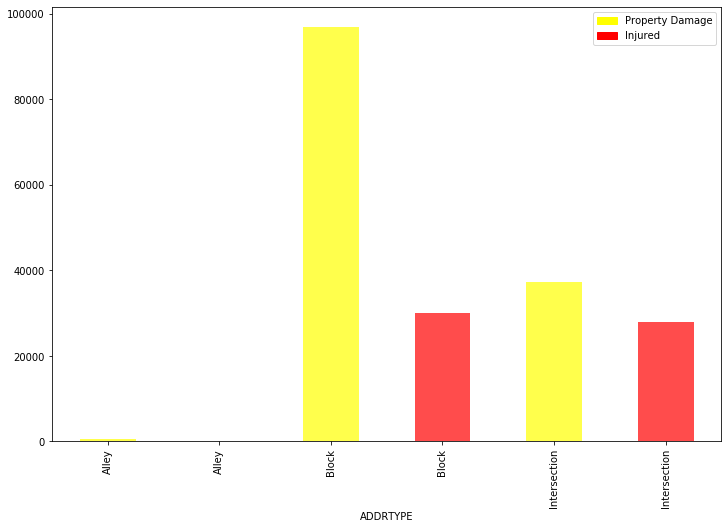

In [194]:
plt.figure(figsize=(12,8))

combined.plot(kind='bar',
             x='ADDRTYPE',
             y='NUMBER_OF_INCIDENTS',
             figsize=(12,8),
             color=['Yellow','Red'],
             alpha=0.7)

red_patch = mpatches.Patch(color='Yellow', label='Property Damage')
yellow_patch = mpatches.Patch(color='Red', label='Injured')

plt.legend(handles=[red_patch,yellow_patch])

## Relation b/w Weather and Severity of Accident

In [196]:
group2=modified_data.groupby(['WEATHER','SEVERITYCODE']).size().to_frame()
group2.columns=['Number of Incidents']
group2.reset_index(inplace=True)
group2

WEATHER  SEVERITYCODE  Number of Incidents
0          Blowing Sand/Dirt             1                   41
1          Blowing Sand/Dirt             2                   15
2                      Clear             1                75295
3                      Clear             2                35840
4             Fog/Smog/Smoke             1                  382
5             Fog/Smog/Smoke             2                  187
6                      Other             1                  716
7                      Other             2                  116
8                   Overcast             1                18969
9                   Overcast             2                 8745
10             Partly Cloudy             1                    2
11             Partly Cloudy             2                    3
12                   Raining             1                21969
13                   Raining             2                11176
14          Severe Crosswind             1                   18
15          Severe Crosswind             2                    7
16  Sleet/Hail/Freezing Rain             1                   85
17  Sleet/Hail/Freezing Rain             2                   28
18                   Snowing             1                  736
19                   Snowing             2                  171
20                   Unknown             1                14275
21                   Unknown             2                  816

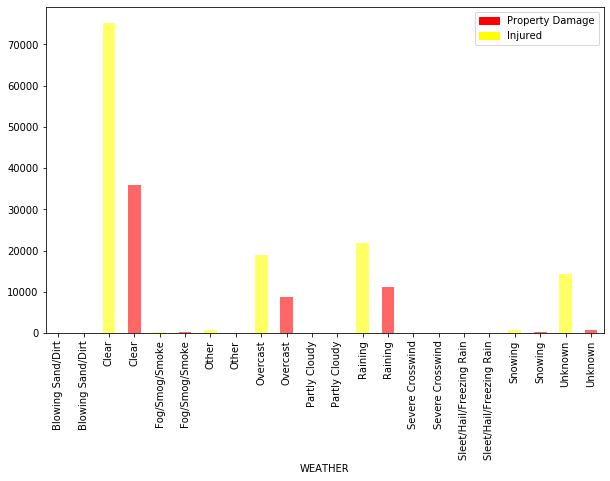

In [197]:
group2.plot(kind='bar',
           x='WEATHER',
           y='Number of Incidents',
           figsize=(10,6),
           color=['Yellow','Red'],
           alpha=0.6)
red_patch = mpatches.Patch(color='Red', label='Property Damage')
yellow_patch = mpatches.Patch(color='Yellow', label='Injured')

plt.legend(handles=[red_patch,yellow_patch])

## Relation between weather and Road Condition

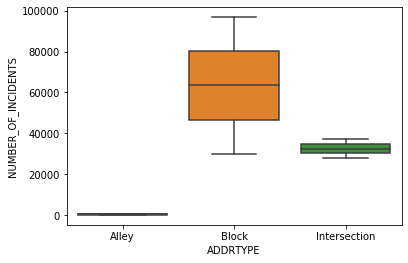

In [195]:
sns.boxplot(x='ADDRTYPE',y='NUMBER_OF_INCIDENTS',data=combined)

In [204]:
group3=modified_data.groupby(['ROADCOND','SEVERITYCODE']).size().to_frame()
group3.columns=['Number of Incidents']
group3.reset_index(inplace=True)
group3

ROADCOND  SEVERITYCODE  Number of Incidents
0              Dry             1                84446
1              Dry             2                40064
2              Ice             1                  936
3              Ice             2                  273
4              Oil             1                   40
5              Oil             2                   24
6            Other             1                   89
7            Other             2                   43
8    Sand/Mud/Dirt             1                   52
9    Sand/Mud/Dirt             2                   23
10      Snow/Slush             1                  837
11      Snow/Slush             2                  167
12  Standing Water             1                   85
13  Standing Water             2                   30
14         Unknown             1                14329
15         Unknown             2                  749
16             Wet             1                31719
17             Wet             2                15755

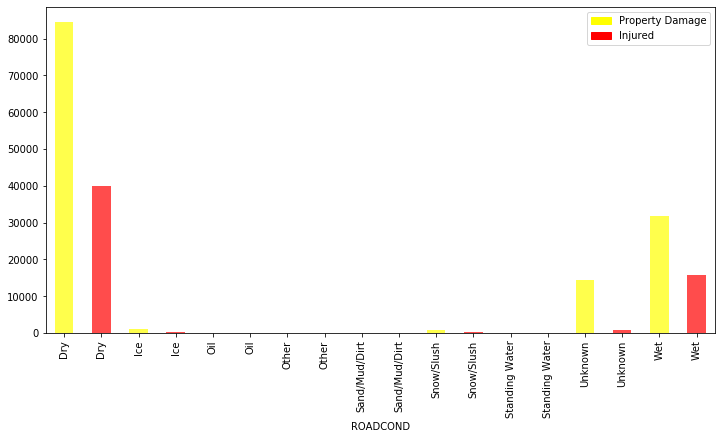

In [208]:
group3.plot(kind='bar',
           x='ROADCOND',
           y='Number of Incidents',
           figsize=(12,6),
           color=['Yellow','Red'],
           alpha=0.7)
red_patch=mpatches.Patch(color='Yellow',label='Property Damage')
yellow_patch=mpatches.Patch(color='Red',label='Injured')
plt.legend(handles=[red_patch,yellow_patch])

In [209]:
group3=modified_data.groupby(['LIGHTCOND','SEVERITYCODE']).size().to_frame()
group3.columns=['Number of Incidents']
group3.reset_index(inplace=True)
group3

LIGHTCOND  SEVERITYCODE  Number of Incidents
0    Dark - No Street Lights             1                 1203
1    Dark - No Street Lights             2                  334
2   Dark - Street Lights Off             1                  883
3   Dark - Street Lights Off             2                  316
4    Dark - Street Lights On             1                34032
5    Dark - Street Lights On             2                14475
6    Dark - Unknown Lighting             1                    7
7    Dark - Unknown Lighting             2                    4
8                       Dawn             1                 1678
9                       Dawn             2                  824
10                  Daylight             1                77593
11                  Daylight             2                38544
12                      Dusk             1                 3958
13                      Dusk             2                 1944
14                     Other             1                  183
15                     Other             2                   52
16                   Unknown             1                12868
17                   Unknown             2                  605

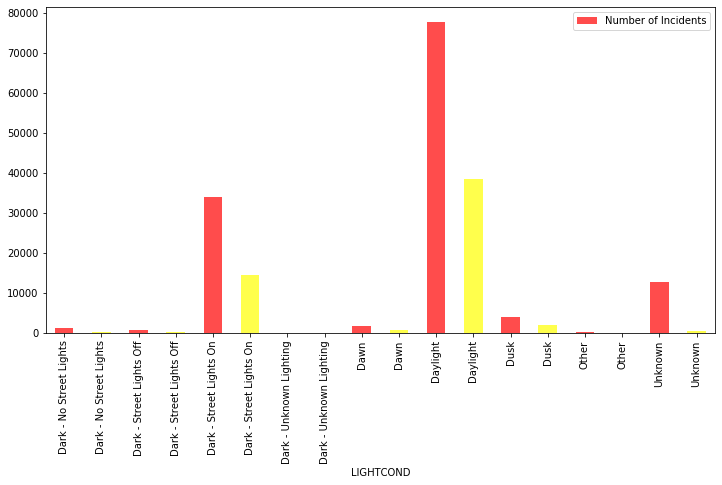

In [210]:
group3.plot(kind='bar',
           x='LIGHTCOND',
           y='Number of Incidents',
           figsize=(12,6),
           color=['Red','Yellow'],
           alpha=0.7)

## One hot encoding
Now we will transform our categorical variables to numerical values in order to be able to apply various statistics technique and eventually perform machine learning technique to get insight of data.

In [93]:
modified_data.STATUS=modified_data.STATUS.map({'Matched':1,'Unmatched':0})

In [94]:
modified_data.ADDRTYPE=pd.get_dummies(modified_data.ADDRTYPE)
modified_data.drop('ADDRTYPE',axis=1,inplace=True)

In [95]:
modified_data.UNDERINFL=modified_data.UNDERINFL.map({'Y':1,'N':0})
modified_data.UNDERINFL.replace(np.nan,0,inplace=True)
modified_data.head()

SEVERITYCODE           X          Y  STATUS                 INCDATE  \
0             2 -122.323148  47.703140       1  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172       1  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871       1  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803       1  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739       1  2004/01/28 00:00:00+00   

                              JUNCTIONTYPE INATTENTIONIND  UNDERINFL  \
0   At Intersection (intersection related)            NaN        0.0   
1  Mid-Block (not related to intersection)            NaN        0.0   
2  Mid-Block (not related to intersection)            NaN        0.0   
3  Mid-Block (not related to intersection)            NaN        0.0   
4   At Intersection (intersection related)            NaN        0.0   

    WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT SPEEDING  
0  Overcast      Wet                 Daylight           NaN      NaN  
1   Raining      Wet  Dark - Street Lights On           NaN      NaN  
2  Overcast      Dry                 Daylight           NaN      NaN  
3     Clear      Dry                 Daylight           NaN      NaN  
4   Raining      Wet                 Daylight           NaN      NaN

In [96]:
modified_data.WEATHER=pd.get_dummies(modified_data.WEATHER)
modified_data.drop('WEATHER',axis=1,inplace=True)
modified_data.head()

SEVERITYCODE           X          Y  STATUS                 INCDATE  \
0             2 -122.323148  47.703140       1  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172       1  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871       1  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803       1  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739       1  2004/01/28 00:00:00+00   

                              JUNCTIONTYPE INATTENTIONIND  UNDERINFL ROADCOND  \
0   At Intersection (intersection related)            NaN        0.0      Wet   
1  Mid-Block (not related to intersection)            NaN        0.0      Wet   
2  Mid-Block (not related to intersection)            NaN        0.0      Dry   
3  Mid-Block (not related to intersection)            NaN        0.0      Dry   
4   At Intersection (intersection related)            NaN        0.0      Wet   

                 LIGHTCOND PEDROWNOTGRNT SPEEDING  
0                 Daylight           NaN      NaN  
1  Dark - Street Lights On           NaN      NaN  
2                 Daylight           NaN      NaN  
3                 Daylight           NaN      NaN  
4                 Daylight           NaN      NaN

## Dealing with missing values

In [49]:
modified_data.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
STATUS                 0
ADDRTYPE            1926
SEVERITYCODE.1         0
INCDATE                0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
dtype: int64